# DEEP LEARNING PROJECT 1
---

In [1]:
%load_ext autoreload
%autoreload 2 

import helpers
import config

from models.basic_net import BasicNet
from datasets import PairDataset

import torch.nn as nn
import torch.utils.data as data
import matplotlib.pyplot as plt

from models.ANN import ANNModel
from models.siamese_net import siamese_net
from torchsummary import summary

from models.train_ANN import train_ann
from models.train_ANN import test_ann

from models.train_Siamese import train_siamese
from models.train_Siamese import test_siamese

## Parameters

In [2]:
TRAIN_BATCH_SIZE = 5
CRITERION_DOUBLE = nn.BCELoss()
CRITERION_SINGLE = nn.BCELoss()
EPOCHS = 20
LEARNING_RATE = 0.001

## Load data

In [3]:
pairs = helpers.generate_pair_sets(config.NB_SAMPLES)

train_dataset = PairDataset(pairs[0], pairs[1], pairs[2])
train_dataloader = data.DataLoader(dataset=train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = PairDataset(pairs[3], pairs[4], pairs[5])
test_dataloader = data.DataLoader(dataset=test_dataset, batch_size=config.TEST_BATCH_SIZE, shuffle=True)

## Model 1: Simple model

In [12]:
model1 = ANNModel(input_dim = 2*14*14, hidden_dim = 512, output_dim = 1)

In [13]:
summary(model1, (1 ,2, 14, 14)) 

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]         201,216
            Linear-2                  [-1, 512]         262,656
            Linear-3                  [-1, 512]         262,656
            Linear-4                    [-1, 1]             513
Total params: 727,041
Trainable params: 727,041
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.77
Estimated Total Size (MB): 2.79
----------------------------------------------------------------


In [14]:
print("Training with a batch size {0}".format(TRAIN_BATCH_SIZE))

training_losses, training_acc= train_ann(model = model1, dataloader=train_dataloader, learning_rate=LEARNING_RATE, epochs=EPOCHS, criterion=CRITERION_SINGLE)

Training with a batch size 5
Training with 20 epochs, learning rate of 0.001 and BCELoss() as loss function
[Epoch 1, Batch 0/200]:  [Loss: 1.13]
At epoch 1 the total loss is 1.0874352354183794
At epoch 1 the accuracy is 0.671
[Epoch 2, Batch 0/200]:  [Loss: 0.31]
At epoch 2 the total loss is 0.500266023222357
At epoch 2 the accuracy is 0.778
[Epoch 3, Batch 0/200]:  [Loss: 0.40]
At epoch 3 the total loss is 0.3949413906270638
At epoch 3 the accuracy is 0.83
[Epoch 4, Batch 0/200]:  [Loss: 0.26]
At epoch 4 the total loss is 0.3628234782116488
At epoch 4 the accuracy is 0.841
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the total loss is 0.26761032549038644
At epoch 5 the accuracy is 0.894
[Epoch 6, Batch 0/200]:  [Loss: 0.33]
At epoch 6 the total loss is 0.23121562054206152
At epoch 6 the accuracy is 0.903
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the total loss is 0.1787838360601893
At epoch 7 the accuracy is 0.93
[Epoch 8, Batch 0/200]:  [Loss: 0.13]
At epoch 8 the total l

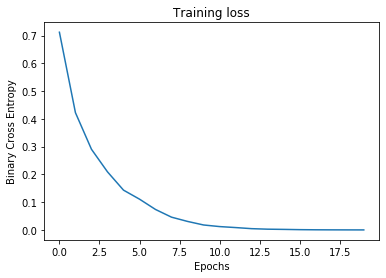

In [16]:
plt.plot(training_losses)
plt.xlabel('Epochs')
plt.ylabel('Binary Cross Entropy')
plt.title('Training loss')
plt.show()

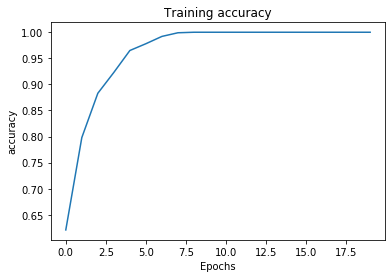

In [17]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

We now need to try the model on the test set.

In [22]:
test_ann(model1,test_dataloader, config.CRITERION_SINGLE)

(0.8191723227500916, 0.807)

## Model 2 : Siamese Net

### Architecture 1

**Options 1** : No weight Sharing, No auxilary function

In [23]:
model2 = siamese_net(weight_sharing = False, architecture = 1)

In [24]:
summary(model2, [(1, 14, 14), (1, 14, 14)])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 1, 12, 12]              10
         LeakyReLU-2            [-1, 1, 12, 12]               0
            Conv2d-3            [-1, 1, 10, 10]              10
         LeakyReLU-4            [-1, 1, 10, 10]               0
         MaxPool2d-5              [-1, 1, 5, 5]               0
            Linear-6                  [-1, 512]          13,312
         LeakyReLU-7                  [-1, 512]               0
            Linear-8                   [-1, 10]           5,130
           Softmax-9                   [-1, 10]               0
           Conv2d-10            [-1, 1, 12, 12]              10
        LeakyReLU-11            [-1, 1, 12, 12]               0
           Conv2d-12            [-1, 1, 10, 10]              10
        LeakyReLU-13            [-1, 1, 10, 10]               0
        MaxPool2d-14              [-1, 

C:\Users\Ridha\Anaconda3\lib\site-packages\torch\nn\modules\container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


In [25]:
lr = 0.001
aux_loss = False 
epochs = 30

training_losses, training_acc, test_losses, test_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
Without auxilary loss function
Without weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 0.65]
[Epoch 1, Batch 250/1000]:  [Loss: 0.65]
[Epoch 1, Batch 500/1000]:  [Loss: 0.60]
[Epoch 1, Batch 750/1000]:  [Loss: 0.77]
At epoch 1 the loss is 0.6822404265403748
At epoch 1 the accuracy is 0.6
[Epoch 2, Batch 0/1000]:  [Loss: 0.62]
[Epoch 2, Batch 250/1000]:  [Loss: 0.85]
[Epoch 2, Batch 500/1000]:  [Loss: 0.68]
[Epoch 2, Batch 750/1000]:  [Loss: 0.50]
At epoch 2 the loss is 0.6731359958648682
At epoch 2 the accuracy is 0.612
[Epoch 3, Batch 0/1000]:  [Loss: 0.92]
[Epoch 3, Batch 250/1000]:  [Loss: 0.52]
[Epoch 3, Batch 500/1000]:  [Loss: 0.57]
[Epoch 3, Batch 750/1000]:  [Loss: 0.62]
At epoch 3 the loss is 0.6630438566207886
At epoch 3 the accuracy is 0.632
[Epoch 4, Batch 0/1000]:  [Loss: 0.94]
[Epoch 4, Batch 250/1000]:  [Loss: 0.57]
[Epoch 4, Batch 500/1000]:  [Loss: 0.98]
[Epoch 4, Batch 750/1000]:  [

KeyboardInterrupt: 

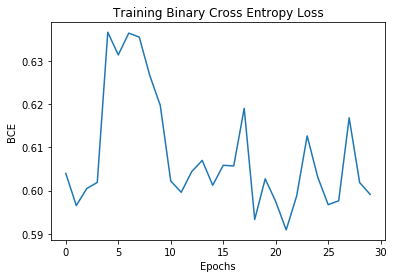

In [34]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

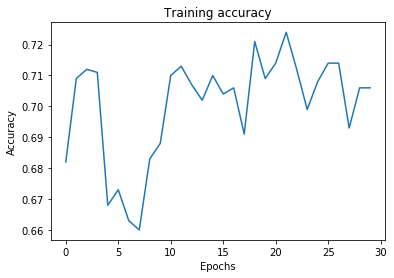

In [35]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [37]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = False)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.63 and an accuracy of 0.68


**Options 2** : Weight Sharing, No auxilary function

In [4]:
model2 = siamese_net(weight_sharing = True , architecture = 1)

In [7]:
lr = 0.001
aux_loss = False 
epochs = 30

training_losses, training_acc, test_losses, test_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
Without auxilary loss funciton
With weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 0.65]
[Epoch 1, Batch 250/1000]:  [Loss: 0.52]
[Epoch 1, Batch 500/1000]:  [Loss: 0.56]
[Epoch 1, Batch 750/1000]:  [Loss: 0.61]
At epoch 1 the loss is 0.6642462611198425
At epoch 1 the accuracy is 0.622
[Epoch 2, Batch 0/1000]:  [Loss: 0.82]
[Epoch 2, Batch 250/1000]:  [Loss: 0.59]
[Epoch 2, Batch 500/1000]:  [Loss: 0.45]
[Epoch 2, Batch 750/1000]:  [Loss: 0.61]
At epoch 2 the loss is 0.6445934772491455
At epoch 2 the accuracy is 0.651
[Epoch 3, Batch 0/1000]:  [Loss: 0.78]
[Epoch 3, Batch 250/1000]:  [Loss: 0.59]
[Epoch 3, Batch 500/1000]:  [Loss: 0.80]
[Epoch 3, Batch 750/1000]:  [Loss: 0.62]
At epoch 3 the loss is 0.6729118227958679
At epoch 3 the accuracy is 0.573
[Epoch 4, Batch 0/1000]:  [Loss: 0.62]
[Epoch 4, Batch 250/1000]:  [Loss: 0.60]
[Epoch 4, Batch 500/1000]:  [Loss: 0.97]
[Epoch 4, Batch 750/1000]:  [L

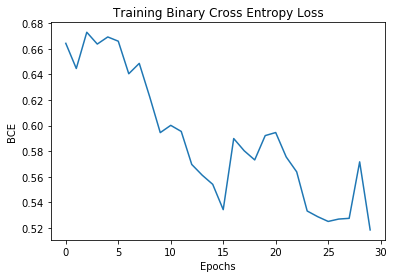

In [8]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

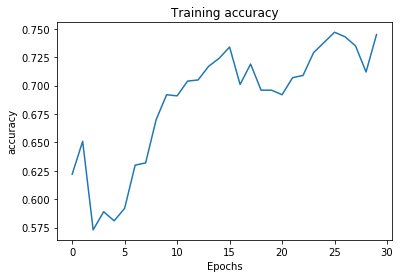

In [9]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [11]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = False)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.52 and an accuracy of 0.74


**Option 3:**  No weight Sharing, auxilary function

In [12]:
model2 = siamese_net(weight_sharing = False , architecture = 1)

In [14]:
lr = 0.001
aux_loss = True 
epochs = 30

training_losses, training_acc, test_losses, test_acc = train_siamese(model2, train_dataloader, epochs, lr, aux_loss)

Start training with 30 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss funciton
Without weight sharing
[Epoch 1, Batch 0/1000]:  [Loss: 1.13]
[Epoch 1, Batch 250/1000]:  [Loss: 0.84]
[Epoch 1, Batch 500/1000]:  [Loss: 0.79]
[Epoch 1, Batch 750/1000]:  [Loss: 0.74]
At epoch 1 the loss is 0.7762801647186279
At epoch 1 the accuracy is 0.642
[Epoch 2, Batch 0/1000]:  [Loss: 1.02]
[Epoch 2, Batch 250/1000]:  [Loss: 0.73]
[Epoch 2, Batch 500/1000]:  [Loss: 0.85]
[Epoch 2, Batch 750/1000]:  [Loss: 0.46]
At epoch 2 the loss is 0.6750748753547668
At epoch 2 the accuracy is 0.733
[Epoch 3, Batch 0/1000]:  [Loss: 0.50]
[Epoch 3, Batch 250/1000]:  [Loss: 0.70]
[Epoch 3, Batch 500/1000]:  [Loss: 0.84]
[Epoch 3, Batch 750/1000]:  [Loss: 0.53]
At epoch 3 the loss is 0.6098330616950989
At epoch 3 the accuracy is 0.8
[Epoch 4, Batch 0/1000]:  [Loss: 0.43]
[Epoch 4, Batch 250/1000]:  [Loss: 1.10]
[Epoch 4, Batch 500/1000]:  [Loss: 0.67]
[Epoch 4, Batch 750/1000]:  [Los

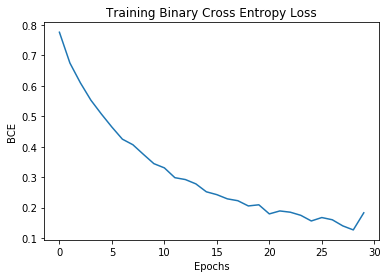

In [15]:
plt.plot(training_losses)
plt.title('Training Binary Cross Entropy Loss')
plt.xlabel("Epochs")
plt.ylabel("BCE")
plt.show()

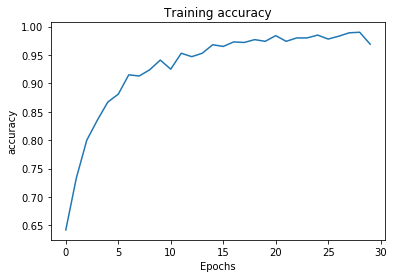

In [16]:
plt.plot(training_acc)
plt.title('Training accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [19]:
test_loss ,test_acc = test_siamese(model2, test_dataloader, aux_loss = True)
print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(test_loss,test_acc))

On the test set we obtain a loss of 0.56 and an accuracy of 0.83


**Option 4:**  Weight Sharing, auxilary function

In [38]:
model = siamese_net(weight_sharing = True , architecture = 1 , nb_channels = 16, nb_hidden = 100)

In [41]:
lr = 0.001
epochs = 20
    
training_losses, training_acc, test_losses, test_acc = train_siamese(model, train_dataloader, test_dataloader, epochs, lr, aux_loss= True)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 8.26]
At epoch 1 the loss is 1.5639915466308594
At epoch 1 the accuracy is 0.685
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.5070129036903381
At epoch 2 the accuracy is 0.863
[Epoch 3, Batch 0/200]:  [Loss: 0.11]
At epoch 3 the loss is 0.27915364503860474
At epoch 3 the accuracy is 0.927
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.16438770294189453
At epoch 4 the accuracy is 0.962
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.08117419481277466
At epoch 5 the accuracy is 0.985
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.046626925468444824
At epoch 6 the accuracy is 0.99
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.02167409658432007
At epoch 7 the accuracy is 0.999
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.091569

In [16]:
def compute_results(weight_sharing = True, aux_loss = True , architecture = 1):
    
    channels = [24, 48, 64]
    hidden_layer = [10, 100]
    
    lr = 0.001
    epochs = 20
    
    results = [] #training_losses, training_acc, test_losses, test_acc
    
    for c in channels:
        for n in hidden_layer:
            model = siamese_net(weight_sharing , architecture, nb_channels = c, nb_hidden = n)

            training_losses, training_acc, test_losses, test_acc = train_siamese(model, train_dataloader, test_dataloader, epochs, lr, aux_loss)

            results.append([training_losses, training_acc, test_losses, test_acc])
            
            print("For the parammeters {0} channels and {1} layers we get :".format(c,n))
            final_test_loss, final_test_loss_acc = test_siamese(model, test_dataloader, aux_loss = True)
            print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(final_test_loss,final_test_loss_acc))

    return results

In [17]:
def plots_results(results, architecture = 1):
    
    channels = [24, 48, 64]
    hidden_layer = [10, 100]
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y' , 'k']
        
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize= (14,8))

    for i, r in enumerate(results) :
        
        channel = channels[i % 3]
        fc_layer = hidden_layer[i % 2]
        
        ax1.plot(r[0], label = 'training loss-{0} channels-{1} fc '.format(channel, fc_layer))
        ax1.plot(r[2], color = colors[i],  linestyle='dashed', label = 'test loss-{0} channels-{1} fc '.format(channel, fc_layer))

        ax2.plot(r[1], label = 'training accuracy-{0} channels-{1} fc '.format(channel, fc_layer))
        ax2.plot(r[3], color = colors[i],  linestyle='dashed', label = 'test accuracy-{0} channels-{1} fc '.format(channel, fc_layer))
    
    ax1.set_title('Training Binary Cross Entropy Loss for architecture {0}'.format(architecture))
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("BCE")

    ax2.set_title('Training accuracy for architecture {0}'.format(architecture))
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    fig.legend(bbox_to_anchor=(1.15, 0.1),loc = 'lower right')
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
    plt.show()

In [20]:
results1 = compute_results(weight_sharing = True, aux_loss = True , architecture = 1)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 19.67]
At epoch 1 the loss is 2.700904130935669
At epoch 1 the accuracy is 0.573
[Epoch 2, Batch 0/200]:  [Loss: 2.56]
At epoch 2 the loss is 1.9167208671569824
At epoch 2 the accuracy is 0.671
[Epoch 3, Batch 0/200]:  [Loss: 1.43]
At epoch 3 the loss is 0.9140406250953674
At epoch 3 the accuracy is 0.8
[Epoch 4, Batch 0/200]:  [Loss: 0.44]
At epoch 4 the loss is 0.5426586866378784
At epoch 4 the accuracy is 0.875
[Epoch 5, Batch 0/200]:  [Loss: 0.57]
At epoch 5 the loss is 0.34974852204322815
At epoch 5 the accuracy is 0.921
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.28254854679107666
At epoch 6 the accuracy is 0.941
[Epoch 7, Batch 0/200]:  [Loss: 0.11]
At epoch 7 the loss is 0.1425253301858902
At epoch 7 the accuracy is 0.973
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.12291128188

[Epoch 5, Batch 0/200]:  [Loss: 0.36]
At epoch 5 the loss is 0.16955117881298065
At epoch 5 the accuracy is 0.973
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.0529724545776844
At epoch 6 the accuracy is 0.995
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.01090956199914217
At epoch 7 the accuracy is 1.0
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0038771415129303932
At epoch 8 the accuracy is 1.0
[Epoch 9, Batch 0/200]:  [Loss: 0.15]
At epoch 9 the loss is 0.001904725912027061
At epoch 9 the accuracy is 1.0
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.0012397839454934
At epoch 10 the accuracy is 1.0
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0008357164333574474
At epoch 11 the accuracy is 1.0
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0005994697567075491
At epoch 12 the accuracy is 1.0
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.00046228113933466375


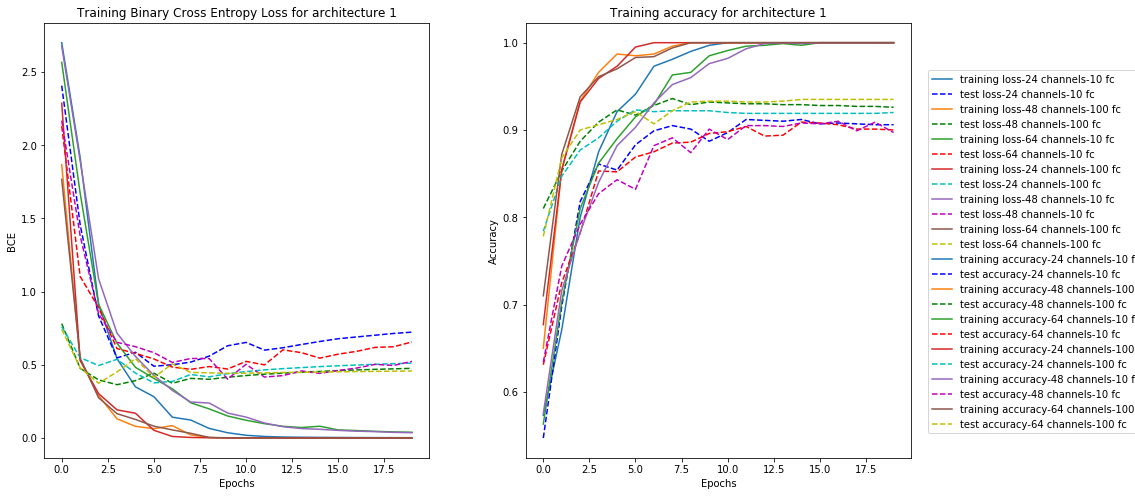

In [21]:
plots_results(results1, architecture = 1)

### Architecture 2

In [7]:
results2 = compute_results(weight_sharing = True, aux_loss = True , architecture = 2)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 10.92]
At epoch 1 the loss is 2.1119494438171387
At epoch 1 the accuracy is 0.621
[Epoch 2, Batch 0/200]:  [Loss: 1.07]
At epoch 2 the loss is 0.6073348522186279
At epoch 2 the accuracy is 0.85
[Epoch 3, Batch 0/200]:  [Loss: 0.09]
At epoch 3 the loss is 0.36715346574783325
At epoch 3 the accuracy is 0.911
[Epoch 4, Batch 0/200]:  [Loss: 0.40]
At epoch 4 the loss is 0.23394721746444702
At epoch 4 the accuracy is 0.938
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.1459774225950241
At epoch 5 the accuracy is 0.97
[Epoch 6, Batch 0/200]:  [Loss: 0.36]
At epoch 6 the loss is 0.10939779132604599
At epoch 6 the accuracy is 0.983
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.06715943664312363
At epoch 7 the accuracy is 0.99
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.026621960

At epoch 4 the loss is 0.23263780772686005
At epoch 4 the accuracy is 0.947
[Epoch 5, Batch 0/200]:  [Loss: 0.12]
At epoch 5 the loss is 0.15274322032928467
At epoch 5 the accuracy is 0.971
[Epoch 6, Batch 0/200]:  [Loss: 0.71]
At epoch 6 the loss is 0.09176728874444962
At epoch 6 the accuracy is 0.977
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.038871005177497864
At epoch 7 the accuracy is 0.991
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.049169767647981644
At epoch 8 the accuracy is 0.98
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.03470255434513092
At epoch 9 the accuracy is 0.994
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.01752653531730175
At epoch 10 the accuracy is 0.997
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.006037641316652298
At epoch 11 the accuracy is 1.0
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0028771553188562393
At epoch 12 the accuracy is 1.0
[Ep

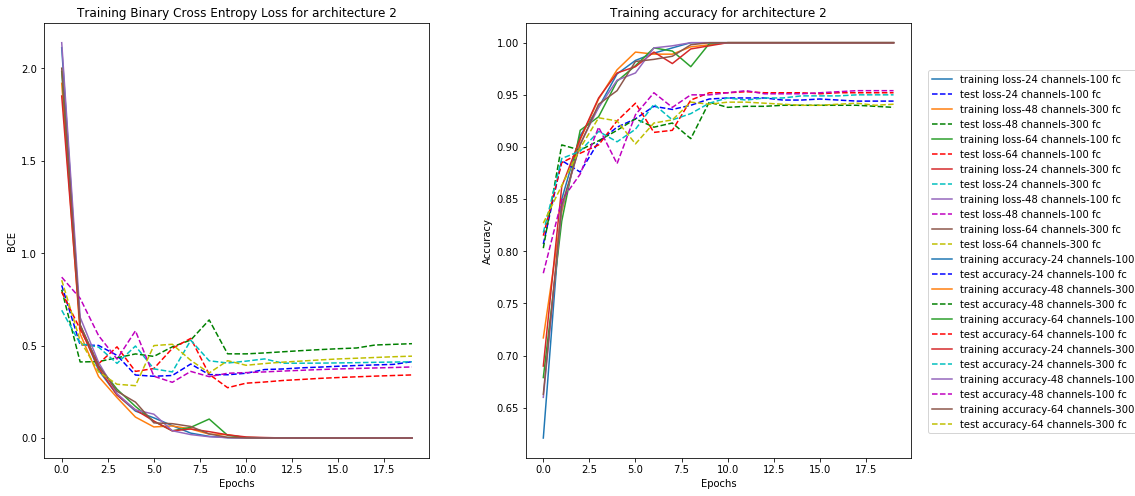

In [8]:
plots_results(results2, architecture = 2)

### Architecture 3

In [6]:
results3 = compute_results(weight_sharing = True, aux_loss = True , architecture = 3)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 12.81]
At epoch 1 the loss is 2.1311850547790527
At epoch 1 the accuracy is 0.618
[Epoch 2, Batch 0/200]:  [Loss: 0.87]
At epoch 2 the loss is 0.6640914678573608
At epoch 2 the accuracy is 0.818
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.43114638328552246
At epoch 3 the accuracy is 0.884
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.25393638014793396
At epoch 4 the accuracy is 0.945
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.18686629831790924
At epoch 5 the accuracy is 0.958
[Epoch 6, Batch 0/200]:  [Loss: 0.20]
At epoch 6 the loss is 0.08921642601490021
At epoch 6 the accuracy is 0.982
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.07550322264432907
At epoch 7 the accuracy is 0.988
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.05473

At epoch 4 the loss is 0.2682771682739258
At epoch 4 the accuracy is 0.93
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.20764222741127014
At epoch 5 the accuracy is 0.946
[Epoch 6, Batch 0/200]:  [Loss: 0.12]
At epoch 6 the loss is 0.13513779640197754
At epoch 6 the accuracy is 0.975
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.10204386711120605
At epoch 7 the accuracy is 0.978
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.03503426909446716
At epoch 8 the accuracy is 0.996
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.06679659336805344
At epoch 9 the accuracy is 0.989
[Epoch 10, Batch 0/200]:  [Loss: 0.30]
At epoch 10 the loss is 0.018203189596533775
At epoch 10 the accuracy is 0.997
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0021451315842568874
At epoch 11 the accuracy is 1.0
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0008152962545864284
At epoch 12 the accuracy is 1.0
[Epo

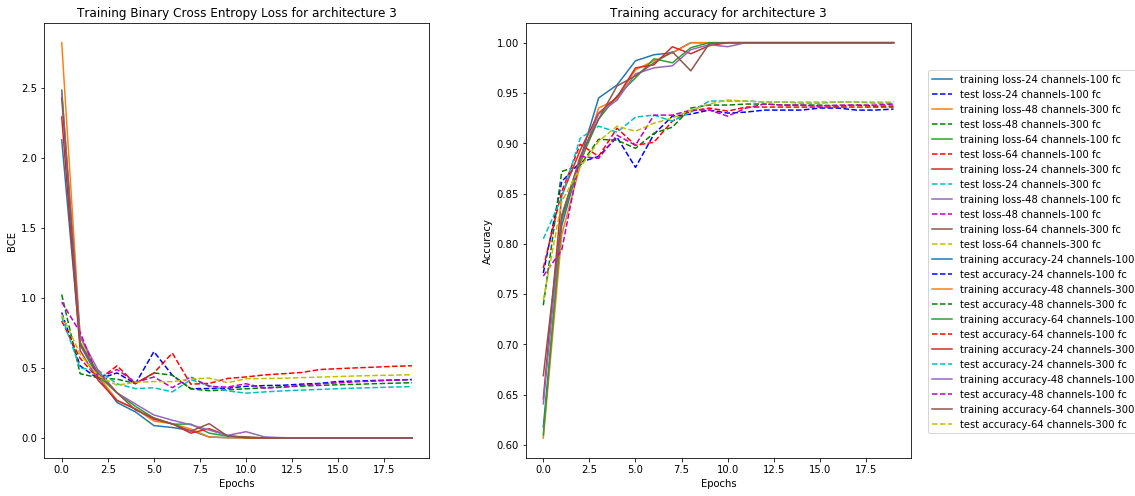

In [7]:
plots_results(results3, architecture = 3)

### Architecture 4

In [7]:
results4 = compute_results(weight_sharing = True, aux_loss = True , architecture = 4)

Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 15.93]
At epoch 1 the loss is 2.210127353668213
At epoch 1 the accuracy is 0.639
[Epoch 2, Batch 0/200]:  [Loss: 0.71]
At epoch 2 the loss is 0.880337119102478
At epoch 2 the accuracy is 0.793
[Epoch 3, Batch 0/200]:  [Loss: 0.67]
At epoch 3 the loss is 0.5809041261672974
At epoch 3 the accuracy is 0.864
[Epoch 4, Batch 0/200]:  [Loss: 1.24]
At epoch 4 the loss is 0.4248925447463989
At epoch 4 the accuracy is 0.904
[Epoch 5, Batch 0/200]:  [Loss: 0.29]
At epoch 5 the loss is 0.30428802967071533
At epoch 5 the accuracy is 0.931
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.21482570469379425
At epoch 6 the accuracy is 0.96
[Epoch 7, Batch 0/200]:  [Loss: 0.21]
At epoch 7 the loss is 0.1298702210187912
At epoch 7 the accuracy is 0.978
[Epoch 8, Batch 0/200]:  [Loss: 0.22]
At epoch 8 the loss is 0.07609630376

[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.29070916771888733
At epoch 5 the accuracy is 0.927
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.20995548367500305
At epoch 6 the accuracy is 0.963
[Epoch 7, Batch 0/200]:  [Loss: 0.30]
At epoch 7 the loss is 0.14646831154823303
At epoch 7 the accuracy is 0.972
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.12284315377473831
At epoch 8 the accuracy is 0.973
[Epoch 9, Batch 0/200]:  [Loss: 0.14]
At epoch 9 the loss is 0.061403583735227585
At epoch 9 the accuracy is 0.99
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.03002791479229927
At epoch 10 the accuracy is 0.998
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.007918584160506725
At epoch 11 the accuracy is 1.0
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0027340587694197893
At epoch 12 the accuracy is 1.0
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.001826301217079

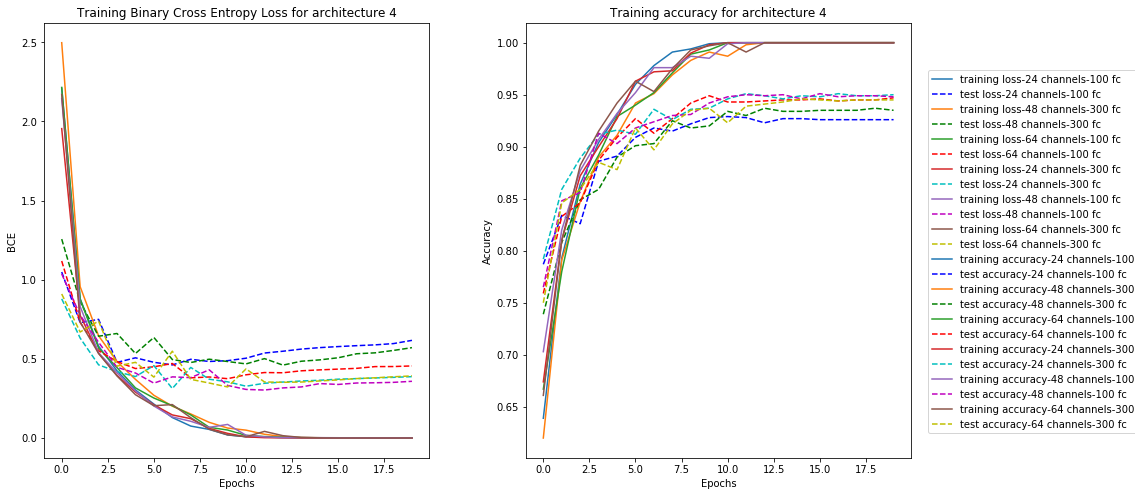

In [8]:
plots_results(results4, architecture = 4)

### Architecture 5

In [32]:
import numpy as np
def compute_results_kernel(weight_sharing = True, aux_loss = True , architecture = 1):
    
    channels = [2, 8, 16]
    kernels = [3, 5]
    
    lr = 0.001
    epochs = 5
    round_results = [] #3D
    
    for i in range(2):
        
        results = [] #training_losses, training_acc, test_losses, test_acc
    
        for c in channels:
            for ker in kernels:
                model = siamese_net(weight_sharing , architecture, nb_channels = c, nb_hidden = 100, k = ker )

                training_losses, training_acc, test_losses, test_acc = train_siamese(model, train_dataloader, test_dataloader, epochs, lr, aux_loss)

                results.append([training_losses, training_acc, test_losses, test_acc])

                print("For the parammeters {0} channels and {1} kernel size we get :".format(c,ker))
                final_test_loss, final_test_loss_acc = test_siamese(model, test_dataloader, aux_loss = True)
                print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(final_test_loss,final_test_loss_acc))
        
        round_results.append(results)
    return results

In [33]:
def plots_results_kernel(results, architecture = 1):
    
    channels = [2, 8, 16]
    kernels = [3, 5]
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y' , 'k']
        
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize= (14,8))

    for i, r in enumerate(results) :
        
        channel = channels[i % 3]
        kernel = kernels[i % 2]
        
        ax1.plot(r[0], color = colors[i], label = 'training loss-{0} channels-{1} kernel'.format(channel, kernel))
        ax1.plot(r[2], color = colors[i],  linestyle='dashed', label = 'test loss-{0} channels-{1} kernel'.format(channel, kernel))

        ax2.plot(r[1], color = colors[i], label = 'training accuracy-{0} channels-{1} kernel'.format(channel, kernel))
        ax2.plot(r[3], color = colors[i],  linestyle='dashed', label = 'test accuracy-{0} channels-{1} kernel'.format(channel, kernel))
    
    ax1.set_title('Training Binary Cross Entropy Loss for architecture {0}'.format(architecture))
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("BCE")

    ax2.set_title('Training accuracy for architecture {0}'.format(architecture))
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    ax1.legend(loc = 'upper right')
    ax2.legend(loc = 'lower right')
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
    plt.show()

In [ ]:
results5 = compute_results_kernel(weight_sharing = True, aux_loss = True , architecture = 5)

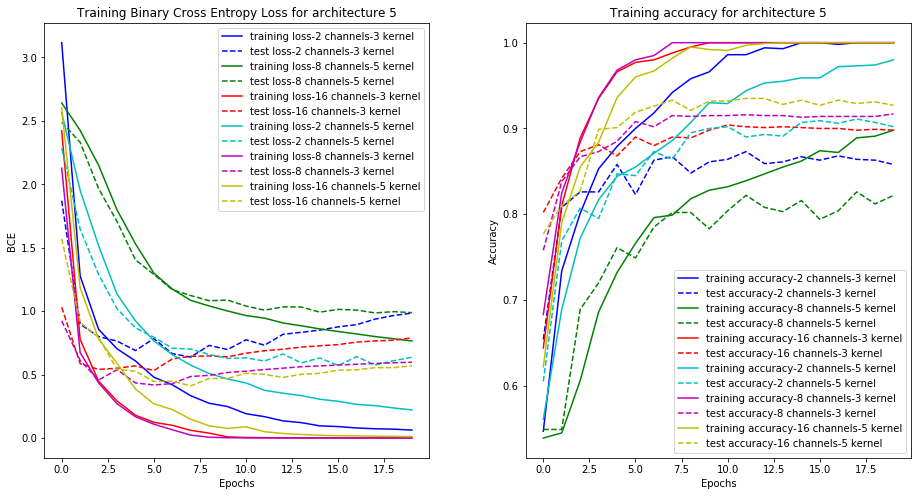

In [18]:
plots_results_kernel(results5, architecture = 5)

### Plot  fill

In [ ]:
def compute_results(weight_sharing = True, aux_loss = True , architecture = 1):
    
    channels = [24, 48, 64]
    hidden_layer = [10, 100]
    
    lr = 0.001
    epochs = 20
    rounds = 10
    round_results = [] #3D
    
    for i in range(rounds):
        print("Round {0}".format(i))

        results = [] #training_losses, training_acc, test_losses, test_acc
      
        for c in channels:
            for n in hidden_layer:
                model = siamese_net(weight_sharing , architecture, nb_channels = c, nb_hidden = n)

                training_losses, training_acc, test_losses, test_acc = train_siamese(model, train_dataloader, test_dataloader, epochs, lr, aux_loss)

                results.append([training_losses, training_acc, test_losses, test_acc])
              
                print("For the parammeters {0} channels and {1} layers we get :".format(c,n))
                final_test_loss, final_test_loss_acc = test_siamese(model, test_dataloader, aux_loss = True)
                print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(final_test_loss,final_test_loss_acc))
      
      round_results.append(results)
    return round_results

In [ ]:
def plots_results(results, architecture = 1):
    
    channels = [24, 48, 64]
    hidden_layer = [10, 100]
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y' , 'k']
        
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize= (14,8))

    means = np.array(results).mean(axis= 0)
    std  = np.array(results).std(axis = 0)
    print(means.shape)
    print(std.shape)
    for i, (r,s) in enumerate( zip(means,std) ):
        
        channel = channels[i % 3]
        fc_layer = hidden_layer[i % 2]
        s = s /10
        ax1.plot(r[0], color = colors[i], label = 'training loss-{0} channels-{1} fc '.format(channel, fc_layer))
        ax1.plot(r[2], color = colors[i],  linestyle='dashed', label = 'test loss-{0} channels-{1} fc '.format(channel, fc_layer))
        
        ax1.fill_between(range(len(r[0])), r[0] - s[0], r[0]+ s[0], alpha = 0.2, color = colors[i])
        ax1.fill_between(range(len(r[2])), r[2]- s[2], r[2]+ s[2], alpha = 0.2, color = colors[i])

        ax2.plot(r[1], color = colors[i], label = 'training accuracy-{0} channels-{1} fc '.format(channel, fc_layer))
        ax2.plot(r[3], color = colors[i], linestyle='dashed', label = 'test accuracy-{0} channels-{1} fc '.format(channel, fc_layer))

        ax2.fill_between(range(len(r[1])), r[1]- s[1], r[1]+ s[1], alpha = 0.2, color = colors[i])
        ax2.fill_between(range(len(r[3])), r[3]- s[3], r[3]+ s[3], alpha = 0.2, color = colors[i])

    ax1.set_title('Training Binary Cross Entropy Loss for architecture {0}'.format(architecture))
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("BCE")

    ax2.set_title('Training accuracy for architecture {0}'.format(architecture))
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    fig.legend(bbox_to_anchor=(1.15, 0.1),loc = 'lower right')
    plt.subplots_adjust(left=0.07, right=0.93, wspace=0.25, hspace=0.35)
    plt.show()

In [ ]:
plots_results(np.array(round_results1), architecture = 1)

In [6]:
import numpy as np 

gridsearch_params = [
    (kernel_size, nb_channels, fc, alpha)
   
    for kernel_size in [3,5]
    for nb_channels in [2,4,8,16,24,48]
    for fc in [32,64,128, 256]
    for alpha in np.linspace(0, 1, 5)
]

lr = 0.001
epochs = 20
rounds = 10
round_results = [] #3D

for i in range(rounds):
    results = [] #training_losses, training_acc, test_losses, test_acc
    
    for kernel_size, c, n, a in gridsearch_params:
        
        model = siamese_net(weight_sharing = True , architecture = 5, 
                            nb_channels = c, nb_hidden = n, k = kernel_size )
        training_losses, training_acc, test_losses, test_acc = train_siamese(model,
                                                                             train_dataloader, 
                                                                             test_dataloader, 
                                                                             epochs,
                                                                             lr, 
                                                                             alpha = a,
                                                                             aux_loss = True)
        
        print('With parameters {0} kernel size, {1} nb_channels, {2} nb_hidden fc,  {3} alpha: '.format(kernel_size, c, n, a))
        final_test_loss, final_test_loss_acc = test_siamese(model, test_dataloader, aux_loss = True)
        print("On the test set we obtain a loss of {:.2f} and an accuracy of {:.2f}".format(final_test_loss,final_test_loss_acc))
        
        results.append([training_losses, training_acc, test_losses, test_acc])
    
    round_results.append(results)

NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 3.18]
At epoch 1 the loss is 1.9265530923008918
At epoch 1 the accuracy is 0.494
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.10]
At epoch 2 the loss is 0.8351129525154829
At epoch 2 the accuracy is 0.538
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.47]
At epoch 3 the loss is 0.5437413949891925
At epoch 3 the accuracy is 0.515
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.93]
At epoch 4 the loss is 0.4100344570260495
At epoch 4 the accuracy is 0.521
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.3245844142138958
At epoch 5 the accuracy is 0.512
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.10]
At epoch 6 the loss is 0.26460882616229353
At epoch 6 the accuracy is 0.514
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.36]
At epoch 7 the loss is 0.20393320163711906
At epoch 7 the accuracy is 0.503
NO CUDA
[Epoch 8

On the test set we obtain a loss of 0.92 and an accuracy of 0.87
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 2.08]
At epoch 1 the loss is 1.0650712418556214
At epoch 1 the accuracy is 0.604
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.6111687812209129
At epoch 2 the accuracy is 0.772
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.46]
At epoch 3 the loss is 0.4297947643697262
At epoch 3 the accuracy is 0.834
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.33940276997163893
At epoch 4 the accuracy is 0.877
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.21]
At epoch 5 the loss is 0.2512693212926388
At epoch 5 the accuracy is 0.908
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.12]
At epoch 6 the loss is 0.20362133823568002
At epoch 6 the accuracy is 0.938
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.17]
At epoch 7 the loss is 0.1

On the test set we obtain a loss of 0.95 and an accuracy of 0.45
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 3.11]
At epoch 1 the loss is 1.886718048453331
At epoch 1 the accuracy is 0.546
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.32]
At epoch 2 the loss is 1.054176367521286
At epoch 2 the accuracy is 0.733
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.56]
At epoch 3 the loss is 0.6811866857111454
At epoch 3 the accuracy is 0.794
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.19]
At epoch 4 the loss is 0.5368516614660621
At epoch 4 the accuracy is 0.842
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.25]
At epoch 5 the loss is 0.4499754736945033
At epoch 5 the accuracy is 0.86
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.42]
At epoch 6 the loss is 0.38084615701809527
At epoch 6 the accuracy is 0.886
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.33]
At epoch 7 the loss is 0.32969

On the test set we obtain a loss of 1.31 and an accuracy of 0.86
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 0.68]
At epoch 1 the loss is 0.6527616779506207
At epoch 1 the accuracy is 0.612
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.5278916995599866
At epoch 2 the accuracy is 0.738
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.24]
At epoch 3 the loss is 0.4446153360418975
At epoch 3 the accuracy is 0.781
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.29]
At epoch 4 the loss is 0.39383507719263433
At epoch 4 the accuracy is 0.809
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.13]
At epoch 5 the loss is 0.3366955616045743
At epoch 5 the accuracy is 0.852
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.27768927020486445
At epoch 6 the accuracy is 0.886
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.2

On the test set we obtain a loss of 1.20 and an accuracy of 0.86
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 6.99]
At epoch 1 the loss is 1.6368429082632066
At epoch 1 the accuracy is 0.612
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.61]
At epoch 2 the loss is 0.6653581426292657
At epoch 2 the accuracy is 0.788
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.51]
At epoch 3 the loss is 0.4753156067430973
At epoch 3 the accuracy is 0.828
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.10]
At epoch 4 the loss is 0.3583733850158751
At epoch 4 the accuracy is 0.886
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.27]
At epoch 5 the loss is 0.2985498190764338
At epoch 5 the accuracy is 0.902
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.23450622516218572
At epoch 6 the accuracy is 0.929
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.23]
At epoch 7 the loss is 0.18

On the test set we obtain a loss of 3.42 and an accuracy of 0.80
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 6.37]
At epoch 1 the loss is 2.1723121464252473
At epoch 1 the accuracy is 0.497
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.33]
At epoch 2 the loss is 0.7639714990183711
At epoch 2 the accuracy is 0.414
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.16]
At epoch 3 the loss is 0.4622444205917418
At epoch 3 the accuracy is 0.419
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.3483426267746836
At epoch 4 the accuracy is 0.427
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.54]
At epoch 5 the loss is 0.28284038898069414
At epoch 5 the accuracy is 0.424
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.22608716960297898
At epoch 6 the accuracy is 0.418
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.1

On the test set we obtain a loss of 1.23 and an accuracy of 0.88
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 3.24]
At epoch 1 the loss is 1.1107695502042771
At epoch 1 the accuracy is 0.612
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.79]
At epoch 2 the loss is 0.5471470617875457
At epoch 2 the accuracy is 0.777
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.28]
At epoch 3 the loss is 0.38793473966419695
At epoch 3 the accuracy is 0.854
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.3124121647235006
At epoch 4 the accuracy is 0.88
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.23]
At epoch 5 the loss is 0.24668035227339716
At epoch 5 the accuracy is 0.91
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.68]
At epoch 6 the loss is 0.20404874134343118
At epoch 6 the accuracy is 0.934
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.33]
At epoch 7 the loss is 0.15

On the test set we obtain a loss of 0.90 and an accuracy of 0.53
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 6.66]
At epoch 1 the loss is 1.75572553306818
At epoch 1 the accuracy is 0.629
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.95]
At epoch 2 the loss is 0.5392271818965674
At epoch 2 the accuracy is 0.797
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.15]
At epoch 3 the loss is 0.31689522668719294
At epoch 3 the accuracy is 0.857
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.29]
At epoch 4 the loss is 0.217199395429343
At epoch 4 the accuracy is 0.907
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.14095887348288672
At epoch 5 the accuracy is 0.939
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.09936478777322919
At epoch 6 the accuracy is 0.953
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.063

On the test set we obtain a loss of 0.87 and an accuracy of 0.91
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 0.83]
At epoch 1 the loss is 0.7001060898602008
At epoch 1 the accuracy is 0.613
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.4865032840520144
At epoch 2 the accuracy is 0.741
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.24]
At epoch 3 the loss is 0.3773244605027139
At epoch 3 the accuracy is 0.821
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.2923461553757079
At epoch 4 the accuracy is 0.868
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.24133013737620787
At epoch 5 the accuracy is 0.894
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.14]
At epoch 6 the loss is 0.18012972114083822
At epoch 6 the accuracy is 0.919
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.1

On the test set we obtain a loss of 0.70 and an accuracy of 0.90
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 7.00]
At epoch 1 the loss is 1.6890754207968712
At epoch 1 the accuracy is 0.613
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.92]
At epoch 2 the loss is 0.6102001947164536
At epoch 2 the accuracy is 0.781
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.28]
At epoch 3 the loss is 0.40652170073240995
At epoch 3 the accuracy is 0.838
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.30]
At epoch 4 the loss is 0.30283387066796424
At epoch 4 the accuracy is 0.885
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.22800264122895897
At epoch 5 the accuracy is 0.917
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.1679253492038697
At epoch 6 the accuracy is 0.939
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.

On the test set we obtain a loss of 4.20 and an accuracy of 0.85
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 4.41]
At epoch 1 the loss is 1.6912937098741532
At epoch 1 the accuracy is 0.567
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.78]
At epoch 2 the loss is 0.5046596119739115
At epoch 2 the accuracy is 0.6
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.34]
At epoch 3 the loss is 0.284296343177557
At epoch 3 the accuracy is 0.596
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.18437224708730354
At epoch 4 the accuracy is 0.578
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.19]
At epoch 5 the loss is 0.1286820767680183
At epoch 5 the accuracy is 0.588
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.32]
At epoch 6 the loss is 0.08607942831615219
At epoch 6 the accuracy is 0.578
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.0579

On the test set we obtain a loss of 0.86 and an accuracy of 0.90
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 6.80]
At epoch 1 the loss is 1.351352536380291
At epoch 1 the accuracy is 0.578
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.62]
At epoch 2 the loss is 0.5252230196073652
At epoch 2 the accuracy is 0.796
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.85]
At epoch 3 the loss is 0.3631798348017037
At epoch 3 the accuracy is 0.859
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.37]
At epoch 4 the loss is 0.2711096466053277
At epoch 4 the accuracy is 0.9
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.13]
At epoch 5 the loss is 0.18722727788845078
At epoch 5 the accuracy is 0.938
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.15753914175904357
At epoch 6 the accuracy is 0.951
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.0824

On the test set we obtain a loss of 0.84 and an accuracy of 0.51
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 9.58]
At epoch 1 the loss is 2.2046340158581734
At epoch 1 the accuracy is 0.58
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.87]
At epoch 2 the loss is 0.5675946094468236
At epoch 2 the accuracy is 0.776
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.57]
At epoch 3 the loss is 0.3090303181484342
At epoch 3 the accuracy is 0.85
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.20883228507824242
At epoch 4 the accuracy is 0.89
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.30]
At epoch 5 the loss is 0.13542167347914075
At epoch 5 the accuracy is 0.923
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.0969152704863518
At epoch 6 the accuracy is 0.955
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.0682

On the test set we obtain a loss of 1.02 and an accuracy of 0.88
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 1.02]
At epoch 1 the loss is 0.7135776630043984
At epoch 1 the accuracy is 0.619
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.76]
At epoch 2 the loss is 0.44713685523718594
At epoch 2 the accuracy is 0.791
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.24]
At epoch 3 the loss is 0.35300227847415955
At epoch 3 the accuracy is 0.836
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.29188253985485063
At epoch 4 the accuracy is 0.863
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.69]
At epoch 5 the loss is 0.25859059381647964
At epoch 5 the accuracy is 0.886
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.29]
At epoch 6 the loss is 0.19141715101577575
At epoch 6 the accuracy is 0.918
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 

On the test set we obtain a loss of 0.58 and an accuracy of 0.92
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 6.19]
At epoch 1 the loss is 1.2861992625892162
At epoch 1 the accuracy is 0.649
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.43]
At epoch 2 the loss is 0.39044246630743146
At epoch 2 the accuracy is 0.821
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.23606913870200516
At epoch 3 the accuracy is 0.894
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.39]
At epoch 4 the loss is 0.1623530935915187
At epoch 4 the accuracy is 0.927
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.14]
At epoch 5 the loss is 0.11056483009131625
At epoch 5 the accuracy is 0.95
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.05329755221202504
At epoch 6 the accuracy is 0.972
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.

On the test set we obtain a loss of 5.74 and an accuracy of 0.86
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 7.77]
At epoch 1 the loss is 1.9725323963165282
At epoch 1 the accuracy is 0.51
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.03]
At epoch 2 the loss is 0.4358345459122211
At epoch 2 the accuracy is 0.536
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.17]
At epoch 3 the loss is 0.20829534643795342
At epoch 3 the accuracy is 0.518
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.10779411334806355
At epoch 4 the accuracy is 0.522
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.057591729959385704
At epoch 5 the accuracy is 0.523
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.03257731158824754
At epoch 6 the accuracy is 0.525
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0

On the test set we obtain a loss of 0.72 and an accuracy of 0.90
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 2.78]
At epoch 1 the loss is 0.9664918226003647
At epoch 1 the accuracy is 0.641
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.53]
At epoch 2 the loss is 0.38977793054655197
At epoch 2 the accuracy is 0.823
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.26693257136270404
At epoch 3 the accuracy is 0.894
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.18131683082145172
At epoch 4 the accuracy is 0.929
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.12381701311969665
At epoch 5 the accuracy is 0.961
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.24]
At epoch 6 the loss is 0.09136046938365325
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 

On the test set we obtain a loss of 1.00 and an accuracy of 0.41
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 9.30]
At epoch 1 the loss is 1.5838603797554969
At epoch 1 the accuracy is 0.642
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.46]
At epoch 2 the loss is 0.38980036940425633
At epoch 2 the accuracy is 0.813
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.21041333137080073
At epoch 3 the accuracy is 0.886
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.13396400403929876
At epoch 4 the accuracy is 0.914
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.07276052492205054
At epoch 5 the accuracy is 0.955
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.04229044612126018
At epoch 6 the accuracy is 0.977
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 

On the test set we obtain a loss of 0.87 and an accuracy of 0.91
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 0.71]
At epoch 1 the loss is 0.6775788096338511
At epoch 1 the accuracy is 0.607
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.37]
At epoch 2 the loss is 0.4298111170995981
At epoch 2 the accuracy is 0.797
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.44]
At epoch 3 the loss is 0.322239599020686
At epoch 3 the accuracy is 0.854
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.25732271367916837
At epoch 4 the accuracy is 0.892
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.2302425583015429
At epoch 5 the accuracy is 0.906
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.15611440812361252
At epoch 6 the accuracy is 0.934
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.10

On the test set we obtain a loss of 0.65 and an accuracy of 0.91
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 6.59]
At epoch 1 the loss is 1.2719733384251595
At epoch 1 the accuracy is 0.599
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.40]
At epoch 2 the loss is 0.40554357690736653
At epoch 2 the accuracy is 0.815
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.13]
At epoch 3 the loss is 0.22485768035519868
At epoch 3 the accuracy is 0.894
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.1271893894940149
At epoch 4 the accuracy is 0.94
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.06494736130349338
At epoch 5 the accuracy is 0.973
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.043353166541710376
At epoch 6 the accuracy is 0.983
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0

On the test set we obtain a loss of 5.19 and an accuracy of 0.84
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 10.77]
At epoch 1 the loss is 1.6666184172779321
At epoch 1 the accuracy is 0.523
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.40]
At epoch 2 the loss is 0.30441331485752016
At epoch 2 the accuracy is 0.528
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.16]
At epoch 3 the loss is 0.1351990709308302
At epoch 3 the accuracy is 0.563
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.07600739639514359
At epoch 4 the accuracy is 0.543
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.03738601914286846
At epoch 5 the accuracy is 0.576
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.011100009739875532
At epoch 6 the accuracy is 0.549
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is

With parameters 3 kernel size, 16 nb_channels, 32 nb_hidden fc,  0.5 alpha: 
NO CUDA
On the test set we obtain a loss of 0.59 and an accuracy of 0.92
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 3.83]
At epoch 1 the loss is 0.8435666099190712
At epoch 1 the accuracy is 0.695
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.52]
At epoch 2 the loss is 0.36458099596202376
At epoch 2 the accuracy is 0.833
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.22]
At epoch 3 the loss is 0.2243232417094987
At epoch 3 the accuracy is 0.899
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.30]
At epoch 4 the loss is 0.15561334064957918
At epoch 4 the accuracy is 0.934
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.08634437268716283
At epoch 5 the accuracy is 0.973
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.06407021621111199
At epoch 6 the acc

[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.0002469589713848563
At epoch 20 the accuracy is 0.533
NO CUDA
With parameters 3 kernel size, 16 nb_channels, 64 nb_hidden fc,  0.0 alpha: 
NO CUDA
On the test set we obtain a loss of 0.95 and an accuracy of 0.54
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 5.30]
At epoch 1 the loss is 1.1866157308965921
At epoch 1 the accuracy is 0.672
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.18]
At epoch 2 the loss is 0.2786846057139337
At epoch 2 the accuracy is 0.838
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.04]
At epoch 3 the loss is 0.13080414645955898
At epoch 3 the accuracy is 0.92
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.06508378479164094
At epoch 4 the accuracy is 0.949
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.00]
At epoch 5 the loss is 0.03646078035089886
At epoch 5 the

At epoch 19 the loss is 0.00033502658163115485
At epoch 19 the accuracy is 1.0
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.0003078024769484955
At epoch 20 the accuracy is 1.0
NO CUDA
With parameters 3 kernel size, 16 nb_channels, 64 nb_hidden fc,  0.75 alpha: 
NO CUDA
On the test set we obtain a loss of 0.55 and an accuracy of 0.92
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 0.87]
At epoch 1 the loss is 0.6145244141854346
At epoch 1 the accuracy is 0.679
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.30]
At epoch 2 the loss is 0.38289646212942896
At epoch 2 the accuracy is 0.818
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.10]
At epoch 3 the loss is 0.30330090461531656
At epoch 3 the accuracy is 0.866
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.24]
At epoch 4 the loss is 0.24542369653936474
At epoch 4 the accuracy is 0.894
NO CUDA
[Epoch 

At epoch 18 the loss is 0.0003523117996346059
At epoch 18 the accuracy is 1.0
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.00032580764940774997
At epoch 19 the accuracy is 1.0
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.0003052352589753582
At epoch 20 the accuracy is 1.0
NO CUDA
With parameters 3 kernel size, 16 nb_channels, 128 nb_hidden fc,  0.25 alpha: 
NO CUDA
On the test set we obtain a loss of 0.64 and an accuracy of 0.92
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 9.43]
At epoch 1 the loss is 1.2593718883395195
At epoch 1 the accuracy is 0.631
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.45]
At epoch 2 the loss is 0.37913157682865856
At epoch 2 the accuracy is 0.815
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.2148790458543226
At epoch 3 the accuracy is 0.896
NO CUDA
[Epo

[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.000167388767888772
At epoch 18 the accuracy is 1.0
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.00014112266632460902
At epoch 19 the accuracy is 1.0
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.00012183220353526813
At epoch 20 the accuracy is 1.0
NO CUDA
With parameters 3 kernel size, 16 nb_channels, 128 nb_hidden fc,  1.0 alpha: 
NO CUDA
On the test set we obtain a loss of 7.55 and an accuracy of 0.88
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 15.79]
At epoch 1 the loss is 1.7890672974474728
At epoch 1 the accuracy is 0.483
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.54]
At epoch 2 the loss is 0.3269635835918598
At epoch 2 the accuracy is 0.471
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.14735086234053596
At epo

[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.00031090564048838584
At epoch 17 the accuracy is 1.0
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.000284044182674279
At epoch 18 the accuracy is 1.0
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.0002616242359522403
At epoch 19 the accuracy is 1.0
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.00024251274176378956
At epoch 20 the accuracy is 1.0
NO CUDA
With parameters 3 kernel size, 16 nb_channels, 256 nb_hidden fc,  0.5 alpha: 
NO CUDA
On the test set we obtain a loss of 0.61 and an accuracy of 0.91
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 4.96]
At epoch 1 the loss is 0.9121103694289923
At epoch 1 the accuracy is 0.68
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.47]
At epoch 2 the loss is 0.3590638978872448
At ep

[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.0003248774988566083
At epoch 16 the accuracy is 0.508
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.00029737639333298204
At epoch 17 the accuracy is 0.508
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.00027726101916584865
At epoch 18 the accuracy is 0.508
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.0002563455101974199
At epoch 19 the accuracy is 0.508
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.00023830866809817052
At epoch 20 the accuracy is 0.507
NO CUDA
With parameters 3 kernel size, 24 nb_channels, 32 nb_hidden fc,  0.0 alpha: 
NO CUDA
On the test set we obtain a loss of 0.83 and an accuracy of 0.54
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight sharing
[Epoch 1, Batch 0/200]:  [Loss: 7.33]
At epoch 1 the loss is 1.285909

At epoch 15 the loss is 0.00035910457067586774
At epoch 15 the accuracy is 1.0
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.0003169332591096463
At epoch 16 the accuracy is 1.0
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.00028453472079192465
At epoch 17 the accuracy is 1.0
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.00025546275938154395
At epoch 18 the accuracy is 1.0
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.00023047118108195262
At epoch 19 the accuracy is 1.0
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.0002092027386603945
At epoch 20 the accuracy is 1.0
NO CUDA
With parameters 3 kernel size, 24 nb_channels, 32 nb_hidden fc,  0.75 alpha: 
NO CUDA
On the test set we obtain a loss of 0.57 and an accuracy of 0.93
NO CUDA
Start training with 20 epochs, a learning rate of 0.001 and BCELoss() as loss function
With auxilary loss function
With weight

At epoch 14 the loss is 0.00026106166637703156
At epoch 14 the accuracy is 1.0
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.00022799791790987457
At epoch 15 the accuracy is 1.0
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.00020245146601666875
At epoch 16 the accuracy is 1.0
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.00018259355373482223
At epoch 17 the accuracy is 1.0
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.00016687107253460454
At epoch 18 the accuracy is 1.0
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.00015320931570045104
At epoch 19 the accuracy is 1.0
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.00014262909684262582
At epoch 20 the accuracy is 1.0
NO CUDA
With parameters 3 kernel size, 24 nb_channels, 64 nb_hidden fc,  0.25 alpha: 
NO CUDA
On the test set we obtain a loss of 0.56 and an accuracy of 0.93
NO CUD

[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.002696685038176185
At epoch 14 the accuracy is 0.999
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.022508680376118986
At epoch 15 the accuracy is 0.991
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.0015171781738165758
At epoch 16 the accuracy is 1.0
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.0003383698504089594
At epoch 17 the accuracy is 1.0
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.00021528969887094185
At epoch 18 the accuracy is 1.0
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.00016537079211652816
At epoch 19 the accuracy is 1.0
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.00013456426558141832
At epoch 20 the accuracy is 1.0
NO CUDA
With parameters 3 kernel size, 24 nb_channels, 64 nb_hidden fc,  1.0 alpha: 
NO CUDA
On the test set we obtain a loss of

[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.00022707472019135367
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.00019736658938569463
At epoch 14 the accuracy is 1.0
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.0001744259417671401
At epoch 15 the accuracy is 1.0
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.00015700249404350332
At epoch 16 the accuracy is 1.0
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.00014174841127712057
At epoch 17 the accuracy is 1.0
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.0001301024526793526
At epoch 18 the accuracy is 1.0
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.00011994885475786531
At epoch 19 the accuracy is 1.0
NO CUDA
[Epoch 20, Batch 0/200]:  [Loss: 0.00]
At epoch 20 the loss is 0.00011130233369073039
At epoch 20 the accuracy is 1.0
NO

[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.000320272921773892
At epoch 12 the accuracy is 0.515
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.00028499388768182143
At epoch 13 the accuracy is 0.516
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.00025707936420388933
At epoch 14 the accuracy is 0.516
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.00023242759704004357
At epoch 15 the accuracy is 0.523
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.00021401190667631907
At epoch 16 the accuracy is 0.518
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.00019878435209918165
At epoch 17 the accuracy is 0.521
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.00018489050866541846
At epoch 18 the accuracy is 0.521
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
At epoch 19 the loss is 0.0001725144384531063
At epoch 19 the accur

At epoch 11 the loss is 0.0014184038776329543
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0010761347714560543
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.0008257207716872017
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.000686687891562201
At epoch 14 the accuracy is 1.0
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.0005905736013505702
At epoch 15 the accuracy is 1.0
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.0004977471504997766
At epoch 16 the accuracy is 1.0
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.0004532755560182977
At epoch 17 the accuracy is 1.0
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00]
At epoch 18 the loss is 0.0003930434036510633
At epoch 18 the accuracy is 1.0
NO CUDA
[Epoch 19, Batch 0/200]:  [Loss: 0.00]
A

At epoch 10 the loss is 0.001120356495700321
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.00048790620203803314
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.00034548422794671295
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.0002801465274985304
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.00023837907776567136
At epoch 14 the accuracy is 1.0
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.000209765158379156
At epoch 15 the accuracy is 1.0
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.0001862152666787298
At epoch 16 the accuracy is 1.0
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.00016805439314918403
At epoch 17 the accuracy is 1.0
NO CUDA
[Epoch 18, Batch 0/200]:  [Loss: 0.00

[Epoch 10, Batch 0/200]:  [Loss: 0.27]
At epoch 10 the loss is 0.06092908115820364
At epoch 10 the accuracy is 0.974
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.02]
At epoch 11 the loss is 0.04365674253629606
At epoch 11 the accuracy is 0.982
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.24]
At epoch 12 the loss is 0.029128158810140463
At epoch 12 the accuracy is 0.987
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.055420533754886245
At epoch 13 the accuracy is 0.987
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.015431480909708134
At epoch 14 the accuracy is 0.997
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.00335067967565994
At epoch 15 the accuracy is 0.999
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.0008999653826565268
At epoch 16 the accuracy is 1.0
NO CUDA
[Epoch 17, Batch 0/200]:  [Loss: 0.00]
At epoch 17 the loss is 0.0005164335453207869
At epoch 17 the accuracy is 1.0
NO CU

[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0013209569161449508
At epoch 9 the accuracy is 1.0
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.0005711655092397905
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0004055361546627978
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0003168610427826479
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.0002603402618206019
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.00022232182439722693
At epoch 14 the accuracy is 1.0
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.00019322674696837795
At epoch 15 the accuracy is 1.0
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
At epoch 16 the loss is 0.00017216895737369066
At epoch 16 the accuracy is 1.0
NO CUDA


At epoch 8 the loss is 0.014957994413107372
At epoch 8 the accuracy is 0.451
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.004096889498096629
At epoch 9 the accuracy is 0.452
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.0024652204784297283
At epoch 10 the accuracy is 0.441
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0005661685508107439
At epoch 11 the accuracy is 0.44
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0004188849916891968
At epoch 12 the accuracy is 0.443
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.0003517251026705992
At epoch 13 the accuracy is 0.441
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.00030467700976544165
At epoch 14 the accuracy is 0.439
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.00027227807129342807
At epoch 15 the accuracy is 0.44
NO CUDA
[Epoch 16, Batch 0/200]:  [Los

At epoch 7 the loss is 0.017683456830691283
At epoch 7 the accuracy is 1.0
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.00346189096805233
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0009914000772266718
At epoch 9 the accuracy is 1.0
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.0006128996877941972
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.00046396939055725283
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.00037511292266504624
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.0003139436237432847
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.0002676558095865289
At epoch 14 the accuracy is 1.0
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 

At epoch 6 the loss is 0.043313383759596036
At epoch 6 the accuracy is 0.975
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.03249180884784437
At epoch 7 the accuracy is 0.983
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.012213481713160945
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.010256847252087482
At epoch 9 the accuracy is 0.992
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.005065446170020777
At epoch 10 the accuracy is 0.999
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.003329897800464181
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0004283084204530496
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.00031498434650998773
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch

[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.13255029055973863
At epoch 6 the accuracy is 0.949
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.11]
At epoch 7 the loss is 0.11614281342577669
At epoch 7 the accuracy is 0.957
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.07137544203690414
At epoch 8 the accuracy is 0.976
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.05366580503939275
At epoch 9 the accuracy is 0.977
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.05464438381876203
At epoch 10 the accuracy is 0.985
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.02]
At epoch 11 the loss is 0.034965648917587216
At epoch 11 the accuracy is 0.99
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0029629106158244765
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.0008120640763077703
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, B

At epoch 6 the loss is 0.9425366097688674
At epoch 6 the accuracy is 0.781
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.70]
At epoch 7 the loss is 0.8688074398040772
At epoch 7 the accuracy is 0.782
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.79]
At epoch 8 the loss is 0.8172066725790501
At epoch 8 the accuracy is 0.793
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.74]
At epoch 9 the loss is 0.7633291819691658
At epoch 9 the accuracy is 0.806
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.53]
At epoch 10 the loss is 0.730765880048275
At epoch 10 the accuracy is 0.805
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.73]
At epoch 11 the loss is 0.6993347051739692
At epoch 11 the accuracy is 0.812
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.97]
At epoch 12 the loss is 0.6735588636249303
At epoch 12 the accuracy is 0.814
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.41]
At epoch 13 the loss is 0.6569685351848602
At epoch 13 the accuracy is 0.82
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.29]
At epoch 14 the loss 

At epoch 6 the loss is 0.9172884313762188
At epoch 6 the accuracy is 0.524
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.01]
At epoch 7 the loss is 0.8232161737978458
At epoch 7 the accuracy is 0.526
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.05]
At epoch 8 the loss is 0.7201081268489361
At epoch 8 the accuracy is 0.541
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.29]
At epoch 9 the loss is 0.6737538972869516
At epoch 9 the accuracy is 0.534
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.64]
At epoch 10 the loss is 0.6243760212510824
At epoch 10 the accuracy is 0.527
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.62]
At epoch 11 the loss is 0.5888297547027469
At epoch 11 the accuracy is 0.532
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.24]
At epoch 12 the loss is 0.5556079434417188
At epoch 12 the accuracy is 0.527
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.44]
At epoch 13 the loss is 0.5308661329932511
At epoch 13 the accuracy is 0.529
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.50]
At epoch 14 the los

At epoch 6 the loss is 0.6966173861920834
At epoch 6 the accuracy is 0.794
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.36]
At epoch 7 the loss is 0.6655803787335753
At epoch 7 the accuracy is 0.796
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.94]
At epoch 8 the loss is 0.6184574683010579
At epoch 8 the accuracy is 0.822
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.93]
At epoch 9 the loss is 0.5875707892328501
At epoch 9 the accuracy is 0.817
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.45]
At epoch 10 the loss is 0.5607268294692039
At epoch 10 the accuracy is 0.831
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.19]
At epoch 11 the loss is 0.5363139827549458
At epoch 11 the accuracy is 0.838
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.64]
At epoch 12 the loss is 0.5276231927797198
At epoch 12 the accuracy is 0.846
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.51]
At epoch 13 the loss is 0.5117943184822797
At epoch 13 the accuracy is 0.844
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.34]
At epoch 14 the los

At epoch 6 the loss is 1.110778293609619
At epoch 6 the accuracy is 0.772
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.05]
At epoch 7 the loss is 1.026449565589428
At epoch 7 the accuracy is 0.803
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.98]
At epoch 8 the loss is 0.9620082725584507
At epoch 8 the accuracy is 0.802
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 1.10]
At epoch 9 the loss is 0.8977384911477566
At epoch 9 the accuracy is 0.817
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.62]
At epoch 10 the loss is 0.8491510146856308
At epoch 10 the accuracy is 0.831
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.77]
At epoch 11 the loss is 0.8081673939526081
At epoch 11 the accuracy is 0.839
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 1.20]
At epoch 12 the loss is 0.7690581407770515
At epoch 12 the accuracy is 0.844
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.59]
At epoch 13 the loss is 0.7416641247272492
At epoch 13 the accuracy is 0.855
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.83]
At epoch 14 the loss 

At epoch 6 the loss is 0.6806690952181816
At epoch 6 the accuracy is 0.564
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.86]
At epoch 7 the loss is 0.565084364041686
At epoch 7 the accuracy is 0.717
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.29]
At epoch 8 the loss is 0.4695792439579964
At epoch 8 the accuracy is 0.774
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.54]
At epoch 9 the loss is 0.4294702335447073
At epoch 9 the accuracy is 0.796
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.65]
At epoch 10 the loss is 0.4037319462187588
At epoch 10 the accuracy is 0.821
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.30]
At epoch 11 the loss is 0.3885101530328393
At epoch 11 the accuracy is 0.825
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.38]
At epoch 12 the loss is 0.3832475087419152
At epoch 12 the accuracy is 0.834
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.29]
At epoch 13 the loss is 0.36757417952641847
At epoch 13 the accuracy is 0.835
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.58]
At epoch 14 the los

At epoch 6 the loss is 0.9304441705346107
At epoch 6 the accuracy is 0.725
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.65]
At epoch 7 the loss is 0.8474343158304691
At epoch 7 the accuracy is 0.758
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.74]
At epoch 8 the loss is 0.77297562032938
At epoch 8 the accuracy is 0.78
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.57]
At epoch 9 the loss is 0.7198250277340412
At epoch 9 the accuracy is 0.791
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.60]
At epoch 10 the loss is 0.6721244670450688
At epoch 10 the accuracy is 0.803
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.59]
At epoch 11 the loss is 0.6438299974054098
At epoch 11 the accuracy is 0.799
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.43]
At epoch 12 the loss is 0.6131285105645656
At epoch 12 the accuracy is 0.812
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.44]
At epoch 13 the loss is 0.5883178275078536
At epoch 13 the accuracy is 0.835
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.78]
At epoch 14 the loss i

At epoch 6 the loss is 0.8045194171369076
At epoch 6 the accuracy is 0.445
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.05]
At epoch 7 the loss is 0.7179713187366724
At epoch 7 the accuracy is 0.441
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.55]
At epoch 8 the loss is 0.6716041510924697
At epoch 8 the accuracy is 0.446
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.99]
At epoch 9 the loss is 0.6082394664734602
At epoch 9 the accuracy is 0.448
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.30]
At epoch 10 the loss is 0.5500911361724138
At epoch 10 the accuracy is 0.438
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.25]
At epoch 11 the loss is 0.5197776591032743
At epoch 11 the accuracy is 0.443
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.08]
At epoch 12 the loss is 0.4810278343595564
At epoch 12 the accuracy is 0.447
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.87]
At epoch 13 the loss is 0.45938063962385056
At epoch 13 the accuracy is 0.448
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 1.06]
At epoch 14 the lo

At epoch 6 the loss is 0.5367545147240161
At epoch 6 the accuracy is 0.848
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.35]
At epoch 7 the loss is 0.4998725228011608
At epoch 7 the accuracy is 0.86
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.53]
At epoch 8 the loss is 0.433718017488718
At epoch 8 the accuracy is 0.875
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.12]
At epoch 9 the loss is 0.3957179966196418
At epoch 9 the accuracy is 0.887
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.46]
At epoch 10 the loss is 0.36858658539131284
At epoch 10 the accuracy is 0.895
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.09]
At epoch 11 the loss is 0.3567081283777952
At epoch 11 the accuracy is 0.898
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.16]
At epoch 12 the loss is 0.3346886790543795
At epoch 12 the accuracy is 0.908
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.19]
At epoch 13 the loss is 0.312814334128052
At epoch 13 the accuracy is 0.918
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.18]
At epoch 14 the loss 

At epoch 6 the loss is 0.6901311457157135
At epoch 6 the accuracy is 0.811
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.44]
At epoch 7 the loss is 0.5897866268455982
At epoch 7 the accuracy is 0.843
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.44]
At epoch 8 the loss is 0.5371073574200272
At epoch 8 the accuracy is 0.843
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.61]
At epoch 9 the loss is 0.4695865720137954
At epoch 9 the accuracy is 0.873
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.45]
At epoch 10 the loss is 0.428489970844239
At epoch 10 the accuracy is 0.877
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.25]
At epoch 11 the loss is 0.39901059985160825
At epoch 11 the accuracy is 0.877
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.11]
At epoch 12 the loss is 0.37907891312614084
At epoch 12 the accuracy is 0.893
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.37]
At epoch 13 the loss is 0.3541476188972592
At epoch 13 the accuracy is 0.892
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.03]
At epoch 14 the lo

At epoch 6 the loss is 0.2916415452188812
At epoch 6 the accuracy is 0.872
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.61]
At epoch 7 the loss is 0.2840136826026719
At epoch 7 the accuracy is 0.879
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.10]
At epoch 8 the loss is 0.2634878691053018
At epoch 8 the accuracy is 0.881
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.06]
At epoch 9 the loss is 0.23750423817531555
At epoch 9 the accuracy is 0.894
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.37]
At epoch 10 the loss is 0.22079969769227317
At epoch 10 the accuracy is 0.9
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.02]
At epoch 11 the loss is 0.2060546827536018
At epoch 11 the accuracy is 0.915
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.05]
At epoch 12 the loss is 0.18768996990896994
At epoch 12 the accuracy is 0.928
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.17110912760144856
At epoch 13 the accuracy is 0.934
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.01]
At epoch 14 the l

At epoch 6 the loss is 0.3416073637828231
At epoch 6 the accuracy is 0.898
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.42]
At epoch 7 the loss is 0.27801655504386874
At epoch 7 the accuracy is 0.909
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.23692159841302782
At epoch 8 the accuracy is 0.93
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.21436120095662772
At epoch 9 the accuracy is 0.94
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.13]
At epoch 10 the loss is 0.19077914697583764
At epoch 10 the accuracy is 0.949
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.13]
At epoch 11 the loss is 0.17099555986234918
At epoch 11 the accuracy is 0.96
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.13]
At epoch 12 the loss is 0.14697234048275276
At epoch 12 the accuracy is 0.97
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.14]
At epoch 13 the loss is 0.1324714505817974
At epoch 13 the accuracy is 0.974
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.08]
At epoch 14 the l

At epoch 6 the loss is 0.6700868104398251
At epoch 6 the accuracy is 0.513
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.87]
At epoch 7 the loss is 0.5969485626928508
At epoch 7 the accuracy is 0.514
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.63]
At epoch 8 the loss is 0.534327584207058
At epoch 8 the accuracy is 0.504
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.77]
At epoch 9 the loss is 0.4844000673107803
At epoch 9 the accuracy is 0.508
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.54]
At epoch 10 the loss is 0.45077220984734595
At epoch 10 the accuracy is 0.515
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.24]
At epoch 11 the loss is 0.418579706735909
At epoch 11 the accuracy is 0.52
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.28]
At epoch 12 the loss is 0.39052051888778805
At epoch 12 the accuracy is 0.52
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.17]
At epoch 13 the loss is 0.36698981463909147
At epoch 13 the accuracy is 0.531
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.14]
At epoch 14 the loss

At epoch 6 the loss is 0.6858232672512531
At epoch 6 the accuracy is 0.799
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.56]
At epoch 7 the loss is 0.6047315622866154
At epoch 7 the accuracy is 0.818
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.45]
At epoch 8 the loss is 0.5548066333681345
At epoch 8 the accuracy is 0.836
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.48]
At epoch 9 the loss is 0.506644747108221
At epoch 9 the accuracy is 0.833
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.74]
At epoch 10 the loss is 0.4597086451202631
At epoch 10 the accuracy is 0.852
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.11]
At epoch 11 the loss is 0.45142611615359785
At epoch 11 the accuracy is 0.853
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.35]
At epoch 12 the loss is 0.4144275638461113
At epoch 12 the accuracy is 0.866
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.59]
At epoch 13 the loss is 0.40054982222616675
At epoch 13 the accuracy is 0.878
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.37]
At epoch 14 the lo

At epoch 6 the loss is 0.2730590853560716
At epoch 6 the accuracy is 0.901
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.21678434043889866
At epoch 7 the accuracy is 0.926
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.14]
At epoch 8 the loss is 0.17640164406388067
At epoch 8 the accuracy is 0.936
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.22]
At epoch 9 the loss is 0.12659461237431968
At epoch 9 the accuracy is 0.959
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.23]
At epoch 10 the loss is 0.11227346607949584
At epoch 10 the accuracy is 0.97
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.01]
At epoch 11 the loss is 0.09434380291917478
At epoch 11 the accuracy is 0.979
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.01]
At epoch 12 the loss is 0.07603164737360203
At epoch 12 the accuracy is 0.984
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.06445664768209099
At epoch 13 the accuracy is 0.987
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.03]
At epoch 14 t

At epoch 6 the loss is 0.21843552277481648
At epoch 6 the accuracy is 0.901
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.17241235478566522
At epoch 7 the accuracy is 0.928
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.17058581417193636
At epoch 8 the accuracy is 0.929
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.13028934773834408
At epoch 9 the accuracy is 0.952
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.09019579575939134
At epoch 10 the accuracy is 0.965
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.01]
At epoch 11 the loss is 0.08362368610985982
At epoch 11 the accuracy is 0.97
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.01]
At epoch 12 the loss is 0.061222473046020943
At epoch 12 the accuracy is 0.976
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.01]
At epoch 13 the loss is 0.03737041445728209
At epoch 13 the accuracy is 0.985
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.16]
At epoch 14

At epoch 6 the loss is 0.39451691672205924
At epoch 6 the accuracy is 0.885
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.40]
At epoch 7 the loss is 0.3446607502223924
At epoch 7 the accuracy is 0.898
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.36]
At epoch 8 the loss is 0.30664753799326716
At epoch 8 the accuracy is 0.899
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.19]
At epoch 9 the loss is 0.2592141898209229
At epoch 9 the accuracy is 0.927
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.18]
At epoch 10 the loss is 0.23141640843823552
At epoch 10 the accuracy is 0.933
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.12]
At epoch 11 the loss is 0.21664733601734043
At epoch 11 the accuracy is 0.945
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.54]
At epoch 12 the loss is 0.19324754578527062
At epoch 12 the accuracy is 0.949
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.22]
At epoch 13 the loss is 0.17774736988940276
At epoch 13 the accuracy is 0.952
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.16]
At epoch 14 t

At epoch 6 the loss is 0.3461540389386937
At epoch 6 the accuracy is 0.457
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.55]
At epoch 7 the loss is 0.2753352632350288
At epoch 7 the accuracy is 0.457
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.22148843020899223
At epoch 8 the accuracy is 0.457
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.13]
At epoch 9 the loss is 0.18069555834983475
At epoch 9 the accuracy is 0.457
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.10]
At epoch 10 the loss is 0.1503555935085751
At epoch 10 the accuracy is 0.457
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.30]
At epoch 11 the loss is 0.12481184973148629
At epoch 11 the accuracy is 0.457
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.07]
At epoch 12 the loss is 0.10725278899772092
At epoch 12 the accuracy is 0.457
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.17]
At epoch 13 the loss is 0.09583188497577794
At epoch 13 the accuracy is 0.457
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.11]
At epoch 14 th

At epoch 6 the loss is 0.431937138363719
At epoch 6 the accuracy is 0.878
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.21]
At epoch 7 the loss is 0.3775327479094267
At epoch 7 the accuracy is 0.882
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.36]
At epoch 8 the loss is 0.34463905803859235
At epoch 8 the accuracy is 0.899
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.25]
At epoch 9 the loss is 0.3091893030889332
At epoch 9 the accuracy is 0.901
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.14]
At epoch 10 the loss is 0.28946771256625653
At epoch 10 the accuracy is 0.913
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.29]
At epoch 11 the loss is 0.261704470096156
At epoch 11 the accuracy is 0.922
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.13]
At epoch 12 the loss is 0.2379396868404001
At epoch 12 the accuracy is 0.93
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.13]
At epoch 13 the loss is 0.21212580085732044
At epoch 13 the accuracy is 0.945
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.19]
At epoch 14 the los

At epoch 6 the loss is 0.34830923995468765
At epoch 6 the accuracy is 0.869
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.65]
At epoch 7 the loss is 0.287362883372698
At epoch 7 the accuracy is 0.889
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.22860775165027009
At epoch 8 the accuracy is 0.921
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.08]
At epoch 9 the loss is 0.1893698396178661
At epoch 9 the accuracy is 0.942
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.18]
At epoch 10 the loss is 0.16608790725003927
At epoch 10 the accuracy is 0.952
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.30]
At epoch 11 the loss is 0.134918475310551
At epoch 11 the accuracy is 0.969
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.01]
At epoch 12 the loss is 0.1216676484263735
At epoch 12 the accuracy is 0.972
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.64]
At epoch 13 the loss is 0.10034748424805003
At epoch 13 the accuracy is 0.98
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.05]
At epoch 14 the lo

At epoch 6 the loss is 0.21975689726270503
At epoch 6 the accuracy is 0.906
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.29]
At epoch 7 the loss is 0.20060659069713438
At epoch 7 the accuracy is 0.911
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.18421574927226175
At epoch 8 the accuracy is 0.917
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.16183460145432035
At epoch 9 the accuracy is 0.933
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.35]
At epoch 10 the loss is 0.14915828244236765
At epoch 10 the accuracy is 0.94
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.06]
At epoch 11 the loss is 0.12845931317276338
At epoch 11 the accuracy is 0.946
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.11300834988349856
At epoch 12 the accuracy is 0.951
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.07]
At epoch 13 the loss is 0.11389951339803758
At epoch 13 the accuracy is 0.958
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 

[Epoch 6, Batch 0/200]:  [Loss: 0.18]
At epoch 6 the loss is 0.16248368863627546
At epoch 6 the accuracy is 0.949
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.11173178635013756
At epoch 7 the accuracy is 0.981
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.09172745350806508
At epoch 8 the accuracy is 0.974
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.13]
At epoch 9 the loss is 0.059980710017262025
At epoch 9 the accuracy is 0.992
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.046883632876415504
At epoch 10 the accuracy is 0.994
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.03]
At epoch 11 the loss is 0.034267698321709755
At epoch 11 the accuracy is 0.997
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.02]
At epoch 12 the loss is 0.022387460267018468
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.015739278771561657
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, 

At epoch 5 the loss is 0.22411461003008298
At epoch 5 the accuracy is 0.482
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.70]
At epoch 6 the loss is 0.1836074227327481
At epoch 6 the accuracy is 0.496
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.12002261478221044
At epoch 7 the accuracy is 0.502
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.10228953285135503
At epoch 8 the accuracy is 0.502
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.07069624932802981
At epoch 9 the accuracy is 0.488
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.08]
At epoch 10 the loss is 0.05135059212349006
At epoch 10 the accuracy is 0.502
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.04]
At epoch 11 the loss is 0.039508808289429
At epoch 11 the accuracy is 0.518
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.028324993724236264
At epoch 12 the accuracy is 0.504
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the 

At epoch 5 the loss is 0.18690770112909377
At epoch 5 the accuracy is 0.945
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.21]
At epoch 6 the loss is 0.12655201471410693
At epoch 6 the accuracy is 0.964
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.0830631442531012
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.05603794964030385
At epoch 8 the accuracy is 0.989
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.047332822091993874
At epoch 9 the accuracy is 0.992
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.026145715518450744
At epoch 10 the accuracy is 0.997
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.01711351366070403
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.013591294226825994
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the 

[Epoch 5, Batch 0/200]:  [Loss: 0.30]
At epoch 5 the loss is 0.26441047091968356
At epoch 5 the accuracy is 0.884
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.23]
At epoch 6 the loss is 0.20848775491584093
At epoch 6 the accuracy is 0.903
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.33]
At epoch 7 the loss is 0.15690845517732668
At epoch 7 the accuracy is 0.931
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.1234500794741325
At epoch 8 the accuracy is 0.942
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.08391729814058635
At epoch 9 the accuracy is 0.972
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.07]
At epoch 10 the loss is 0.059876315005822106
At epoch 10 the accuracy is 0.983
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.05]
At epoch 11 the loss is 0.04495170931055327
At epoch 11 the accuracy is 0.989
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.01]
At epoch 12 the loss is 0.036901034705151686
At epoch 12 the accuracy is 0.99
NO CUDA
[Epoch 13, Batc

[Epoch 3, Batch 0/200]:  [Loss: 0.57]
At epoch 3 the loss is 0.6203567800670862
At epoch 3 the accuracy is 0.823
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.32]
At epoch 4 the loss is 0.4512240338139236
At epoch 4 the accuracy is 0.839
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.48]
At epoch 5 the loss is 0.3648921137675643
At epoch 5 the accuracy is 0.86
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.59]
At epoch 6 the loss is 0.31465823218226435
At epoch 6 the accuracy is 0.887
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.44]
At epoch 7 the loss is 0.26077736985869704
At epoch 7 the accuracy is 0.91
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.09]
At epoch 8 the loss is 0.22104307152330877
At epoch 8 the accuracy is 0.915
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.08]
At epoch 9 the loss is 0.18517977859592066
At epoch 9 the accuracy is 0.943
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.26]
At epoch 10 the loss is 0.172926927767694
At epoch 10 the accuracy is 0.947
NO CUDA
[Epoch 11, Batch 0/200]:  [L

[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.3424973354814574
At epoch 3 the accuracy is 0.435
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.47]
At epoch 4 the loss is 0.22379615556565113
At epoch 4 the accuracy is 0.418
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.11874578943214147
At epoch 5 the accuracy is 0.405
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.07949996092735091
At epoch 6 the accuracy is 0.418
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.048848147249082104
At epoch 7 the accuracy is 0.419
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.03507774400197377
At epoch 8 the accuracy is 0.438
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.02575761317864817
At epoch 9 the accuracy is 0.431
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.02]
At epoch 10 the loss is 0.012224260662496817
At epoch 10 the accuracy is 0.426
NO CUDA
[Epoch 11, Batch 0/2

At epoch 2 the loss is 0.46359221063554285
At epoch 2 the accuracy is 0.814
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.37]
At epoch 3 the loss is 0.2791367361322045
At epoch 3 the accuracy is 0.898
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.16965440944128204
At epoch 4 the accuracy is 0.947
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.00]
At epoch 5 the loss is 0.11723461397108621
At epoch 5 the accuracy is 0.966
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.08936264762567589
At epoch 6 the accuracy is 0.975
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.50]
At epoch 7 the loss is 0.04443473764848022
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.01753324597069877
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.008933151842193184
At epoch 9 the accuracy is 1.0
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.

[Epoch 2, Batch 0/200]:  [Loss: 0.79]
At epoch 2 the loss is 0.5178833773545921
At epoch 2 the accuracy is 0.8
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.30890118309296666
At epoch 3 the accuracy is 0.875
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.206867659566924
At epoch 4 the accuracy is 0.912
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.13]
At epoch 5 the loss is 0.13799817241495474
At epoch 5 the accuracy is 0.939
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.0841462113254238
At epoch 6 the accuracy is 0.964
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.65]
At epoch 7 the loss is 0.06648796958899766
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.037648379340862445
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.032408180868515046
At epoch 9 the accuracy is 0.988
NO CUDA
[Epoch 10, Batch 0/200]:  [L

[Epoch 2, Batch 0/200]:  [Loss: 0.58]
At epoch 2 the loss is 0.38827776002697645
At epoch 2 the accuracy is 0.825
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.19]
At epoch 3 the loss is 0.3212743907148251
At epoch 3 the accuracy is 0.857
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.63]
At epoch 4 the loss is 0.29551049988833256
At epoch 4 the accuracy is 0.876
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.22]
At epoch 5 the loss is 0.23965576016955312
At epoch 5 the accuracy is 0.897
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.45]
At epoch 6 the loss is 0.1939157316260389
At epoch 6 the accuracy is 0.923
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.14]
At epoch 7 the loss is 0.15242267595676823
At epoch 7 the accuracy is 0.939
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.15]
At epoch 8 the loss is 0.15211364583745307
At epoch 8 the accuracy is 0.935
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.08]
At epoch 9 the loss is 0.09169931403539522
At epoch 9 the accuracy is 0.97
NO CUDA
[Epoch 10, Batch 0/200]:  [

At epoch 1 the loss is 1.4120678529143333
At epoch 1 the accuracy is 0.616
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.13]
At epoch 2 the loss is 0.7192333751916885
At epoch 2 the accuracy is 0.772
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.42327881142497065
At epoch 3 the accuracy is 0.849
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.22]
At epoch 4 the loss is 0.27690487838815897
At epoch 4 the accuracy is 0.898
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.18871570661431178
At epoch 5 the accuracy is 0.934
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.14500702281482516
At epoch 6 the accuracy is 0.959
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.10389789981796639
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.07263572873664088
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.22]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 2.141399515867233
At epoch 1 the accuracy is 0.524
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.03]
At epoch 2 the loss is 0.7146194385550916
At epoch 2 the accuracy is 0.529
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.24]
At epoch 3 the loss is 0.37445354816736653
At epoch 3 the accuracy is 0.523
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.33]
At epoch 4 the loss is 0.23257432965037877
At epoch 4 the accuracy is 0.501
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.12985893385543024
At epoch 5 the accuracy is 0.507
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.09888833075892763
At epoch 6 the accuracy is 0.489
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.07498827365299804
At epoch 7 the accuracy is 0.483
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.35]
At epoch 8 the loss is 0.04749026425964985
At epoch 8 the accuracy is 0.478
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.03

At epoch 1 the loss is 0.9824798558652401
At epoch 1 the accuracy is 0.615
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.78]
At epoch 2 the loss is 0.5529751083999872
At epoch 2 the accuracy is 0.792
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.29]
At epoch 3 the loss is 0.3327086908277124
At epoch 3 the accuracy is 0.874
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.00]
At epoch 4 the loss is 0.2232140803337097
At epoch 4 the accuracy is 0.919
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.14297483385656962
At epoch 5 the accuracy is 0.957
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.07829973097279436
At epoch 6 the accuracy is 0.984
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.05116833944659447
At epoch 7 the accuracy is 0.993
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.029705023205642646
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 1.660472615621984
At epoch 1 the accuracy is 0.658
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.52]
At epoch 2 the loss is 0.4330672283750027
At epoch 2 the accuracy is 0.827
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.19]
At epoch 3 the loss is 0.22436969891423358
At epoch 3 the accuracy is 0.889
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.1507882662396878
At epoch 4 the accuracy is 0.936
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.07657792278740089
At epoch 5 the accuracy is 0.972
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.040085007637680976
At epoch 6 the accuracy is 0.98
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.022378571627559723
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.010687227603229986
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6702851065248251
At epoch 1 the accuracy is 0.657
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.42]
At epoch 2 the loss is 0.3899797645350918
At epoch 2 the accuracy is 0.826
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.29295875558716944
At epoch 3 the accuracy is 0.875
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.67]
At epoch 4 the loss is 0.23173307692857634
At epoch 4 the accuracy is 0.903
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.1577277205300561
At epoch 5 the accuracy is 0.935
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.12550372104975394
At epoch 6 the accuracy is 0.952
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.07542518737625642
At epoch 7 the accuracy is 0.973
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.0455701289163585
At epoch 8 the accuracy is 0.986
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.063

At epoch 1 the loss is 1.3167971079051495
At epoch 1 the accuracy is 0.655
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.74]
At epoch 2 the loss is 0.41488672032952306
At epoch 2 the accuracy is 0.864
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.21489568627788685
At epoch 3 the accuracy is 0.933
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.21]
At epoch 4 the loss is 0.1488781833660323
At epoch 4 the accuracy is 0.95
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.29]
At epoch 5 the loss is 0.07409486719130655
At epoch 5 the accuracy is 0.978
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.04737967483713874
At epoch 6 the accuracy is 0.988
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.026766191281712964
At epoch 7 the accuracy is 0.996
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.016705378647784527
At epoch 8 the accuracy is 0.997
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.

At epoch 1 the loss is 2.5753422319889068
At epoch 1 the accuracy is 0.525
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.21]
At epoch 2 the loss is 0.7510893399268389
At epoch 2 the accuracy is 0.533
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.44]
At epoch 3 the loss is 0.3349346064357087
At epoch 3 the accuracy is 0.56
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.2026447886170354
At epoch 4 the accuracy is 0.576
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.12718497627123726
At epoch 5 the accuracy is 0.562
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.46]
At epoch 6 the loss is 0.08056950882964883
At epoch 6 the accuracy is 0.561
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.06277629680221253
At epoch 7 the accuracy is 0.567
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.03856276344413345
At epoch 8 the accuracy is 0.558
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0315

At epoch 1 the loss is 1.0738500206172465
At epoch 1 the accuracy is 0.639
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.88]
At epoch 2 the loss is 0.45498160804621873
At epoch 2 the accuracy is 0.845
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.2986726524773985
At epoch 3 the accuracy is 0.887
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.12]
At epoch 4 the loss is 0.18856137164868414
At epoch 4 the accuracy is 0.945
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.12147280722099822
At epoch 5 the accuracy is 0.962
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.1185175755576347
At epoch 6 the accuracy is 0.956
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.05365153598817415
At epoch 7 the accuracy is 0.991
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.040304973495512965
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.44]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.669209761992097
At epoch 1 the accuracy is 0.668
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.63]
At epoch 2 the loss is 0.40344408437609675
At epoch 2 the accuracy is 0.816
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.05]
At epoch 3 the loss is 0.2457876604422927
At epoch 3 the accuracy is 0.895
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.15580192514462396
At epoch 4 the accuracy is 0.925
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.08827367469726596
At epoch 5 the accuracy is 0.954
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.0635512454531272
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.04159365978033747
At epoch 7 the accuracy is 0.98
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.021196046666955227
At epoch 8 the accuracy is 0.992
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.006

At epoch 1 the loss is 0.6866925226897002
At epoch 1 the accuracy is 0.642
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.21]
At epoch 2 the loss is 0.39439034315291793
At epoch 2 the accuracy is 0.822
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.43]
At epoch 3 the loss is 0.2998717415408464
At epoch 3 the accuracy is 0.865
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.20590052109982934
At epoch 4 the accuracy is 0.909
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.15866333645026315
At epoch 5 the accuracy is 0.938
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.12295814469820471
At epoch 6 the accuracy is 0.957
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.29]
At epoch 7 the loss is 0.08425003349345105
At epoch 7 the accuracy is 0.967
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.07081480149372993
At epoch 8 the accuracy is 0.971
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 2.1298599380254744
At epoch 1 the accuracy is 0.594
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.14]
At epoch 2 the loss is 0.621238830089569
At epoch 2 the accuracy is 0.77
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.51]
At epoch 3 the loss is 0.40583122204989197
At epoch 3 the accuracy is 0.829
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.69]
At epoch 4 the loss is 0.3209763314947486
At epoch 4 the accuracy is 0.864
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.24272699353285135
At epoch 5 the accuracy is 0.916
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.21]
At epoch 6 the loss is 0.20840703756548465
At epoch 6 the accuracy is 0.926
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.15271281292429195
At epoch 7 the accuracy is 0.958
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.13333912674570456
At epoch 8 the accuracy is 0.963
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.12]
At epoch 9 the loss is 0.1117

At epoch 1 the loss is 2.237806417942047
At epoch 1 the accuracy is 0.533
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.13]
At epoch 2 the loss is 0.8432653942331672
At epoch 2 the accuracy is 0.541
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.25]
At epoch 3 the loss is 0.46516037673689425
At epoch 3 the accuracy is 0.541
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.16]
At epoch 4 the loss is 0.3311026398278773
At epoch 4 the accuracy is 0.547
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.23720462635159492
At epoch 5 the accuracy is 0.543
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.17476295171538367
At epoch 6 the accuracy is 0.54
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.35]
At epoch 7 the loss is 0.13001170505071058
At epoch 7 the accuracy is 0.535
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.11041253823321312
At epoch 8 the accuracy is 0.537
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0693

At epoch 1 the loss is 1.3526578602194785
At epoch 1 the accuracy is 0.552
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.79]
At epoch 2 the loss is 0.6052253186702728
At epoch 2 the accuracy is 0.762
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.49]
At epoch 3 the loss is 0.4132941407710314
At epoch 3 the accuracy is 0.831
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.3327742897719145
At epoch 4 the accuracy is 0.869
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.58]
At epoch 5 the loss is 0.2742706646909937
At epoch 5 the accuracy is 0.894
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.2396884720143862
At epoch 6 the accuracy is 0.911
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.18]
At epoch 7 the loss is 0.19039750300813466
At epoch 7 the accuracy is 0.942
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.12]
At epoch 8 the loss is 0.15306488883448766
At epoch 8 the accuracy is 0.949
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.12948

At epoch 1 the loss is 1.7887000477313995
At epoch 1 the accuracy is 0.59
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.40]
At epoch 2 the loss is 0.7913971508294344
At epoch 2 the accuracy is 0.752
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.44]
At epoch 3 the loss is 0.4954033092036843
At epoch 3 the accuracy is 0.817
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.30]
At epoch 4 the loss is 0.3479568342119455
At epoch 4 the accuracy is 0.879
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.19]
At epoch 5 the loss is 0.2680167339555919
At epoch 5 the accuracy is 0.894
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.2076920669572428
At epoch 6 the accuracy is 0.932
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.14]
At epoch 7 the loss is 0.16278172535123303
At epoch 7 the accuracy is 0.948
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.12874304474447854
At epoch 8 the accuracy is 0.962
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.08]
At epoch 9 the loss is 0.097430

At epoch 1 the loss is 0.6129527345299721
At epoch 1 the accuracy is 0.663
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.45]
At epoch 2 the loss is 0.4998360485583544
At epoch 2 the accuracy is 0.757
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.35]
At epoch 3 the loss is 0.4196447758935392
At epoch 3 the accuracy is 0.796
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.37181111189536753
At epoch 4 the accuracy is 0.833
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.75]
At epoch 5 the loss is 0.3179855497134849
At epoch 5 the accuracy is 0.859
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.32]
At epoch 6 the loss is 0.2669242130080238
At epoch 6 the accuracy is 0.888
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.21220902574947104
At epoch 7 the accuracy is 0.903
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.12]
At epoch 8 the loss is 0.1685788134660106
At epoch 8 the accuracy is 0.929
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.11103

At epoch 1 the loss is 1.9197129547595977
At epoch 1 the accuracy is 0.593
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.82]
At epoch 2 the loss is 0.662083336636424
At epoch 2 the accuracy is 0.764
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.48]
At epoch 3 the loss is 0.4402909284643829
At epoch 3 the accuracy is 0.827
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.3313928353600204
At epoch 4 the accuracy is 0.87
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.52]
At epoch 5 the loss is 0.25549316143617035
At epoch 5 the accuracy is 0.911
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.19610515317879618
At epoch 6 the accuracy is 0.931
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.1611235472233966
At epoch 7 the accuracy is 0.95
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.12394515762571245
At epoch 8 the accuracy is 0.972
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.0959399

At epoch 1 the loss is 1.7274764081835747
At epoch 1 the accuracy is 0.511
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.25]
At epoch 2 the loss is 0.4622671003267169
At epoch 2 the accuracy is 0.555
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.37]
At epoch 3 the loss is 0.24537813239730893
At epoch 3 the accuracy is 0.532
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.14511712364968843
At epoch 4 the accuracy is 0.535
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.08675868850463303
At epoch 5 the accuracy is 0.506
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.05814264442044077
At epoch 6 the accuracy is 0.516
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.03424993881213595
At epoch 7 the accuracy is 0.514
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.02123874116794468
At epoch 8 the accuracy is 0.506
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.178526466190815
At epoch 1 the accuracy is 0.579
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.91]
At epoch 2 the loss is 0.5486244414746761
At epoch 2 the accuracy is 0.771
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.49]
At epoch 3 the loss is 0.3594308755174279
At epoch 3 the accuracy is 0.858
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.2800481096561998
At epoch 4 the accuracy is 0.902
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.20]
At epoch 5 the loss is 0.21455703881685623
At epoch 5 the accuracy is 0.923
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.14197009897907265
At epoch 6 the accuracy is 0.96
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.12455520656774752
At epoch 7 the accuracy is 0.963
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.09102294219424949
At epoch 8 the accuracy is 0.974
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.80]
At epoch 9 the loss is 0.06135

At epoch 1 the loss is 2.315564859509468
At epoch 1 the accuracy is 0.574
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.29]
At epoch 2 the loss is 0.5885724262893199
At epoch 2 the accuracy is 0.773
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.3467644841037691
At epoch 3 the accuracy is 0.864
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.25122914772480726
At epoch 4 the accuracy is 0.883
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.1899022006429732
At epoch 5 the accuracy is 0.914
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.1333350620791316
At epoch 6 the accuracy is 0.95
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.18]
At epoch 7 the loss is 0.0976910118595697
At epoch 7 the accuracy is 0.962
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.06530245511617977
At epoch 8 the accuracy is 0.98
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.04870042

At epoch 1 the loss is 0.6343849215656518
At epoch 1 the accuracy is 0.657
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.50]
At epoch 2 the loss is 0.44641548631712796
At epoch 2 the accuracy is 0.785
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.27]
At epoch 3 the loss is 0.34312356732785704
At epoch 3 the accuracy is 0.85
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.41]
At epoch 4 the loss is 0.2622514758212492
At epoch 4 the accuracy is 0.877
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.17403511014897957
At epoch 5 the accuracy is 0.923
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.1473710243585083
At epoch 6 the accuracy is 0.941
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.09340501528968616
At epoch 7 the accuracy is 0.964
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.036362129366236784
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.03

At epoch 1 the loss is 1.6553945583105087
At epoch 1 the accuracy is 0.605
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.63]
At epoch 2 the loss is 0.45545414129272105
At epoch 2 the accuracy is 0.815
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.2684749872982502
At epoch 3 the accuracy is 0.877
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.24]
At epoch 4 the loss is 0.18461455478332936
At epoch 4 the accuracy is 0.919
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.25]
At epoch 5 the loss is 0.13394127611303702
At epoch 5 the accuracy is 0.946
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.08491343350731767
At epoch 6 the accuracy is 0.966
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.04837016410776414
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.03215977791987825
At epoch 8 the accuracy is 0.997
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 1.5702646780014038
At epoch 1 the accuracy is 0.528
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.38]
At epoch 2 the loss is 0.42421228313818576
At epoch 2 the accuracy is 0.544
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.24115175407845527
At epoch 3 the accuracy is 0.549
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.15193155222805216
At epoch 4 the accuracy is 0.55
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.22]
At epoch 5 the loss is 0.09213765547145158
At epoch 5 the accuracy is 0.547
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.06216378153418191
At epoch 6 the accuracy is 0.551
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.03545477602558094
At epoch 7 the accuracy is 0.543
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.019047213970625306
At epoch 8 the accuracy is 0.543
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.9921243405342102
At epoch 1 the accuracy is 0.649
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.47055082757025957
At epoch 2 the accuracy is 0.805
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.30679982747882606
At epoch 3 the accuracy is 0.88
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.33]
At epoch 4 the loss is 0.20290073099080475
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.17212442752439527
At epoch 5 the accuracy is 0.943
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.61]
At epoch 6 the loss is 0.10164297454990447
At epoch 6 the accuracy is 0.97
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.05119356632843847
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.0653560828245827
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.036

At epoch 1 the loss is 1.149995830655098
At epoch 1 the accuracy is 0.651
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.18]
At epoch 2 the loss is 0.293433192493394
At epoch 2 the accuracy is 0.837
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.27]
At epoch 3 the loss is 0.15570810212753713
At epoch 3 the accuracy is 0.898
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.09236467932234518
At epoch 4 the accuracy is 0.936
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.04646391998365289
At epoch 5 the accuracy is 0.972
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.022956159049936104
At epoch 6 the accuracy is 0.987
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.018679442803186248
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.00554146635620782
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6502879687398672
At epoch 1 the accuracy is 0.654
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.78]
At epoch 2 the loss is 0.4043303755891975
At epoch 2 the accuracy is 0.813
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.71]
At epoch 3 the loss is 0.31954766069771723
At epoch 3 the accuracy is 0.849
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.21947729140374578
At epoch 4 the accuracy is 0.901
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.26]
At epoch 5 the loss is 0.15524085096461931
At epoch 5 the accuracy is 0.932
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.10548969128012459
At epoch 6 the accuracy is 0.957
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.05834939591901275
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.015646633484472615
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.2629366874694825
At epoch 1 the accuracy is 0.675
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.56]
At epoch 2 the loss is 0.3837451717071235
At epoch 2 the accuracy is 0.822
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.13]
At epoch 3 the loss is 0.22767012605443596
At epoch 3 the accuracy is 0.904
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.14433940577146132
At epoch 4 the accuracy is 0.94
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.09761651372769847
At epoch 5 the accuracy is 0.949
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.03935842004459118
At epoch 6 the accuracy is 0.988
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.04301782154565444
At epoch 7 the accuracy is 0.979
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.017403687405385428
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.4989550724625587
At epoch 1 the accuracy is 0.49
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.85]
At epoch 2 the loss is 0.3565578076429665
At epoch 2 the accuracy is 0.477
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.18917779114912264
At epoch 3 the accuracy is 0.482
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.09337695159425494
At epoch 4 the accuracy is 0.47
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.00]
At epoch 5 the loss is 0.04822014079894871
At epoch 5 the accuracy is 0.465
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.030318303754684167
At epoch 6 the accuracy is 0.469
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.013838030540573526
At epoch 7 the accuracy is 0.471
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.005312799452567561
At epoch 8 the accuracy is 0.465
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.1354949335753917
At epoch 1 the accuracy is 0.659
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.66]
At epoch 2 the loss is 0.4100765796750784
At epoch 2 the accuracy is 0.833
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.37]
At epoch 3 the loss is 0.2598960593342781
At epoch 3 the accuracy is 0.89
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.18709590503247456
At epoch 4 the accuracy is 0.927
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.11034323432424571
At epoch 5 the accuracy is 0.956
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.09518444786255714
At epoch 6 the accuracy is 0.967
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.05328639969520736
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.017931514964075176
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 1.8228374508023262
At epoch 1 the accuracy is 0.629
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.79]
At epoch 2 the loss is 0.42936374332755806
At epoch 2 the accuracy is 0.815
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.12]
At epoch 3 the loss is 0.22817446069791913
At epoch 3 the accuracy is 0.876
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.28]
At epoch 4 the loss is 0.14053285062545912
At epoch 4 the accuracy is 0.929
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.07920586833788548
At epoch 5 the accuracy is 0.953
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.04184066678630188
At epoch 6 the accuracy is 0.974
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.026305299100731646
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.016705563713603624
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 

At epoch 1 the loss is 0.6319514096155763
At epoch 1 the accuracy is 0.652
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.54]
At epoch 2 the loss is 0.4159279647935182
At epoch 2 the accuracy is 0.806
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.19]
At epoch 3 the loss is 0.30799661139026285
At epoch 3 the accuracy is 0.859
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.25]
At epoch 4 the loss is 0.22603904728544877
At epoch 4 the accuracy is 0.901
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.1785612571175443
At epoch 5 the accuracy is 0.926
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.12482789457792932
At epoch 6 the accuracy is 0.944
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.05516114922391921
At epoch 7 the accuracy is 0.983
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.03719922848096815
At epoch 8 the accuracy is 0.986
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.20]
At epoch 9 the loss is 0.04

At epoch 1 the loss is 1.1247785246372224
At epoch 1 the accuracy is 0.686
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.21]
At epoch 2 the loss is 0.3041203758260235
At epoch 2 the accuracy is 0.851
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.1776064715348184
At epoch 3 the accuracy is 0.902
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.10299451131722889
At epoch 4 the accuracy is 0.957
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.0767602023697691
At epoch 5 the accuracy is 0.962
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.0391460024250955
At epoch 6 the accuracy is 0.993
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.013115924927060405
At epoch 7 the accuracy is 0.995
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.006615344710207864
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.9285014195740222
At epoch 1 the accuracy is 0.563
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.51]
At epoch 2 the loss is 0.35150462959427387
At epoch 2 the accuracy is 0.558
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.27]
At epoch 3 the loss is 0.15611297790077516
At epoch 3 the accuracy is 0.563
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.10359391802980099
At epoch 4 the accuracy is 0.552
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.050171884683368265
At epoch 5 the accuracy is 0.556
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.02205556833261653
At epoch 6 the accuracy is 0.549
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.013649611210294097
At epoch 7 the accuracy is 0.558
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.004690181993585157
At epoch 8 the accuracy is 0.56
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 

At epoch 1 the loss is 0.9672558283805848
At epoch 1 the accuracy is 0.671
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.42]
At epoch 2 the loss is 0.3915554330311716
At epoch 2 the accuracy is 0.837
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.15]
At epoch 3 the loss is 0.2377705198060721
At epoch 3 the accuracy is 0.904
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.1722581153883948
At epoch 4 the accuracy is 0.937
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.19]
At epoch 5 the loss is 0.12393766640685498
At epoch 5 the accuracy is 0.955
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.24]
At epoch 6 the loss is 0.06305692150352116
At epoch 6 the accuracy is 0.98
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.04157872281541131
At epoch 7 the accuracy is 0.991
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.03137480537657211
At epoch 8 the accuracy is 0.992
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0146

At epoch 1 the loss is 1.4644012405723332
At epoch 1 the accuracy is 0.66
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.3265000630542636
At epoch 2 the accuracy is 0.823
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.1649757348257117
At epoch 3 the accuracy is 0.899
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.10001488787704148
At epoch 4 the accuracy is 0.943
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.06145197510602884
At epoch 5 the accuracy is 0.965
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.025515002889897005
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.012733278138075548
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.007288009091189452
At epoch 8 the accuracy is 0.997
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.666271952483803
At epoch 1 the accuracy is 0.653
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.4334990743920207
At epoch 2 the accuracy is 0.789
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.33952087915036827
At epoch 3 the accuracy is 0.848
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.2897114818962291
At epoch 4 the accuracy is 0.865
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.2064719249471091
At epoch 5 the accuracy is 0.913
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.44]
At epoch 6 the loss is 0.16426187340508477
At epoch 6 the accuracy is 0.936
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.13078246285378556
At epoch 7 the accuracy is 0.948
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.07302043695874999
At epoch 8 the accuracy is 0.974
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.0555

At epoch 1 the loss is 1.2508924189209938
At epoch 1 the accuracy is 0.653
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.31]
At epoch 2 the loss is 0.352677597515285
At epoch 2 the accuracy is 0.833
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.19613295050803572
At epoch 3 the accuracy is 0.905
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.12581221263040787
At epoch 4 the accuracy is 0.941
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.06172913047092152
At epoch 5 the accuracy is 0.98
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.06882386489538476
At epoch 6 the accuracy is 0.963
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.02948305686824824
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.01847043484081951
At epoch 8 the accuracy is 0.995
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0026

At epoch 1 the loss is 1.4478992720693349
At epoch 1 the accuracy is 0.527
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.36]
At epoch 2 the loss is 0.28989306108094753
At epoch 2 the accuracy is 0.537
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.01]
At epoch 3 the loss is 0.13181348252430325
At epoch 3 the accuracy is 0.521
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.06533803024982263
At epoch 4 the accuracy is 0.511
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.00]
At epoch 5 the loss is 0.05003681357223286
At epoch 5 the accuracy is 0.512
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.02371795663287685
At epoch 6 the accuracy is 0.514
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.004730125224032235
At epoch 7 the accuracy is 0.518
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0016860728533424662
At epoch 8 the accuracy is 0.509
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is

At epoch 1 the loss is 0.8485314721614122
At epoch 1 the accuracy is 0.676
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.50]
At epoch 2 the loss is 0.36283457191661
At epoch 2 the accuracy is 0.854
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.41]
At epoch 3 the loss is 0.24156587639823557
At epoch 3 the accuracy is 0.895
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.70]
At epoch 4 the loss is 0.16462095893919468
At epoch 4 the accuracy is 0.945
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.24]
At epoch 5 the loss is 0.1083931876954739
At epoch 5 the accuracy is 0.959
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.07541827400709736
At epoch 6 the accuracy is 0.979
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.02675306297160205
At epoch 7 the accuracy is 0.994
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.01076044162206017
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0035

At epoch 1 the loss is 1.227860834375024
At epoch 1 the accuracy is 0.683
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.15]
At epoch 2 the loss is 0.27235900089144705
At epoch 2 the accuracy is 0.851
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.14101612941361963
At epoch 3 the accuracy is 0.915
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.23]
At epoch 4 the loss is 0.07994179608969716
At epoch 4 the accuracy is 0.949
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.04690273414889816
At epoch 5 the accuracy is 0.966
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.21]
At epoch 6 the loss is 0.03725583758703579
At epoch 6 the accuracy is 0.983
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.009732449885459573
At epoch 7 the accuracy is 0.996
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.001866736925828718
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6157560557126999
At epoch 1 the accuracy is 0.676
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.25]
At epoch 2 the loss is 0.40885844474192706
At epoch 2 the accuracy is 0.813
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.64]
At epoch 3 the loss is 0.30275632543780373
At epoch 3 the accuracy is 0.862
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.2610629886337847
At epoch 4 the accuracy is 0.89
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.1968530555194593
At epoch 5 the accuracy is 0.924
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.1508496709103747
At epoch 6 the accuracy is 0.942
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.43]
At epoch 7 the loss is 0.10209483799674672
At epoch 7 the accuracy is 0.962
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.09877811372278529
At epoch 8 the accuracy is 0.962
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0578

At epoch 1 the loss is 1.055847209095955
At epoch 1 the accuracy is 0.676
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.32]
At epoch 2 the loss is 0.30745770934969185
At epoch 2 the accuracy is 0.859
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.10]
At epoch 3 the loss is 0.17446488804416732
At epoch 3 the accuracy is 0.906
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.0926092277636053
At epoch 4 the accuracy is 0.953
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.05931924236327177
At epoch 5 the accuracy is 0.977
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.04379323938737798
At epoch 6 the accuracy is 0.988
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.007680639437658101
At epoch 7 the accuracy is 1.0
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0015549534089041117
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.000

At epoch 1 the loss is 1.6706427842751146
At epoch 1 the accuracy is 0.476
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.10]
At epoch 2 the loss is 0.26964307922869923
At epoch 2 the accuracy is 0.439
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.01]
At epoch 3 the loss is 0.130208839365514
At epoch 3 the accuracy is 0.443
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.049018005996713326
At epoch 4 the accuracy is 0.446
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.017719047489408696
At epoch 5 the accuracy is 0.442
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.0230668187477022
At epoch 6 the accuracy is 0.454
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.0047602393763008875
At epoch 7 the accuracy is 0.441
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0011273503349821113
At epoch 8 the accuracy is 0.443
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is

At epoch 1 the loss is 0.7818292965739966
At epoch 1 the accuracy is 0.69
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.39]
At epoch 2 the loss is 0.34658528082072737
At epoch 2 the accuracy is 0.854
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.10]
At epoch 3 the loss is 0.21311779387760907
At epoch 3 the accuracy is 0.916
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.1666063519218005
At epoch 4 the accuracy is 0.941
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.27]
At epoch 5 the loss is 0.09526402738905744
At epoch 5 the accuracy is 0.969
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.05383108488429571
At epoch 6 the accuracy is 0.991
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.045363591874593115
At epoch 7 the accuracy is 0.986
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.02707771499754017
At epoch 8 the accuracy is 0.993
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.2835526412725449
At epoch 1 the accuracy is 0.689
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.68]
At epoch 2 the loss is 0.29382403077092023
At epoch 2 the accuracy is 0.848
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.16008855835767463
At epoch 3 the accuracy is 0.914
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.37]
At epoch 4 the loss is 0.11422685598197858
At epoch 4 the accuracy is 0.932
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.056883720677178645
At epoch 5 the accuracy is 0.967
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.038472069958334035
At epoch 6 the accuracy is 0.969
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.031736101998112644
At epoch 7 the accuracy is 0.985
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.013536929880838216
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss i

At epoch 1 the loss is 0.6299552808515727
At epoch 1 the accuracy is 0.701
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.4110645823273808
At epoch 2 the accuracy is 0.823
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.35]
At epoch 3 the loss is 0.3274325229006354
At epoch 3 the accuracy is 0.855
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.2397801604925189
At epoch 4 the accuracy is 0.889
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.59]
At epoch 5 the loss is 0.2231802765042812
At epoch 5 the accuracy is 0.909
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.63]
At epoch 6 the loss is 0.1551905118248851
At epoch 6 the accuracy is 0.94
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.10506462168779762
At epoch 7 the accuracy is 0.957
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0889983488448945
At epoch 8 the accuracy is 0.962
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.0493901

At epoch 1 the loss is 0.9767883491516113
At epoch 1 the accuracy is 0.675
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.15]
At epoch 2 the loss is 0.34544076582882555
At epoch 2 the accuracy is 0.852
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.26]
At epoch 3 the loss is 0.22447073258110323
At epoch 3 the accuracy is 0.896
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.1388812697888352
At epoch 4 the accuracy is 0.942
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.07442571037718153
At epoch 5 the accuracy is 0.972
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.06869090392050566
At epoch 6 the accuracy is 0.97
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.041260178653019466
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.019258416347147433
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.3984489460475742
At epoch 1 the accuracy is 0.556
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.11]
At epoch 2 the loss is 0.28685384996282665
At epoch 2 the accuracy is 0.566
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.07]
At epoch 3 the loss is 0.1768210442957934
At epoch 3 the accuracy is 0.557
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.09818625846120994
At epoch 4 the accuracy is 0.553
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.07146161609322008
At epoch 5 the accuracy is 0.562
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.03746076287524375
At epoch 6 the accuracy is 0.54
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.018653703049273246
At epoch 7 the accuracy is 0.548
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.012844076663860733
At epoch 8 the accuracy is 0.558
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.8784559269994497
At epoch 1 the accuracy is 0.696
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.30]
At epoch 2 the loss is 0.38216869939118625
At epoch 2 the accuracy is 0.833
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.25603502908721565
At epoch 3 the accuracy is 0.894
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.12]
At epoch 4 the loss is 0.1834863087924896
At epoch 4 the accuracy is 0.932
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.12479836516533396
At epoch 5 the accuracy is 0.949
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.64]
At epoch 6 the loss is 0.09097165276136365
At epoch 6 the accuracy is 0.967
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.059715556495284546
At epoch 7 the accuracy is 0.98
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.047163056402860094
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.11]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.2822955312579871
At epoch 1 the accuracy is 0.71
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.11]
At epoch 2 the loss is 0.2888201716309413
At epoch 2 the accuracy is 0.856
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.26]
At epoch 3 the loss is 0.19031277798232624
At epoch 3 the accuracy is 0.898
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.12220371342380532
At epoch 4 the accuracy is 0.928
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.06488895936316112
At epoch 5 the accuracy is 0.961
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.03621046104111883
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.020186292383878025
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.009671616963437372
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.6373477890342474
At epoch 1 the accuracy is 0.678
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.42]
At epoch 2 the loss is 0.38734649171121416
At epoch 2 the accuracy is 0.826
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.44]
At epoch 3 the loss is 0.3059071015100926
At epoch 3 the accuracy is 0.853
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.22]
At epoch 4 the loss is 0.26653184439986943
At epoch 4 the accuracy is 0.898
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.18576012591869584
At epoch 5 the accuracy is 0.92
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.24]
At epoch 6 the loss is 0.17272822507293767
At epoch 6 the accuracy is 0.933
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.1393020003761285
At epoch 7 the accuracy is 0.947
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.0853978519852997
At epoch 8 the accuracy is 0.969
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0730

At epoch 1 the loss is 1.6648945152759551
At epoch 1 the accuracy is 0.529
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.47]
At epoch 2 the loss is 1.349345365166664
At epoch 2 the accuracy is 0.612
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.19]
At epoch 3 the loss is 1.162461042702198
At epoch 3 the accuracy is 0.685
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.05]
At epoch 4 the loss is 1.0374252805113793
At epoch 4 the accuracy is 0.709
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.03]
At epoch 5 the loss is 0.9357067367434502
At epoch 5 the accuracy is 0.743
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.03]
At epoch 6 the loss is 0.8687657248973847
At epoch 6 the accuracy is 0.761
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.44]
At epoch 7 the loss is 0.8292245814949274
At epoch 7 the accuracy is 0.783
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.96]
At epoch 8 the loss is 0.7829226011037826
At epoch 8 the accuracy is 0.782
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.70]
At epoch 9 the loss is 0.756027258

At epoch 1 the loss is 2.2954224079847334
At epoch 1 the accuracy is 0.547
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.02]
At epoch 2 the loss is 1.6786894235014915
At epoch 2 the accuracy is 0.524
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.84]
At epoch 3 the loss is 1.2241320227086545
At epoch 3 the accuracy is 0.486
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.43]
At epoch 4 the loss is 1.0612264387309551
At epoch 4 the accuracy is 0.488
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.27]
At epoch 5 the loss is 0.9462608630210161
At epoch 5 the accuracy is 0.478
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.43]
At epoch 6 the loss is 0.9069242238253356
At epoch 6 the accuracy is 0.476
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.61]
At epoch 7 the loss is 0.833164027184248
At epoch 7 the accuracy is 0.477
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.69]
At epoch 8 the loss is 0.7864226081967354
At epoch 8 the accuracy is 0.474
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.89]
At epoch 9 the loss is 0.74461755

At epoch 1 the loss is 1.1398486790060998
At epoch 1 the accuracy is 0.548
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.08]
At epoch 2 the loss is 1.0126017984747886
At epoch 2 the accuracy is 0.647
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.72]
At epoch 3 the loss is 0.8871557927131652
At epoch 3 the accuracy is 0.733
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.96]
At epoch 4 the loss is 0.7923084928095341
At epoch 4 the accuracy is 0.776
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.70]
At epoch 5 the loss is 0.7182047034800053
At epoch 5 the accuracy is 0.787
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.52]
At epoch 6 the loss is 0.6623479203134776
At epoch 6 the accuracy is 0.814
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.66]
At epoch 7 the loss is 0.6337708020955324
At epoch 7 the accuracy is 0.822
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.52]
At epoch 8 the loss is 0.6186967719346285
At epoch 8 the accuracy is 0.838
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.42]
At epoch 9 the loss is 0.5939637

At epoch 1 the loss is 2.066188004612923
At epoch 1 the accuracy is 0.53
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.93]
At epoch 2 the loss is 1.6008786740899086
At epoch 2 the accuracy is 0.629
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.41]
At epoch 3 the loss is 1.3037115034461022
At epoch 3 the accuracy is 0.708
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.20]
At epoch 4 the loss is 1.0791270117461682
At epoch 4 the accuracy is 0.751
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.90]
At epoch 5 the loss is 0.9573672838509083
At epoch 5 the accuracy is 0.788
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.53]
At epoch 6 the loss is 0.8637929557263851
At epoch 6 the accuracy is 0.794
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.76]
At epoch 7 the loss is 0.817073015794158
At epoch 7 the accuracy is 0.796
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.31]
At epoch 8 the loss is 0.7737694055587053
At epoch 8 the accuracy is 0.815
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.44]
At epoch 9 the loss is 0.7366603344

At epoch 1 the loss is 0.6983026242256165
At epoch 1 the accuracy is 0.569
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.62]
At epoch 2 the loss is 0.5482321919314563
At epoch 2 the accuracy is 0.718
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.70]
At epoch 3 the loss is 0.48984101915732026
At epoch 3 the accuracy is 0.749
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.45]
At epoch 4 the loss is 0.44966264301910996
At epoch 4 the accuracy is 0.767
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.61]
At epoch 5 the loss is 0.40604201949667185
At epoch 5 the accuracy is 0.801
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.31]
At epoch 6 the loss is 0.39400805171579123
At epoch 6 the accuracy is 0.813
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.52]
At epoch 7 the loss is 0.36485603732988237
At epoch 7 the accuracy is 0.824
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.15]
At epoch 8 the loss is 0.33931942403316495
At epoch 8 the accuracy is 0.854
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.16]
At epoch 9 the loss is 0.3

At epoch 1 the loss is 1.627546448111534
At epoch 1 the accuracy is 0.524
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.42]
At epoch 2 the loss is 1.363865709900856
At epoch 2 the accuracy is 0.562
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.24]
At epoch 3 the loss is 1.1961301445961
At epoch 3 the accuracy is 0.679
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.38]
At epoch 4 the loss is 0.9820914876461029
At epoch 4 the accuracy is 0.748
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.62]
At epoch 5 the loss is 0.8487212544679642
At epoch 5 the accuracy is 0.773
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.64]
At epoch 6 the loss is 0.758204666748643
At epoch 6 the accuracy is 0.801
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.77]
At epoch 7 the loss is 0.6964522895216941
At epoch 7 the accuracy is 0.809
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.81]
At epoch 8 the loss is 0.6339996212720871
At epoch 8 the accuracy is 0.83
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.37]
At epoch 9 the loss is 0.58693029567599

At epoch 1 the loss is 2.5794844961166383
At epoch 1 the accuracy is 0.476
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.17]
At epoch 2 the loss is 1.709697803556919
At epoch 2 the accuracy is 0.452
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.52]
At epoch 3 the loss is 1.2029274858534336
At epoch 3 the accuracy is 0.41
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.78]
At epoch 4 the loss is 0.9766487786918878
At epoch 4 the accuracy is 0.419
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.58]
At epoch 5 the loss is 0.765851341187954
At epoch 5 the accuracy is 0.406
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.43]
At epoch 6 the loss is 0.6263229931611568
At epoch 6 the accuracy is 0.409
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.5161032440513372
At epoch 7 the accuracy is 0.416
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.18]
At epoch 8 the loss is 0.4718167529441416
At epoch 8 the accuracy is 0.426
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.12]
At epoch 9 the loss is 0.4362106439

At epoch 1 the loss is 1.1998712930083275
At epoch 1 the accuracy is 0.541
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.07]
At epoch 2 the loss is 0.9709850496053696
At epoch 2 the accuracy is 0.694
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.00]
At epoch 3 the loss is 0.7372087617218495
At epoch 3 the accuracy is 0.778
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.86]
At epoch 4 the loss is 0.5994063324481249
At epoch 4 the accuracy is 0.816
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.57]
At epoch 5 the loss is 0.5315996459126473
At epoch 5 the accuracy is 0.847
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.37]
At epoch 6 the loss is 0.447230021096766
At epoch 6 the accuracy is 0.875
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.28]
At epoch 7 the loss is 0.4045669498667121
At epoch 7 the accuracy is 0.879
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.28]
At epoch 8 the loss is 0.3549914153572172
At epoch 8 the accuracy is 0.903
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.32]
At epoch 9 the loss is 0.32554507

At epoch 1 the loss is 1.950185180902481
At epoch 1 the accuracy is 0.526
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.88]
At epoch 2 the loss is 1.7557525193691255
At epoch 2 the accuracy is 0.589
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.45]
At epoch 3 the loss is 1.3938156256079675
At epoch 3 the accuracy is 0.611
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.46]
At epoch 4 the loss is 1.0789524810016156
At epoch 4 the accuracy is 0.654
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.75]
At epoch 5 the loss is 0.8477882035076618
At epoch 5 the accuracy is 0.71
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.63]
At epoch 6 the loss is 0.7045910324156285
At epoch 6 the accuracy is 0.733
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.65]
At epoch 7 the loss is 0.6075694903731346
At epoch 7 the accuracy is 0.755
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.77]
At epoch 8 the loss is 0.546090933047235
At epoch 8 the accuracy is 0.773
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.22]
At epoch 9 the loss is 0.4771529512

At epoch 1 the loss is 0.729805053025484
At epoch 1 the accuracy is 0.528
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.71]
At epoch 2 the loss is 0.6569483242928982
At epoch 2 the accuracy is 0.602
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.50]
At epoch 3 the loss is 0.4991795824468136
At epoch 3 the accuracy is 0.758
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.4339590112958103
At epoch 4 the accuracy is 0.784
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.31]
At epoch 5 the loss is 0.3889163713203743
At epoch 5 the accuracy is 0.81
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.67]
At epoch 6 the loss is 0.34451405236730354
At epoch 6 the accuracy is 0.851
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.57]
At epoch 7 the loss is 0.3173183102253824
At epoch 7 the accuracy is 0.851
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.26]
At epoch 8 the loss is 0.2879151514614932
At epoch 8 the accuracy is 0.867
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.18]
At epoch 9 the loss is 0.25809011

At epoch 1 the loss is 1.7195289987325668
At epoch 1 the accuracy is 0.517
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.38]
At epoch 2 the loss is 1.2375068053603173
At epoch 2 the accuracy is 0.678
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.24]
At epoch 3 the loss is 0.9593882118165493
At epoch 3 the accuracy is 0.772
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.65]
At epoch 4 the loss is 0.7599837082624435
At epoch 4 the accuracy is 0.792
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.34]
At epoch 5 the loss is 0.6091864360123873
At epoch 5 the accuracy is 0.824
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.44]
At epoch 6 the loss is 0.48262841075658797
At epoch 6 the accuracy is 0.859
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.47]
At epoch 7 the loss is 0.3780941910110414
At epoch 7 the accuracy is 0.888
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.75]
At epoch 8 the loss is 0.3251049481146038
At epoch 8 the accuracy is 0.907
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.28]
At epoch 9 the loss is 0.279481

At epoch 1 the loss is 2.5181298166513444
At epoch 1 the accuracy is 0.541
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.77]
At epoch 2 the loss is 1.371402950435877
At epoch 2 the accuracy is 0.54
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.64]
At epoch 3 the loss is 0.8316685104183853
At epoch 3 the accuracy is 0.543
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.93]
At epoch 4 the loss is 0.5801899761892855
At epoch 4 the accuracy is 0.543
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.15]
At epoch 5 the loss is 0.43921414758078753
At epoch 5 the accuracy is 0.541
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.56]
At epoch 6 the loss is 0.3437268663849682
At epoch 6 the accuracy is 0.544
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.2721232119272463
At epoch 7 the accuracy is 0.543
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.2285908619663678
At epoch 8 the accuracy is 0.545
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.20489913

At epoch 1 the loss is 1.2391294899582863
At epoch 1 the accuracy is 0.53
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.00]
At epoch 2 the loss is 1.0478488019108771
At epoch 2 the accuracy is 0.545
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.97]
At epoch 3 the loss is 0.9397536048293114
At epoch 3 the accuracy is 0.65
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.99]
At epoch 4 the loss is 0.8089899216592312
At epoch 4 the accuracy is 0.732
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.65]
At epoch 5 the loss is 0.7022925548255443
At epoch 5 the accuracy is 0.788
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.63]
At epoch 6 the loss is 0.6435638424754143
At epoch 6 the accuracy is 0.8
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.30]
At epoch 7 the loss is 0.5926546313613653
At epoch 7 the accuracy is 0.819
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.72]
At epoch 8 the loss is 0.555036056637764
At epoch 8 the accuracy is 0.829
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.79]
At epoch 9 the loss is 0.507212577909

At epoch 1 the loss is 2.0245225048065185
At epoch 1 the accuracy is 0.55
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.25]
At epoch 2 the loss is 1.1999538239836693
At epoch 2 the accuracy is 0.722
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.83]
At epoch 3 the loss is 0.747770617902279
At epoch 3 the accuracy is 0.792
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.56]
At epoch 4 the loss is 0.4660886833164841
At epoch 4 the accuracy is 0.824
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.36]
At epoch 5 the loss is 0.3328272456116974
At epoch 5 the accuracy is 0.87
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.25520409856224435
At epoch 6 the accuracy is 0.907
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.40]
At epoch 7 the loss is 0.204022159287706
At epoch 7 the accuracy is 0.922
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.16]
At epoch 8 the loss is 0.1710106623871252
At epoch 8 the accuracy is 0.939
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.1382540804

At epoch 1 the loss is 0.7218689098954201
At epoch 1 the accuracy is 0.573
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.45]
At epoch 2 the loss is 0.4906895946338773
At epoch 2 the accuracy is 0.765
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.3755779556790367
At epoch 3 the accuracy is 0.822
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.32750987549778077
At epoch 4 the accuracy is 0.844
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.23]
At epoch 5 the loss is 0.27041900313925
At epoch 5 the accuracy is 0.877
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.24117053514695727
At epoch 6 the accuracy is 0.893
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.23474135842203395
At epoch 7 the accuracy is 0.896
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.36]
At epoch 8 the loss is 0.21199405771883903
At epoch 8 the accuracy is 0.91
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.41]
At epoch 9 the loss is 0.179777

At epoch 1 the loss is 1.629697168469429
At epoch 1 the accuracy is 0.578
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.44]
At epoch 2 the loss is 1.0817530417442323
At epoch 2 the accuracy is 0.736
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.75]
At epoch 3 the loss is 0.8111752407252788
At epoch 3 the accuracy is 0.777
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.92]
At epoch 4 the loss is 0.6683139139413834
At epoch 4 the accuracy is 0.819
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.47]
At epoch 5 the loss is 0.596481769979
At epoch 5 the accuracy is 0.842
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.57]
At epoch 6 the loss is 0.5187988663837314
At epoch 6 the accuracy is 0.855
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.20]
At epoch 7 the loss is 0.44784046702086927
At epoch 7 the accuracy is 0.867
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.52]
At epoch 8 the loss is 0.40622052893042565
At epoch 8 the accuracy is 0.883
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.56]
At epoch 9 the loss is 0.3601683555

At epoch 1 the loss is 2.774149055480957
At epoch 1 the accuracy is 0.461
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.10]
At epoch 2 the loss is 1.9894726690649986
At epoch 2 the accuracy is 0.457
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.99]
At epoch 3 the loss is 1.6357731074094772
At epoch 3 the accuracy is 0.457
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.23]
At epoch 4 the loss is 1.1990126115083695
At epoch 4 the accuracy is 0.457
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.94]
At epoch 5 the loss is 0.8897731551527976
At epoch 5 the accuracy is 0.457
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.32]
At epoch 6 the loss is 0.7037262691929936
At epoch 6 the accuracy is 0.457
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.87]
At epoch 7 the loss is 0.6118238531798125
At epoch 7 the accuracy is 0.458
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.82]
At epoch 8 the loss is 0.5295400584116579
At epoch 8 the accuracy is 0.457
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.94]
At epoch 9 the loss is 0.48006560

At epoch 1 the loss is 1.1810777127742766
At epoch 1 the accuracy is 0.529
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.10]
At epoch 2 the loss is 0.8506262251734733
At epoch 2 the accuracy is 0.735
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.67]
At epoch 3 the loss is 0.6206550615280867
At epoch 3 the accuracy is 0.813
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.27]
At epoch 4 the loss is 0.4987341044470668
At epoch 4 the accuracy is 0.856
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.27]
At epoch 5 the loss is 0.40038435012102125
At epoch 5 the accuracy is 0.891
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.33]
At epoch 6 the loss is 0.33082626938819887
At epoch 6 the accuracy is 0.913
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.72]
At epoch 7 the loss is 0.2790289773605764
At epoch 7 the accuracy is 0.922
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.27]
At epoch 8 the loss is 0.24738486612215638
At epoch 8 the accuracy is 0.919
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.43]
At epoch 9 the loss is 0.2050

At epoch 1 the loss is 1.8869592034816742
At epoch 1 the accuracy is 0.558
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.66]
At epoch 2 the loss is 1.2892014294862748
At epoch 2 the accuracy is 0.645
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.49]
At epoch 3 the loss is 0.8347408597171306
At epoch 3 the accuracy is 0.741
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.52]
At epoch 4 the loss is 0.5737543629854918
At epoch 4 the accuracy is 0.801
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.4578222989849746
At epoch 5 the accuracy is 0.825
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.36948739003390074
At epoch 6 the accuracy is 0.866
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.31]
At epoch 7 the loss is 0.3167261186800897
At epoch 7 the accuracy is 0.909
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.29]
At epoch 8 the loss is 0.27375605002045633
At epoch 8 the accuracy is 0.92
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.23]
At epoch 9 the loss is 0.220097

At epoch 1 the loss is 0.7029440879076719
At epoch 1 the accuracy is 0.58
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.62]
At epoch 2 the loss is 0.4545264613907784
At epoch 2 the accuracy is 0.774
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.15]
At epoch 3 the loss is 0.36145676813321187
At epoch 3 the accuracy is 0.83
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.24]
At epoch 4 the loss is 0.296720736506395
At epoch 4 the accuracy is 0.86
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.41]
At epoch 5 the loss is 0.24508460608005408
At epoch 5 the accuracy is 0.886
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.2138825128613098
At epoch 6 the accuracy is 0.91
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.20]
At epoch 7 the loss is 0.19145403649417858
At epoch 7 the accuracy is 0.925
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.28]
At epoch 8 the loss is 0.16787786134196778
At epoch 8 the accuracy is 0.926
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.18]
At epoch 9 the loss is 0.16411128

At epoch 1 the loss is 1.532393371462822
At epoch 1 the accuracy is 0.566
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.07]
At epoch 2 the loss is 0.8405835661292076
At epoch 2 the accuracy is 0.742
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.44]
At epoch 3 the loss is 0.5259005278162658
At epoch 3 the accuracy is 0.824
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.3814252898469567
At epoch 4 the accuracy is 0.868
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.292321474282071
At epoch 5 the accuracy is 0.895
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.18]
At epoch 6 the loss is 0.21044979350641368
At epoch 6 the accuracy is 0.936
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.19]
At epoch 7 the loss is 0.16809485469944774
At epoch 7 the accuracy is 0.95
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.53]
At epoch 8 the loss is 0.1355449235951528
At epoch 8 the accuracy is 0.97
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.06]
At epoch 9 the loss is 0.096457217

[Epoch 1, Batch 0/200]:  [Loss: 14.95]
At epoch 1 the loss is 2.179119575023651
At epoch 1 the accuracy is 0.456
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.02]
At epoch 2 the loss is 0.8930331069976092
At epoch 2 the accuracy is 0.421
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.55]
At epoch 3 the loss is 0.42763444856740535
At epoch 3 the accuracy is 0.408
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.41]
At epoch 4 the loss is 0.26991575288120656
At epoch 4 the accuracy is 0.433
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.90]
At epoch 5 the loss is 0.18741847590892577
At epoch 5 the accuracy is 0.441
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.13472312666970537
At epoch 6 the accuracy is 0.437
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.61]
At epoch 7 the loss is 0.08792203685865388
At epoch 7 the accuracy is 0.451
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.26]
At epoch 8 the loss is 0.05666368792662979
At epoch 8 the accuracy is 0.443
NO CUDA
[Epoch 9, Batch 0/200]:  [

At epoch 1 the loss is 1.075051068663597
At epoch 1 the accuracy is 0.597
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.52]
At epoch 2 the loss is 0.6710689321160317
At epoch 2 the accuracy is 0.771
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.75]
At epoch 3 the loss is 0.498808508887887
At epoch 3 the accuracy is 0.806
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.3644112205505371
At epoch 4 the accuracy is 0.855
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.21]
At epoch 5 the loss is 0.2636692593805492
At epoch 5 the accuracy is 0.916
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.19998340806458145
At epoch 6 the accuracy is 0.94
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.13932676445459946
At epoch 7 the accuracy is 0.957
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.10743812695378438
At epoch 8 the accuracy is 0.973
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0852380

At epoch 1 the loss is 1.6749668362736703
At epoch 1 the accuracy is 0.64
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.43]
At epoch 2 the loss is 0.7121001570671797
At epoch 2 the accuracy is 0.795
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.49]
At epoch 3 the loss is 0.45360399639233945
At epoch 3 the accuracy is 0.844
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.30173572939820587
At epoch 4 the accuracy is 0.873
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.48]
At epoch 5 the loss is 0.20516895668115467
At epoch 5 the accuracy is 0.918
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.22]
At epoch 6 the loss is 0.13595892611654561
At epoch 6 the accuracy is 0.949
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.28]
At epoch 7 the loss is 0.08758694838907104
At epoch 7 the accuracy is 0.961
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.06235249339461006
At epoch 8 the accuracy is 0.976
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.04

At epoch 1 the loss is 0.63855842795223
At epoch 1 the accuracy is 0.644
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.53]
At epoch 2 the loss is 0.383472012039274
At epoch 2 the accuracy is 0.839
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.07]
At epoch 3 the loss is 0.3121776781708468
At epoch 3 the accuracy is 0.863
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.2918784166232217
At epoch 4 the accuracy is 0.87
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.2194212975492701
At epoch 5 the accuracy is 0.898
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.20973060053336667
At epoch 6 the accuracy is 0.916
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.85]
At epoch 7 the loss is 0.1592607583211793
At epoch 7 the accuracy is 0.946
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.13313988002599217
At epoch 8 the accuracy is 0.953
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.19]
At epoch 9 the loss is 0.104084905

[Epoch 1, Batch 0/200]:  [Loss: 6.25]
At epoch 1 the loss is 1.5184511959552764
At epoch 1 the accuracy is 0.596
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.04]
At epoch 2 the loss is 0.8954700058698655
At epoch 2 the accuracy is 0.78
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.87]
At epoch 3 the loss is 0.5688834319636226
At epoch 3 the accuracy is 0.836
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.62]
At epoch 4 the loss is 0.3801639268081635
At epoch 4 the accuracy is 0.87
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.253949956886936
At epoch 5 the accuracy is 0.913
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.10]
At epoch 6 the loss is 0.18678583675064148
At epoch 6 the accuracy is 0.938
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.67]
At epoch 7 the loss is 0.14554428331088276
At epoch 7 the accuracy is 0.957
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.09647958482906688
At epoch 8 the accuracy is 0.982
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 

[Epoch 1, Batch 0/200]:  [Loss: 10.28]
At epoch 1 the loss is 1.972216508090496
At epoch 1 the accuracy is 0.53
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.91]
At epoch 2 the loss is 0.6291521895676851
At epoch 2 the accuracy is 0.571
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.09]
At epoch 3 the loss is 0.3100828405260108
At epoch 3 the accuracy is 0.568
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.181165596882347
At epoch 4 the accuracy is 0.593
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.115575906537415
At epoch 5 the accuracy is 0.587
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.0775862266538752
At epoch 6 the accuracy is 0.606
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.05663709885644494
At epoch 7 the accuracy is 0.605
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.03666536692908266
At epoch 8 the accuracy is 0.605
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0

At epoch 1 the loss is 0.9600672100484371
At epoch 1 the accuracy is 0.642
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.61]
At epoch 2 the loss is 0.5041888308152557
At epoch 2 the accuracy is 0.807
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.29255577647592873
At epoch 3 the accuracy is 0.893
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.21556530966074205
At epoch 4 the accuracy is 0.931
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.30]
At epoch 5 the loss is 0.12767293493961915
At epoch 5 the accuracy is 0.965
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.63]
At epoch 6 the loss is 0.10180880316678667
At epoch 6 the accuracy is 0.971
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.41]
At epoch 7 the loss is 0.0678096943312994
At epoch 7 the accuracy is 0.981
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.22]
At epoch 8 the loss is 0.044131726504783725
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.8647532254457473
At epoch 1 the accuracy is 0.612
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.04]
At epoch 2 the loss is 0.6740267722308636
At epoch 2 the accuracy is 0.771
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.44]
At epoch 3 the loss is 0.3195217673294246
At epoch 3 the accuracy is 0.886
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.2150862751691602
At epoch 4 the accuracy is 0.906
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.25]
At epoch 5 the loss is 0.14726725316897502
At epoch 5 the accuracy is 0.949
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.10435291583824437
At epoch 6 the accuracy is 0.972
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.0817481109117216
At epoch 7 the accuracy is 0.968
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.050856470039725536
At epoch 8 the accuracy is 0.987
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.049

At epoch 1 the loss is 0.7081499880552292
At epoch 1 the accuracy is 0.622
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.75]
At epoch 2 the loss is 0.440579614629969
At epoch 2 the accuracy is 0.788
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.36]
At epoch 3 the loss is 0.34495540750678627
At epoch 3 the accuracy is 0.852
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.2705476312316023
At epoch 4 the accuracy is 0.873
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.25]
At epoch 5 the loss is 0.21359822767990408
At epoch 5 the accuracy is 0.911
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.15670166710973718
At epoch 6 the accuracy is 0.941
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.11786810756724662
At epoch 7 the accuracy is 0.956
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.09386772535160162
At epoch 8 the accuracy is 0.966
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.059

At epoch 1 the loss is 1.424352829158306
At epoch 1 the accuracy is 0.6
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.88]
At epoch 2 the loss is 0.6808734671026468
At epoch 2 the accuracy is 0.794
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.62]
At epoch 3 the loss is 0.45549623657017946
At epoch 3 the accuracy is 0.848
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.44]
At epoch 4 the loss is 0.35030485383234916
At epoch 4 the accuracy is 0.859
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.27]
At epoch 5 the loss is 0.27409813228063284
At epoch 5 the accuracy is 0.893
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.20]
At epoch 6 the loss is 0.22739768352359532
At epoch 6 the accuracy is 0.904
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.18850983122596518
At epoch 7 the accuracy is 0.931
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.14]
At epoch 8 the loss is 0.15508701816623216
At epoch 8 the accuracy is 0.949
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.09]
At epoch 9 the loss is 0.1156

At epoch 1 the loss is 2.1526279991865156
At epoch 1 the accuracy is 0.479
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.74]
At epoch 2 the loss is 0.5506178574264049
At epoch 2 the accuracy is 0.498
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.75]
At epoch 3 the loss is 0.3105335350101814
At epoch 3 the accuracy is 0.489
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.18881206260295585
At epoch 4 the accuracy is 0.482
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.12083148021774832
At epoch 5 the accuracy is 0.484
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.074042120425147
At epoch 6 the accuracy is 0.48
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.05018019687358901
At epoch 7 the accuracy is 0.481
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.030445864325265574
At epoch 8 the accuracy is 0.477
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0194

At epoch 1 the loss is 0.9619750064611435
At epoch 1 the accuracy is 0.669
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.80]
At epoch 2 the loss is 0.507394215092063
At epoch 2 the accuracy is 0.809
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.45]
At epoch 3 the loss is 0.3385180350020528
At epoch 3 the accuracy is 0.882
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.25371266731992365
At epoch 4 the accuracy is 0.912
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.29]
At epoch 5 the loss is 0.15255694357678296
At epoch 5 the accuracy is 0.955
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.11233340607024729
At epoch 6 the accuracy is 0.966
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.10192154693533667
At epoch 7 the accuracy is 0.977
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.05101070028234972
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.0272

At epoch 1 the loss is 1.6606944671273232
At epoch 1 the accuracy is 0.656
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.4110830416344106
At epoch 2 the accuracy is 0.838
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.31]
At epoch 3 the loss is 0.20775199720868842
At epoch 3 the accuracy is 0.917
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.12471349630854092
At epoch 4 the accuracy is 0.944
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.27]
At epoch 5 the loss is 0.08677988063835074
At epoch 5 the accuracy is 0.968
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.04283319698084597
At epoch 6 the accuracy is 0.991
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.027054680598375853
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.014124056734162877
At epoch 8 the accuracy is 0.995
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0

At epoch 1 the loss is 0.6794360929355026
At epoch 1 the accuracy is 0.647
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.35]
At epoch 2 the loss is 0.4084343289909884
At epoch 2 the accuracy is 0.81
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.2998073860781733
At epoch 3 the accuracy is 0.863
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.2253208748245379
At epoch 4 the accuracy is 0.908
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.24]
At epoch 5 the loss is 0.16449586744551198
At epoch 5 the accuracy is 0.93
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.10654063562808005
At epoch 6 the accuracy is 0.953
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.08636227313342942
At epoch 7 the accuracy is 0.969
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.045180834861457415
At epoch 8 the accuracy is 0.987
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0153

At epoch 1 the loss is 1.1918288476765155
At epoch 1 the accuracy is 0.713
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.42]
At epoch 2 the loss is 0.37240590700879694
At epoch 2 the accuracy is 0.857
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.15]
At epoch 3 the loss is 0.20056218405254186
At epoch 3 the accuracy is 0.91
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.13417355832469183
At epoch 4 the accuracy is 0.945
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.08163423263547884
At epoch 5 the accuracy is 0.974
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.10]
At epoch 6 the loss is 0.03897745073729311
At epoch 6 the accuracy is 0.993
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.02183765252401827
At epoch 7 the accuracy is 0.997
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.025338926542335685
At epoch 8 the accuracy is 0.993
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 2.1276401618123053
At epoch 1 the accuracy is 0.468
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.41]
At epoch 2 the loss is 0.46979158408939836
At epoch 2 the accuracy is 0.475
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.49]
At epoch 3 the loss is 0.23177735964069143
At epoch 3 the accuracy is 0.477
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.16796280784299597
At epoch 4 the accuracy is 0.482
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.09315178140357602
At epoch 5 the accuracy is 0.484
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.057807790405277046
At epoch 6 the accuracy is 0.485
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.04622804442409688
At epoch 7 the accuracy is 0.48
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.018351487230193017
At epoch 8 the accuracy is 0.482
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0

At epoch 1 the loss is 0.8876631248742342
At epoch 1 the accuracy is 0.676
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.54]
At epoch 2 the loss is 0.3746807056106627
At epoch 2 the accuracy is 0.853
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.2176892325677909
At epoch 3 the accuracy is 0.924
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.14351417425496038
At epoch 4 the accuracy is 0.962
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.11644497125584166
At epoch 5 the accuracy is 0.968
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.32]
At epoch 6 the loss is 0.06026623763449607
At epoch 6 the accuracy is 0.98
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.035728226693972825
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.010238891041117313
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0038

At epoch 1 the loss is 2.0042668119072915
At epoch 1 the accuracy is 0.638
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.82]
At epoch 2 the loss is 0.6442374400421977
At epoch 2 the accuracy is 0.786
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.31]
At epoch 3 the loss is 0.3458517170185223
At epoch 3 the accuracy is 0.856
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.43]
At epoch 4 the loss is 0.2055660851264838
At epoch 4 the accuracy is 0.91
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.11211072374484501
At epoch 5 the accuracy is 0.956
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.32]
At epoch 6 the loss is 0.08914096950931708
At epoch 6 the accuracy is 0.972
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.05414336131128948
At epoch 7 the accuracy is 0.977
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0362306936535424
At epoch 8 the accuracy is 0.992
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.23]
At epoch 9 the loss is 0.02092

At epoch 1 the loss is 0.6948862932622433
At epoch 1 the accuracy is 0.665
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.47]
At epoch 2 the loss is 0.37036745363846424
At epoch 2 the accuracy is 0.826
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.24]
At epoch 3 the loss is 0.29166459593368926
At epoch 3 the accuracy is 0.869
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.23813149602065095
At epoch 4 the accuracy is 0.896
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.18113501384435948
At epoch 5 the accuracy is 0.919
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.27]
At epoch 6 the loss is 0.13544707031722822
At epoch 6 the accuracy is 0.948
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.06142861619136795
At epoch 7 the accuracy is 0.975
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.046990836544736236
At epoch 8 the accuracy is 0.981
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0

At epoch 1 the loss is 1.4033695858716966
At epoch 1 the accuracy is 0.614
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.94]
At epoch 2 the loss is 0.7110177747905254
At epoch 2 the accuracy is 0.731
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.50]
At epoch 3 the loss is 0.4900323958694935
At epoch 3 the accuracy is 0.814
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.19]
At epoch 4 the loss is 0.3595509683713317
At epoch 4 the accuracy is 0.854
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.32]
At epoch 5 the loss is 0.27942636207677424
At epoch 5 the accuracy is 0.893
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.34]
At epoch 6 the loss is 0.21457014138810337
At epoch 6 the accuracy is 0.926
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.17777867478085682
At epoch 7 the accuracy is 0.945
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.10]
At epoch 8 the loss is 0.1371866586332908
At epoch 8 the accuracy is 0.965
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.1049

At epoch 1 the loss is 3.0809211814403534
At epoch 1 the accuracy is 0.501
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.25]
At epoch 2 the loss is 0.9015356248989701
At epoch 2 the accuracy is 0.531
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.61]
At epoch 3 the loss is 0.5115886583738029
At epoch 3 the accuracy is 0.543
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.80]
At epoch 4 the loss is 0.36009706350043413
At epoch 4 the accuracy is 0.552
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.32]
At epoch 5 the loss is 0.27421686932910233
At epoch 5 the accuracy is 0.548
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.18]
At epoch 6 the loss is 0.20542855609674007
At epoch 6 the accuracy is 0.547
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.01]
At epoch 7 the loss is 0.17885373029974289
At epoch 7 the accuracy is 0.544
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.09]
At epoch 8 the loss is 0.14210713832639157
At epoch 8 the accuracy is 0.544
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.19]
At epoch 9 the loss is 0.11

At epoch 1 the loss is 1.095090893805027
At epoch 1 the accuracy is 0.584
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.80]
At epoch 2 the loss is 0.5903322092816233
At epoch 2 the accuracy is 0.752
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.60]
At epoch 3 the loss is 0.3952588521875441
At epoch 3 the accuracy is 0.832
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.70]
At epoch 4 the loss is 0.328922754926607
At epoch 4 the accuracy is 0.859
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.26]
At epoch 5 the loss is 0.23803097828291356
At epoch 5 the accuracy is 0.91
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.19231547572650015
At epoch 6 the accuracy is 0.93
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.14]
At epoch 7 the loss is 0.14115018562180923
At epoch 7 the accuracy is 0.957
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.12529037738684565
At epoch 8 the accuracy is 0.963
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.0760055

At epoch 1 the loss is 5.2958145380020145
At epoch 1 the accuracy is 0.562
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.16]
At epoch 2 the loss is 0.8366619004309177
At epoch 2 the accuracy is 0.742
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.50]
At epoch 3 the loss is 0.49386277824640273
At epoch 3 the accuracy is 0.808
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.37070124365389345
At epoch 4 the accuracy is 0.851
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.30365219740197064
At epoch 5 the accuracy is 0.874
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.49]
At epoch 6 the loss is 0.2508282754663378
At epoch 6 the accuracy is 0.892
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.38]
At epoch 7 the loss is 0.20351505120284855
At epoch 7 the accuracy is 0.912
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.24]
At epoch 8 the loss is 0.16907606597989797
At epoch 8 the accuracy is 0.933
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.13

At epoch 1 the loss is 0.7682665057480336
At epoch 1 the accuracy is 0.554
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.65]
At epoch 2 the loss is 0.47443019377067686
At epoch 2 the accuracy is 0.762
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.77]
At epoch 3 the loss is 0.4013061547651887
At epoch 3 the accuracy is 0.814
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.69]
At epoch 4 the loss is 0.3532449979474768
At epoch 4 the accuracy is 0.831
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.40]
At epoch 5 the loss is 0.31515760462265463
At epoch 5 the accuracy is 0.857
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.24]
At epoch 6 the loss is 0.26952975617721675
At epoch 6 the accuracy is 0.872
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.2273871855228208
At epoch 7 the accuracy is 0.895
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.16]
At epoch 8 the loss is 0.19173230429703836
At epoch 8 the accuracy is 0.917
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.153

At epoch 1 the loss is 1.38510041564703
At epoch 1 the accuracy is 0.558
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.80]
At epoch 2 the loss is 0.6358173549920321
At epoch 2 the accuracy is 0.724
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.34]
At epoch 3 the loss is 0.44209088426083326
At epoch 3 the accuracy is 0.81
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.67]
At epoch 4 the loss is 0.3511296289972961
At epoch 4 the accuracy is 0.839
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.59]
At epoch 5 the loss is 0.28451617009937763
At epoch 5 the accuracy is 0.874
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.22873729396611453
At epoch 6 the accuracy is 0.905
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.17]
At epoch 7 the loss is 0.1949215440149419
At epoch 7 the accuracy is 0.924
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.19]
At epoch 8 the loss is 0.15698669906007126
At epoch 8 the accuracy is 0.947
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.16]
At epoch 9 the loss is 0.135617

At epoch 1 the loss is 2.6552182272076608
At epoch 1 the accuracy is 0.489
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.32]
At epoch 2 the loss is 0.5591994950454682
At epoch 2 the accuracy is 0.444
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.30]
At epoch 3 the loss is 0.3020662357192487
At epoch 3 the accuracy is 0.457
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.1989427449181676
At epoch 4 the accuracy is 0.462
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.13443804643466137
At epoch 5 the accuracy is 0.469
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.09373833133431617
At epoch 6 the accuracy is 0.467
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.06592598980874755
At epoch 7 the accuracy is 0.453
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.051865432195190804
At epoch 8 the accuracy is 0.458
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.02

At epoch 1 the loss is 0.9558872669935227
At epoch 1 the accuracy is 0.657
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.58]
At epoch 2 the loss is 0.47959724608808757
At epoch 2 the accuracy is 0.815
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.53]
At epoch 3 the loss is 0.32258266168646516
At epoch 3 the accuracy is 0.87
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.23776791982352732
At epoch 4 the accuracy is 0.917
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.15522089808713646
At epoch 5 the accuracy is 0.947
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.10529098569997586
At epoch 6 the accuracy is 0.971
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.0765759621874895
At epoch 7 the accuracy is 0.981
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.05712963908008532
At epoch 8 the accuracy is 0.993
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.05

At epoch 1 the loss is 2.1420656925439836
At epoch 1 the accuracy is 0.567
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.95]
At epoch 2 the loss is 0.5669175588712096
At epoch 2 the accuracy is 0.736
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.35]
At epoch 3 the loss is 0.30420751217752695
At epoch 3 the accuracy is 0.858
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.21118751528672874
At epoch 4 the accuracy is 0.898
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.34]
At epoch 5 the loss is 0.14991979423211887
At epoch 5 the accuracy is 0.919
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.1126381654641591
At epoch 6 the accuracy is 0.943
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.41]
At epoch 7 the loss is 0.08000645462656393
At epoch 7 the accuracy is 0.962
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.15]
At epoch 8 the loss is 0.05831319080825779
At epoch 8 the accuracy is 0.978
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.04

At epoch 1 the loss is 0.6454227694869041
At epoch 1 the accuracy is 0.632
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.54]
At epoch 2 the loss is 0.44689564977772533
At epoch 2 the accuracy is 0.785
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.33201684514526275
At epoch 3 the accuracy is 0.846
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.33]
At epoch 4 the loss is 0.24535022581054364
At epoch 4 the accuracy is 0.889
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.1852296041619411
At epoch 5 the accuracy is 0.919
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.09233191313134739
At epoch 6 the accuracy is 0.962
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.05794354130090687
At epoch 7 the accuracy is 0.979
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.03657941627186915
At epoch 8 the accuracy is 0.987
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.6766516503691673
At epoch 1 the accuracy is 0.611
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.82]
At epoch 2 the loss is 0.5303987304866314
At epoch 2 the accuracy is 0.792
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.3300509143061936
At epoch 3 the accuracy is 0.872
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.23035533179994672
At epoch 4 the accuracy is 0.902
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.1752000644337386
At epoch 5 the accuracy is 0.922
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.21]
At epoch 6 the loss is 0.11274716129642912
At epoch 6 the accuracy is 0.96
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.08837129004881718
At epoch 7 the accuracy is 0.966
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.058389038301975234
At epoch 8 the accuracy is 0.981
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.11]
At epoch 9 the loss is 0.047

At epoch 1 the loss is 1.8209736183285714
At epoch 1 the accuracy is 0.515
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.89]
At epoch 2 the loss is 0.5245896335877478
At epoch 2 the accuracy is 0.517
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.41]
At epoch 3 the loss is 0.2885028571193107
At epoch 3 the accuracy is 0.519
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.19373413016553967
At epoch 4 the accuracy is 0.519
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.11326402501668781
At epoch 5 the accuracy is 0.519
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.07406751739676111
At epoch 6 the accuracy is 0.517
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.20]
At epoch 7 the loss is 0.04761020674661268
At epoch 7 the accuracy is 0.523
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.02938680497536552
At epoch 8 the accuracy is 0.519
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 1.100607074201107
At epoch 1 the accuracy is 0.657
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.51]
At epoch 2 the loss is 0.4615634797886014
At epoch 2 the accuracy is 0.818
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.27]
At epoch 3 the loss is 0.3040714213065803
At epoch 3 the accuracy is 0.878
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.41]
At epoch 4 the loss is 0.21895164916291832
At epoch 4 the accuracy is 0.917
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.19]
At epoch 5 the loss is 0.17145489010727033
At epoch 5 the accuracy is 0.941
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.25]
At epoch 6 the loss is 0.11622019936679863
At epoch 6 the accuracy is 0.961
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.0675668256811332
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.04666765017478611
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0298

At epoch 1 the loss is 1.8170705591142178
At epoch 1 the accuracy is 0.649
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.41]
At epoch 2 the loss is 0.4287948739528656
At epoch 2 the accuracy is 0.795
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.23076575831975787
At epoch 3 the accuracy is 0.869
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.14767868981696666
At epoch 4 the accuracy is 0.917
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.10621430177940056
At epoch 5 the accuracy is 0.948
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.19]
At epoch 6 the loss is 0.06050194998650113
At epoch 6 the accuracy is 0.964
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.03790670312475413
At epoch 7 the accuracy is 0.971
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.02423530558757193
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6608309857547283
At epoch 1 the accuracy is 0.631
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.58]
At epoch 2 the loss is 0.40279942961409687
At epoch 2 the accuracy is 0.811
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.52]
At epoch 3 the loss is 0.30758240254363045
At epoch 3 the accuracy is 0.862
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.23394309787312523
At epoch 4 the accuracy is 0.9
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.17520396148742293
At epoch 5 the accuracy is 0.93
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.12859411086186812
At epoch 6 the accuracy is 0.947
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.12]
At epoch 7 the loss is 0.08091324969929702
At epoch 7 the accuracy is 0.967
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.026071661696187364
At epoch 8 the accuracy is 0.992
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 1.1954018637537955
At epoch 1 the accuracy is 0.674
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.31]
At epoch 2 the loss is 0.3949335771985352
At epoch 2 the accuracy is 0.835
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.42]
At epoch 3 the loss is 0.23343259025365115
At epoch 3 the accuracy is 0.882
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.39]
At epoch 4 the loss is 0.14060233532451094
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.0919790174625814
At epoch 5 the accuracy is 0.968
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.044071641512273343
At epoch 6 the accuracy is 0.989
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.01836291230429197
At epoch 7 the accuracy is 1.0
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.023189047491759995
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.14]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.912346977889538
At epoch 1 the accuracy is 0.516
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.25]
At epoch 2 the loss is 0.3798266435228288
At epoch 2 the accuracy is 0.537
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.95]
At epoch 3 the loss is 0.1782803855300881
At epoch 3 the accuracy is 0.55
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.09025341928820126
At epoch 4 the accuracy is 0.54
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.00]
At epoch 5 the loss is 0.04225566776789492
At epoch 5 the accuracy is 0.552
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.0259674656358402
At epoch 6 the accuracy is 0.561
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.0118398758037074
At epoch 7 the accuracy is 0.561
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.004430496231580036
At epoch 8 the accuracy is 0.55
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0025897

At epoch 1 the loss is 0.9811993606388569
At epoch 1 the accuracy is 0.662
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.41]
At epoch 2 the loss is 0.41791535589843987
At epoch 2 the accuracy is 0.814
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.2684578169789165
At epoch 3 the accuracy is 0.883
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.51]
At epoch 4 the loss is 0.17101376201491802
At epoch 4 the accuracy is 0.937
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.12970617645129096
At epoch 5 the accuracy is 0.957
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.07110617064274266
At epoch 6 the accuracy is 0.976
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.05259708756828332
At epoch 7 the accuracy is 0.987
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.014747319944362972
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.5727943029999734
At epoch 1 the accuracy is 0.658
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.34]
At epoch 2 the loss is 0.3980450967140496
At epoch 2 the accuracy is 0.826
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.22]
At epoch 3 the loss is 0.20515573696233333
At epoch 3 the accuracy is 0.887
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.12688938380451872
At epoch 4 the accuracy is 0.916
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.06321001176373102
At epoch 5 the accuracy is 0.957
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.029467068316880615
At epoch 6 the accuracy is 0.986
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.015924852889875184
At epoch 7 the accuracy is 0.994
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.007912085108619066
At epoch 8 the accuracy is 0.995
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 

At epoch 1 the loss is 0.6047488901764154
At epoch 1 the accuracy is 0.683
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.30]
At epoch 2 the loss is 0.3864799009694252
At epoch 2 the accuracy is 0.831
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.2810396255692467
At epoch 3 the accuracy is 0.879
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.24]
At epoch 4 the loss is 0.20462364165548932
At epoch 4 the accuracy is 0.913
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.37]
At epoch 5 the loss is 0.14242325209778756
At epoch 5 the accuracy is 0.946
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.06543656192521667
At epoch 6 the accuracy is 0.976
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.04738932972140901
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.04993140542775059
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.24]
At epoch 9 the loss is 0.03

At epoch 1 the loss is 1.2537529703229666
At epoch 1 the accuracy is 0.622
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.31]
At epoch 2 the loss is 0.3412569827819243
At epoch 2 the accuracy is 0.838
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.05]
At epoch 3 the loss is 0.20874011590611188
At epoch 3 the accuracy is 0.892
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.11402727737498936
At epoch 4 the accuracy is 0.948
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.0744225823272427
At epoch 5 the accuracy is 0.972
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.030822346886043305
At epoch 6 the accuracy is 0.992
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.029604535441576443
At epoch 7 the accuracy is 0.993
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.007031058490338182
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.5928152796626092
At epoch 1 the accuracy is 0.487
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.47]
At epoch 2 the loss is 0.32398129532812164
At epoch 2 the accuracy is 0.479
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.1657295299367979
At epoch 3 the accuracy is 0.466
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.07232202356055495
At epoch 4 the accuracy is 0.468
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.049973646025537166
At epoch 5 the accuracy is 0.462
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.019314518386890994
At epoch 6 the accuracy is 0.467
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.005790080351230245
At epoch 7 the accuracy is 0.47
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.00405583070744342
At epoch 8 the accuracy is 0.461
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0

At epoch 1 the loss is 0.8417984985560178
At epoch 1 the accuracy is 0.682
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.46]
At epoch 2 the loss is 0.3715501481574029
At epoch 2 the accuracy is 0.84
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.28]
At epoch 3 the loss is 0.24466025593224913
At epoch 3 the accuracy is 0.895
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.16599643708206713
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.33]
At epoch 5 the loss is 0.1208235445455648
At epoch 5 the accuracy is 0.953
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.058563535799185044
At epoch 6 the accuracy is 0.982
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.015043700708120014
At epoch 7 the accuracy is 0.999
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.004158066448624141
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.3783224488794803
At epoch 1 the accuracy is 0.665
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.52]
At epoch 2 the loss is 0.30361832678318024
At epoch 2 the accuracy is 0.83
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.1619077491981443
At epoch 3 the accuracy is 0.895
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.08593228119745618
At epoch 4 the accuracy is 0.94
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.13]
At epoch 5 the loss is 0.039830073441407876
At epoch 5 the accuracy is 0.974
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.02494045459527115
At epoch 6 the accuracy is 0.982
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.01206008929744712
At epoch 7 the accuracy is 0.995
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.0029731885973023962
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.6166130908578634
At epoch 1 the accuracy is 0.68
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.18]
At epoch 2 the loss is 0.39954144204966724
At epoch 2 the accuracy is 0.821
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.38]
At epoch 3 the loss is 0.29894629373215137
At epoch 3 the accuracy is 0.861
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.38]
At epoch 4 the loss is 0.24100314631825312
At epoch 4 the accuracy is 0.887
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.1950432523660129
At epoch 5 the accuracy is 0.919
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.20]
At epoch 6 the loss is 0.144074272375442
At epoch 6 the accuracy is 0.945
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.11303405653368827
At epoch 7 the accuracy is 0.957
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.20]
At epoch 8 the loss is 0.06885082066378345
At epoch 8 the accuracy is 0.975
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.0431

At epoch 1 the loss is 1.2170198130607606
At epoch 1 the accuracy is 0.661
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.12]
At epoch 2 the loss is 0.33671376389451324
At epoch 2 the accuracy is 0.861
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.21777222469914703
At epoch 3 the accuracy is 0.908
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.37]
At epoch 4 the loss is 0.13318453521758783
At epoch 4 the accuracy is 0.945
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.09940286298457067
At epoch 5 the accuracy is 0.956
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.05327206266483699
At epoch 6 the accuracy is 0.98
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.031088829579603044
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.01777784968575361
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.08]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.4276921533793212
At epoch 1 the accuracy is 0.544
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.45]
At epoch 2 the loss is 0.25451883784960955
At epoch 2 the accuracy is 0.543
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.02]
At epoch 3 the loss is 0.1397794706147397
At epoch 3 the accuracy is 0.544
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.07951336232457834
At epoch 4 the accuracy is 0.544
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.03403798940271372
At epoch 5 the accuracy is 0.543
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.008468483685783212
At epoch 6 the accuracy is 0.543
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.0027494978847335005
At epoch 7 the accuracy is 0.543
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0014870576865996553
At epoch 8 the accuracy is 0.543
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss i

At epoch 1 the loss is 0.8271703476086258
At epoch 1 the accuracy is 0.713
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.59]
At epoch 2 the loss is 0.3486140314582735
At epoch 2 the accuracy is 0.86
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.12]
At epoch 3 the loss is 0.23345147482585163
At epoch 3 the accuracy is 0.906
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.17680936915567144
At epoch 4 the accuracy is 0.928
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.14]
At epoch 5 the loss is 0.10332476220617537
At epoch 5 the accuracy is 0.966
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.05534521646201029
At epoch 6 the accuracy is 0.981
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.08729658783915512
At epoch 7 the accuracy is 0.977
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.024854543305264088
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.15424092464149
At epoch 1 the accuracy is 0.679
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.15]
At epoch 2 the loss is 0.2737726707709953
At epoch 2 the accuracy is 0.836
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.22]
At epoch 3 the loss is 0.15980890838429332
At epoch 3 the accuracy is 0.906
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.14]
At epoch 4 the loss is 0.08914810732123442
At epoch 4 the accuracy is 0.939
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.043393941842441566
At epoch 5 the accuracy is 0.97
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.011771558394812018
At epoch 6 the accuracy is 0.992
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.003610737572957987
At epoch 7 the accuracy is 1.0
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0009572526027579897
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.000

At epoch 1 the loss is 0.5884164738841355
At epoch 1 the accuracy is 0.702
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.28]
At epoch 2 the loss is 0.3900343828741461
At epoch 2 the accuracy is 0.82
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.42]
At epoch 3 the loss is 0.2854360743309371
At epoch 3 the accuracy is 0.879
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.34]
At epoch 4 the loss is 0.24521619615436066
At epoch 4 the accuracy is 0.899
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.15472851446960703
At epoch 5 the accuracy is 0.93
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.11884570942940627
At epoch 6 the accuracy is 0.948
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.09790011471480056
At epoch 7 the accuracy is 0.964
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.52]
At epoch 8 the loss is 0.06152120153310989
At epoch 8 the accuracy is 0.973
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0446

At epoch 1 the loss is 1.1506256501376628
At epoch 1 the accuracy is 0.67
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.29]
At epoch 2 the loss is 0.33667939469683916
At epoch 2 the accuracy is 0.865
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.09]
At epoch 3 the loss is 0.18796999501995743
At epoch 3 the accuracy is 0.914
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.11217927312944084
At epoch 4 the accuracy is 0.95
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.06816540048850583
At epoch 5 the accuracy is 0.974
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.04462060526071582
At epoch 6 the accuracy is 0.982
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.03600644120353536
At epoch 7 the accuracy is 0.987
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.00286827657959293
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0009

At epoch 1 the loss is 1.691344226822257
At epoch 1 the accuracy is 0.49
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.34711803504498673
At epoch 2 the accuracy is 0.515
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.01]
At epoch 3 the loss is 0.18938325219438412
At epoch 3 the accuracy is 0.498
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.14]
At epoch 4 the loss is 0.10172297438686656
At epoch 4 the accuracy is 0.502
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.04724020107110846
At epoch 5 the accuracy is 0.475
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.014819861860150923
At epoch 6 the accuracy is 0.497
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.005011796690992014
At epoch 7 the accuracy is 0.488
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0032594258841845657
At epoch 8 the accuracy is 0.497
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 

At epoch 1 the loss is 0.914333251491189
At epoch 1 the accuracy is 0.704
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.07]
At epoch 2 the loss is 0.38377208027988674
At epoch 2 the accuracy is 0.829
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.09]
At epoch 3 the loss is 0.2552425825316459
At epoch 3 the accuracy is 0.888
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.31]
At epoch 4 the loss is 0.15250359466532246
At epoch 4 the accuracy is 0.948
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.09283017891779309
At epoch 5 the accuracy is 0.97
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.10049297174497042
At epoch 6 the accuracy is 0.963
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.03684899365928231
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.007799172582381288
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0028

At epoch 1 the loss is 1.2339008428901435
At epoch 1 the accuracy is 0.642
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.21]
At epoch 2 the loss is 0.35808264651102945
At epoch 2 the accuracy is 0.82
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.20379745111924422
At epoch 3 the accuracy is 0.887
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.11858886256231926
At epoch 4 the accuracy is 0.919
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.07754223401083436
At epoch 5 the accuracy is 0.961
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.03223646886239294
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.02128595668424623
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.01735762524514712
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6712130682170391
At epoch 1 the accuracy is 0.674
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.63]
At epoch 2 the loss is 0.4016241977666505
At epoch 2 the accuracy is 0.809
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.3265894458512776
At epoch 3 the accuracy is 0.861
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.2764315620600246
At epoch 4 the accuracy is 0.886
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.19409197279266663
At epoch 5 the accuracy is 0.924
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.17359719646168784
At epoch 6 the accuracy is 0.931
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.13673145670363737
At epoch 7 the accuracy is 0.954
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.26]
At epoch 8 the loss is 0.05566765641221309
At epoch 8 the accuracy is 0.982
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.034

At epoch 1 the loss is 1.0816073124110699
At epoch 1 the accuracy is 0.685
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.54]
At epoch 2 the loss is 0.35662652474828066
At epoch 2 the accuracy is 0.862
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.13]
At epoch 3 the loss is 0.2102091060951352
At epoch 3 the accuracy is 0.918
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.15052125512433123
At epoch 4 the accuracy is 0.933
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.10534663927930524
At epoch 5 the accuracy is 0.958
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.051453505426943595
At epoch 6 the accuracy is 0.98
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.03416553097398719
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.018559686516509827
At epoch 8 the accuracy is 0.992
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.3587395497132093
At epoch 1 the accuracy is 0.548
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.02]
At epoch 2 the loss is 0.32353898911969736
At epoch 2 the accuracy is 0.512
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.50]
At epoch 3 the loss is 0.18463041085091392
At epoch 3 the accuracy is 0.504
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.00]
At epoch 4 the loss is 0.11516947789074038
At epoch 4 the accuracy is 0.497
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.07351012446914865
At epoch 5 the accuracy is 0.509
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.02999728653838247
At epoch 6 the accuracy is 0.508
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.017363164992555084
At epoch 7 the accuracy is 0.5
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.00874480772458071
At epoch 8 the accuracy is 0.507
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.8297689428552986
At epoch 1 the accuracy is 0.718
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.37566867725458
At epoch 2 the accuracy is 0.835
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.26488974175415936
At epoch 3 the accuracy is 0.883
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.18472210657782853
At epoch 4 the accuracy is 0.931
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.38]
At epoch 5 the loss is 0.12821066351491026
At epoch 5 the accuracy is 0.953
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.04940793171830592
At epoch 6 the accuracy is 0.989
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.11448536253632483
At epoch 7 the accuracy is 0.972
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.03719290268446912
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0345

At epoch 1 the loss is 1.1312146864831447
At epoch 1 the accuracy is 0.692
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.44]
At epoch 2 the loss is 0.30632464666850867
At epoch 2 the accuracy is 0.852
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.13]
At epoch 3 the loss is 0.1624835934501607
At epoch 3 the accuracy is 0.9
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.34]
At epoch 4 the loss is 0.09049516919010785
At epoch 4 the accuracy is 0.942
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.26]
At epoch 5 the loss is 0.06625956491181569
At epoch 5 the accuracy is 0.959
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.03341042217129143
At epoch 6 the accuracy is 0.982
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.008425857008791126
At epoch 7 the accuracy is 0.997
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0036017903833680974
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 0.6595738988742232
At epoch 1 the accuracy is 0.668
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.39]
At epoch 2 the loss is 0.3963605901505798
At epoch 2 the accuracy is 0.821
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.46]
At epoch 3 the loss is 0.32521385213825854
At epoch 3 the accuracy is 0.858
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.78]
At epoch 4 the loss is 0.2588726335612591
At epoch 4 the accuracy is 0.881
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.49]
At epoch 5 the loss is 0.21672637469691836
At epoch 5 the accuracy is 0.908
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.77]
At epoch 6 the loss is 0.18402682098723744
At epoch 6 the accuracy is 0.932
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.21]
At epoch 7 the loss is 0.1381893655393439
At epoch 7 the accuracy is 0.941
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.10822758979229093
At epoch 8 the accuracy is 0.958
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.065

At epoch 1 the loss is 1.725537269115448
At epoch 1 the accuracy is 0.527
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.47]
At epoch 2 the loss is 1.4437190479040145
At epoch 2 the accuracy is 0.564
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.42]
At epoch 3 the loss is 1.2691501522064208
At epoch 3 the accuracy is 0.628
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.41]
At epoch 4 the loss is 1.1457383093237876
At epoch 4 the accuracy is 0.671
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.35]
At epoch 5 the loss is 1.0364846536517143
At epoch 5 the accuracy is 0.701
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.16]
At epoch 6 the loss is 0.9473990039527416
At epoch 6 the accuracy is 0.732
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.02]
At epoch 7 the loss is 0.8834083996713161
At epoch 7 the accuracy is 0.748
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.03]
At epoch 8 the loss is 0.8388727824389934
At epoch 8 the accuracy is 0.767
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.56]
At epoch 9 the loss is 0.79911057

At epoch 1 the loss is 2.5700809264183047
At epoch 1 the accuracy is 0.526
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.25]
At epoch 2 the loss is 2.209929587841034
At epoch 2 the accuracy is 0.475
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 2.22]
At epoch 3 the loss is 1.9929227018356324
At epoch 3 the accuracy is 0.486
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.63]
At epoch 4 the loss is 1.6727528071403504
At epoch 4 the accuracy is 0.498
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.75]
At epoch 5 the loss is 1.422006022334099
At epoch 5 the accuracy is 0.512
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.94]
At epoch 6 the loss is 1.2197730442881585
At epoch 6 the accuracy is 0.516
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.57]
At epoch 7 the loss is 1.0928658767044543
At epoch 7 the accuracy is 0.543
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.14]
At epoch 8 the loss is 0.9663921275734901
At epoch 8 the accuracy is 0.506
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 1.23]
At epoch 9 the loss is 0.893754022

At epoch 1 the loss is 1.1508510968089103
At epoch 1 the accuracy is 0.525
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.11]
At epoch 2 the loss is 0.9234396094083785
At epoch 2 the accuracy is 0.643
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.67]
At epoch 3 the loss is 0.6820561947673559
At epoch 3 the accuracy is 0.769
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.29]
At epoch 4 the loss is 0.5999882410466671
At epoch 4 the accuracy is 0.809
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.44]
At epoch 5 the loss is 0.5566573533415794
At epoch 5 the accuracy is 0.821
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.25]
At epoch 6 the loss is 0.5176755999401211
At epoch 6 the accuracy is 0.837
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.38]
At epoch 7 the loss is 0.49717854857444765
At epoch 7 the accuracy is 0.84
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.58]
At epoch 8 the loss is 0.4768324679508805
At epoch 8 the accuracy is 0.855
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.37]
At epoch 9 the loss is 0.4649998

At epoch 1 the loss is 2.063809338212013
At epoch 1 the accuracy is 0.544
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.89]
At epoch 2 the loss is 1.8117205500602722
At epoch 2 the accuracy is 0.579
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 2.03]
At epoch 3 the loss is 1.5636757177114486
At epoch 3 the accuracy is 0.635
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.34]
At epoch 4 the loss is 1.2952043822407722
At epoch 4 the accuracy is 0.681
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.80]
At epoch 5 the loss is 1.1129928773641586
At epoch 5 the accuracy is 0.715
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.32]
At epoch 6 the loss is 1.0436200448870658
At epoch 6 the accuracy is 0.723
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.68]
At epoch 7 the loss is 0.9802137617766857
At epoch 7 the accuracy is 0.712
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.98]
At epoch 8 the loss is 0.9313492076098919
At epoch 8 the accuracy is 0.726
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.80]
At epoch 9 the loss is 0.89207607

At epoch 1 the loss is 0.7031019146740437
At epoch 1 the accuracy is 0.572
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.69]
At epoch 2 the loss is 0.6359565310180187
At epoch 2 the accuracy is 0.645
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.59]
At epoch 3 the loss is 0.5240566333383322
At epoch 3 the accuracy is 0.737
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.39]
At epoch 4 the loss is 0.4596870381012559
At epoch 4 the accuracy is 0.783
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.73]
At epoch 5 the loss is 0.42919395672157407
At epoch 5 the accuracy is 0.802
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.22]
At epoch 6 the loss is 0.3819719256274402
At epoch 6 the accuracy is 0.814
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.85]
At epoch 7 the loss is 0.37200350827537476
At epoch 7 the accuracy is 0.827
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.81]
At epoch 8 the loss is 0.3633656705729663
At epoch 8 the accuracy is 0.826
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.29]
At epoch 9 the loss is 0.35644

At epoch 1 the loss is 1.5696386110782623
At epoch 1 the accuracy is 0.588
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.06]
At epoch 2 the loss is 1.0868618121743203
At epoch 2 the accuracy is 0.729
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.08]
At epoch 3 the loss is 0.8279854125529528
At epoch 3 the accuracy is 0.79
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.75]
At epoch 4 the loss is 0.7037222481518984
At epoch 4 the accuracy is 0.806
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.68]
At epoch 5 the loss is 0.6183464493602514
At epoch 5 the accuracy is 0.831
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.74]
At epoch 6 the loss is 0.573698283880949
At epoch 6 the accuracy is 0.847
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.56]
At epoch 7 the loss is 0.5255365225672722
At epoch 7 the accuracy is 0.85
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.51]
At epoch 8 the loss is 0.49518521517515185
At epoch 8 the accuracy is 0.871
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.38]
At epoch 9 the loss is 0.473096990

At epoch 1 the loss is 2.4018838876485824
At epoch 1 the accuracy is 0.509
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.96]
At epoch 2 the loss is 1.6944896426796914
At epoch 2 the accuracy is 0.451
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.88]
At epoch 3 the loss is 1.1197640357911587
At epoch 3 the accuracy is 0.434
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.66]
At epoch 4 the loss is 0.7615915252268315
At epoch 4 the accuracy is 0.459
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.53]
At epoch 5 the loss is 0.5438379989191889
At epoch 5 the accuracy is 0.46
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.23]
At epoch 6 the loss is 0.4333605273626745
At epoch 6 the accuracy is 0.453
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.3487873035762459
At epoch 7 the accuracy is 0.456
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.60]
At epoch 8 the loss is 0.30796804709825665
At epoch 8 the accuracy is 0.456
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.2843201

At epoch 1 the loss is 1.1756307411193847
At epoch 1 the accuracy is 0.54
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.09]
At epoch 2 the loss is 0.9768476217985154
At epoch 2 the accuracy is 0.678
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.67]
At epoch 3 the loss is 0.817925977408886
At epoch 3 the accuracy is 0.765
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.73]
At epoch 4 the loss is 0.6759045200049877
At epoch 4 the accuracy is 0.812
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.52]
At epoch 5 the loss is 0.630554479137063
At epoch 5 the accuracy is 0.831
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.04]
At epoch 6 the loss is 0.5746487198770046
At epoch 6 the accuracy is 0.84
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.66]
At epoch 7 the loss is 0.5254008598998189
At epoch 7 the accuracy is 0.851
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.42]
At epoch 8 the loss is 0.48741577919572593
At epoch 8 the accuracy is 0.854
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.41]
At epoch 9 the loss is 0.4619248562

At epoch 1 the loss is 2.2256755501031877
At epoch 1 the accuracy is 0.54
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.74]
At epoch 2 the loss is 1.6453810518980025
At epoch 2 the accuracy is 0.605
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.55]
At epoch 3 the loss is 1.3829837080836296
At epoch 3 the accuracy is 0.699
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.98]
At epoch 4 the loss is 1.1123304802179337
At epoch 4 the accuracy is 0.777
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.13]
At epoch 5 the loss is 0.892860178053379
At epoch 5 the accuracy is 0.796
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.54]
At epoch 6 the loss is 0.7441383113712072
At epoch 6 the accuracy is 0.818
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.72]
At epoch 7 the loss is 0.6806365418434143
At epoch 7 the accuracy is 0.832
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.61]
At epoch 8 the loss is 0.6011041084676981
At epoch 8 the accuracy is 0.839
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.567370713

At epoch 1 the loss is 0.6858938246965408
At epoch 1 the accuracy is 0.61
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.5012161535397172
At epoch 2 the accuracy is 0.772
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.92]
At epoch 3 the loss is 0.41175597860943525
At epoch 3 the accuracy is 0.821
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.47]
At epoch 4 the loss is 0.37087241679430005
At epoch 4 the accuracy is 0.844
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.25]
At epoch 5 the loss is 0.32178845222806557
At epoch 5 the accuracy is 0.855
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.28]
At epoch 6 the loss is 0.30841604409739376
At epoch 6 the accuracy is 0.857
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.20]
At epoch 7 the loss is 0.2722474684775807
At epoch 7 the accuracy is 0.883
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.2425949014001526
At epoch 8 the accuracy is 0.889
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.2190

At epoch 1 the loss is 1.5498687320947646
At epoch 1 the accuracy is 0.567
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.38]
At epoch 2 the loss is 1.0453596200048922
At epoch 2 the accuracy is 0.726
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.69]
At epoch 3 the loss is 0.6943428316712379
At epoch 3 the accuracy is 0.818
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.77]
At epoch 4 the loss is 0.529452019110322
At epoch 4 the accuracy is 0.846
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.59]
At epoch 5 the loss is 0.4365378700569272
At epoch 5 the accuracy is 0.863
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.50]
At epoch 6 the loss is 0.3764784110058099
At epoch 6 the accuracy is 0.883
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.39]
At epoch 7 the loss is 0.33262099780142307
At epoch 7 the accuracy is 0.905
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.2772476204065606
At epoch 8 the accuracy is 0.915
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.33]
At epoch 9 the loss is 0.2453808

At epoch 1 the loss is 2.690279646515846
At epoch 1 the accuracy is 0.463
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.78]
At epoch 2 the loss is 1.6482184633612633
At epoch 2 the accuracy is 0.485
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.42]
At epoch 3 the loss is 1.1549530722200871
At epoch 3 the accuracy is 0.524
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.61]
At epoch 4 the loss is 0.8281084161251784
At epoch 4 the accuracy is 0.537
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.65]
At epoch 5 the loss is 0.648422487154603
At epoch 5 the accuracy is 0.557
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.31]
At epoch 6 the loss is 0.5544857334718108
At epoch 6 the accuracy is 0.534
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.20]
At epoch 7 the loss is 0.4665588616393507
At epoch 7 the accuracy is 0.524
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.29]
At epoch 8 the loss is 0.4130909073073417
At epoch 8 the accuracy is 0.509
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.32]
At epoch 9 the loss is 0.375406224

At epoch 1 the loss is 1.1165745359659196
At epoch 1 the accuracy is 0.52
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.06]
At epoch 2 the loss is 0.8597831563651561
At epoch 2 the accuracy is 0.708
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.15]
At epoch 3 the loss is 0.656994308680296
At epoch 3 the accuracy is 0.786
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.40]
At epoch 4 the loss is 0.5346732515096665
At epoch 4 the accuracy is 0.826
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.13]
At epoch 5 the loss is 0.44830039016902445
At epoch 5 the accuracy is 0.869
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.45]
At epoch 6 the loss is 0.3963025265932083
At epoch 6 the accuracy is 0.89
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.62]
At epoch 7 the loss is 0.3523560127057135
At epoch 7 the accuracy is 0.908
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.18]
At epoch 8 the loss is 0.3246370987966657
At epoch 8 the accuracy is 0.913
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.28]
At epoch 9 the loss is 0.286249570

At epoch 1 the loss is 2.0228460574150087
At epoch 1 the accuracy is 0.551
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.50]
At epoch 2 the loss is 1.5214532640576364
At epoch 2 the accuracy is 0.635
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.13]
At epoch 3 the loss is 1.1486041224002839
At epoch 3 the accuracy is 0.732
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.18]
At epoch 4 the loss is 0.8377167177200318
At epoch 4 the accuracy is 0.788
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.59]
At epoch 5 the loss is 0.6233972234651446
At epoch 5 the accuracy is 0.791
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.21]
At epoch 6 the loss is 0.4972913095355034
At epoch 6 the accuracy is 0.826
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.83]
At epoch 7 the loss is 0.4278752999380231
At epoch 7 the accuracy is 0.85
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.23]
At epoch 8 the loss is 0.38253222111612556
At epoch 8 the accuracy is 0.864
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.76]
At epoch 9 the loss is 0.3580478

At epoch 1 the loss is 0.6813888830691576
At epoch 1 the accuracy is 0.607
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.34]
At epoch 2 the loss is 0.4530334993451834
At epoch 2 the accuracy is 0.78
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.3489988455735147
At epoch 3 the accuracy is 0.847
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.26]
At epoch 4 the loss is 0.29475773620419204
At epoch 4 the accuracy is 0.874
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.14]
At epoch 5 the loss is 0.24685854165043566
At epoch 5 the accuracy is 0.884
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.1983392214201558
At epoch 6 the accuracy is 0.909
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.14]
At epoch 7 the loss is 0.17785511674886947
At epoch 7 the accuracy is 0.93
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.34]
At epoch 8 the loss is 0.1318855821325451
At epoch 8 the accuracy is 0.945
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.21]
At epoch 9 the loss is 0.104453

At epoch 1 the loss is 1.4221954560279846
At epoch 1 the accuracy is 0.602
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.26]
At epoch 2 the loss is 0.7195497059077024
At epoch 2 the accuracy is 0.754
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.41]
At epoch 3 the loss is 0.37160501204431057
At epoch 3 the accuracy is 0.85
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.2523648343421519
At epoch 4 the accuracy is 0.903
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.26]
At epoch 5 the loss is 0.18393658605404198
At epoch 5 the accuracy is 0.941
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.12344244903302752
At epoch 6 the accuracy is 0.97
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.10]
At epoch 7 the loss is 0.08923953780991724
At epoch 7 the accuracy is 0.979
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.07611938018118963
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0545

At epoch 1 the loss is 2.357537516951561
At epoch 1 the accuracy is 0.461
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.75]
At epoch 2 the loss is 1.2209572865068912
At epoch 2 the accuracy is 0.612
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.89]
At epoch 3 the loss is 0.6258508422970772
At epoch 3 the accuracy is 0.578
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.33]
At epoch 4 the loss is 0.3979746308492031
At epoch 4 the accuracy is 0.539
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.42]
At epoch 5 the loss is 0.29461604482494297
At epoch 5 the accuracy is 0.514
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.45]
At epoch 6 the loss is 0.22227938709896988
At epoch 6 the accuracy is 0.492
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.15011776631232351
At epoch 7 the accuracy is 0.487
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.12124083890113979
At epoch 8 the accuracy is 0.477
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.0885

At epoch 1 the loss is 1.1034506717324257
At epoch 1 the accuracy is 0.563
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.86]
At epoch 2 the loss is 0.7820839215815067
At epoch 2 the accuracy is 0.709
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.46]
At epoch 3 the loss is 0.5738848638534546
At epoch 3 the accuracy is 0.813
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.60]
At epoch 4 the loss is 0.4359278332814574
At epoch 4 the accuracy is 0.863
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.54]
At epoch 5 the loss is 0.3369742973707616
At epoch 5 the accuracy is 0.889
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.3047810148447752
At epoch 6 the accuracy is 0.916
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.25798379262909293
At epoch 7 the accuracy is 0.929
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.20979612041264772
At epoch 8 the accuracy is 0.936
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.16]
At epoch 9 the loss is 0.18857

At epoch 1 the loss is 1.9377341896295548
At epoch 1 the accuracy is 0.569
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.69]
At epoch 2 the loss is 1.2531091341376304
At epoch 2 the accuracy is 0.721
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.98]
At epoch 3 the loss is 1.001855773627758
At epoch 3 the accuracy is 0.764
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.58]
At epoch 4 the loss is 0.7808363902568817
At epoch 4 the accuracy is 0.787
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.71]
At epoch 5 the loss is 0.61829231120646
At epoch 5 the accuracy is 0.818
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.56]
At epoch 6 the loss is 0.5016044883430004
At epoch 6 the accuracy is 0.832
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.26]
At epoch 7 the loss is 0.43516152316704393
At epoch 7 the accuracy is 0.847
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.15]
At epoch 8 the loss is 0.3747349468246102
At epoch 8 the accuracy is 0.872
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.21]
At epoch 9 the loss is 0.326478602

At epoch 1 the loss is 0.7270085799694062
At epoch 1 the accuracy is 0.552
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.66]
At epoch 2 the loss is 0.5564703477546573
At epoch 2 the accuracy is 0.725
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.56]
At epoch 3 the loss is 0.4584936415404081
At epoch 3 the accuracy is 0.781
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.40]
At epoch 4 the loss is 0.3861017422564328
At epoch 4 the accuracy is 0.816
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.20]
At epoch 5 the loss is 0.37146491096820683
At epoch 5 the accuracy is 0.847
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.30750928091816604
At epoch 6 the accuracy is 0.866
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.45]
At epoch 7 the loss is 0.2736805270030163
At epoch 7 the accuracy is 0.882
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.17]
At epoch 8 the loss is 0.25696469144080764
At epoch 8 the accuracy is 0.892
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.18]
At epoch 9 the loss is 0.2195

At epoch 1 the loss is 1.5817410835623742
At epoch 1 the accuracy is 0.579
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.13]
At epoch 2 the loss is 0.8556831066310405
At epoch 2 the accuracy is 0.766
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.63]
At epoch 3 the loss is 0.5193569070473313
At epoch 3 the accuracy is 0.834
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.46]
At epoch 4 the loss is 0.3888395063951611
At epoch 4 the accuracy is 0.862
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.50]
At epoch 5 the loss is 0.29287989795207975
At epoch 5 the accuracy is 0.915
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.37]
At epoch 6 the loss is 0.2215718341153115
At epoch 6 the accuracy is 0.927
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.48]
At epoch 7 the loss is 0.18289448246126994
At epoch 7 the accuracy is 0.944
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.60]
At epoch 8 the loss is 0.1334249393036589
At epoch 8 the accuracy is 0.967
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.11219

At epoch 1 the loss is 2.277674428522587
At epoch 1 the accuracy is 0.476
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.80]
At epoch 2 the loss is 0.63129559032619
At epoch 2 the accuracy is 0.586
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.85]
At epoch 3 the loss is 0.3024462014809251
At epoch 3 the accuracy is 0.585
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.16937078489514534
At epoch 4 the accuracy is 0.585
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.11180335294542601
At epoch 5 the accuracy is 0.58
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.06848002201681083
At epoch 6 the accuracy is 0.58
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.04219750532036414
At epoch 7 the accuracy is 0.561
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.028775978096527977
At epoch 8 the accuracy is 0.567
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.016944

At epoch 1 the loss is 1.1456292915344237
At epoch 1 the accuracy is 0.554
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.94]
At epoch 2 the loss is 0.8580981954932213
At epoch 2 the accuracy is 0.724
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.62]
At epoch 3 the loss is 0.6133824291825295
At epoch 3 the accuracy is 0.816
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.4669945343211293
At epoch 4 the accuracy is 0.845
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.41]
At epoch 5 the loss is 0.41501245537772774
At epoch 5 the accuracy is 0.862
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.28]
At epoch 6 the loss is 0.3348381942696869
At epoch 6 the accuracy is 0.889
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.2880500759277493
At epoch 7 the accuracy is 0.903
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.21]
At epoch 8 the loss is 0.229569672960788
At epoch 8 the accuracy is 0.93
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.29]
At epoch 9 the loss is 0.20910704

At epoch 1 the loss is 1.8183399495482444
At epoch 1 the accuracy is 0.599
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.49]
At epoch 2 the loss is 0.6465584241971374
At epoch 2 the accuracy is 0.8
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.15]
At epoch 3 the loss is 0.2905337761342526
At epoch 3 the accuracy is 0.876
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.16962747259764
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.11559635299141519
At epoch 5 the accuracy is 0.949
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.0721247447640053
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.11]
At epoch 7 the loss is 0.039288139151758515
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.032050332508224526
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0167970

At epoch 1 the loss is 0.6930750267207623
At epoch 1 the accuracy is 0.605
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.44857581751421094
At epoch 2 the accuracy is 0.787
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.10]
At epoch 3 the loss is 0.35548226568847896
At epoch 3 the accuracy is 0.837
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.2875418585703301
At epoch 4 the accuracy is 0.875
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.23870602916227654
At epoch 5 the accuracy is 0.9
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.27]
At epoch 6 the loss is 0.22996034762658382
At epoch 6 the accuracy is 0.904
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.19796578360786954
At epoch 7 the accuracy is 0.914
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.17]
At epoch 8 the loss is 0.15046739420774657
At epoch 8 the accuracy is 0.937
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.16]
At epoch 9 the loss is 0.121

At epoch 1 the loss is 1.3020162455737592
At epoch 1 the accuracy is 0.627
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.88]
At epoch 2 the loss is 0.557402559723705
At epoch 2 the accuracy is 0.808
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.38]
At epoch 3 the loss is 0.31363853596150876
At epoch 3 the accuracy is 0.877
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.19]
At epoch 4 the loss is 0.19939803751418367
At epoch 4 the accuracy is 0.928
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.13094499731698306
At epoch 5 the accuracy is 0.955
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.0958202879759483
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.06597408723086119
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.04161390165943885
At epoch 8 the accuracy is 0.997
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.030

At epoch 1 the loss is 1.977781175673008
At epoch 1 the accuracy is 0.542
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.74]
At epoch 2 the loss is 0.5961048305779696
At epoch 2 the accuracy is 0.531
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.68]
At epoch 3 the loss is 0.24794584112241863
At epoch 3 the accuracy is 0.539
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.14298594512452836
At epoch 4 the accuracy is 0.539
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.09376634673542866
At epoch 5 the accuracy is 0.543
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.06584902294453059
At epoch 6 the accuracy is 0.538
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.038762027827724525
At epoch 7 the accuracy is 0.533
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.01600461107569572
At epoch 8 the accuracy is 0.535
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.0127800358831882
At epoch 1 the accuracy is 0.613
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.33]
At epoch 2 the loss is 0.4602461699768901
At epoch 2 the accuracy is 0.825
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.39]
At epoch 3 the loss is 0.26480061750393363
At epoch 3 the accuracy is 0.908
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.19129451076732948
At epoch 4 the accuracy is 0.932
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.1173178816610016
At epoch 5 the accuracy is 0.959
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.06719656063622097
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.09791723809903488
At epoch 7 the accuracy is 0.981
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.10]
At epoch 8 the loss is 0.04931676684449485
At epoch 8 the accuracy is 0.989
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.02

At epoch 1 the loss is 1.7516020557284355
At epoch 1 the accuracy is 0.592
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.81]
At epoch 2 the loss is 0.6788248060271144
At epoch 2 the accuracy is 0.78
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.3287056406028569
At epoch 3 the accuracy is 0.872
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.1922305413056165
At epoch 4 the accuracy is 0.928
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.1477850901905913
At epoch 5 the accuracy is 0.951
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.08726712942734594
At epoch 6 the accuracy is 0.975
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.60]
At epoch 7 the loss is 0.059612040173378775
At epoch 7 the accuracy is 0.979
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.04767661010067968
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.03035

At epoch 1 the loss is 0.6037349561229348
At epoch 1 the accuracy is 0.698
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.18]
At epoch 2 the loss is 0.370237444806844
At epoch 2 the accuracy is 0.839
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.28518579732393845
At epoch 3 the accuracy is 0.878
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.24]
At epoch 4 the loss is 0.21103818257921375
At epoch 4 the accuracy is 0.92
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.15499132157573514
At epoch 5 the accuracy is 0.936
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.11784067317392327
At epoch 6 the accuracy is 0.954
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.0506360879219335
At epoch 7 the accuracy is 0.983
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.05700047682302373
At epoch 8 the accuracy is 0.969
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.0560

At epoch 1 the loss is 1.3182190999388694
At epoch 1 the accuracy is 0.652
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.56]
At epoch 2 the loss is 0.6337859345600009
At epoch 2 the accuracy is 0.8
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.29]
At epoch 3 the loss is 0.36781315532512965
At epoch 3 the accuracy is 0.874
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.2409916371735744
At epoch 4 the accuracy is 0.916
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.12]
At epoch 5 the loss is 0.18635680190636777
At epoch 5 the accuracy is 0.944
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.1202879535080865
At epoch 6 the accuracy is 0.968
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.07893751957220957
At epoch 7 the accuracy is 0.977
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.0489368201099569
At epoch 8 the accuracy is 0.986
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.024731

At epoch 1 the loss is 2.143471986949444
At epoch 1 the accuracy is 0.462
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.25]
At epoch 2 the loss is 0.8815316564030945
At epoch 2 the accuracy is 0.42
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.24]
At epoch 3 the loss is 0.4771888795122504
At epoch 3 the accuracy is 0.421
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.60]
At epoch 4 the loss is 0.30123803348455114
At epoch 4 the accuracy is 0.432
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.24]
At epoch 5 the loss is 0.2351917819888331
At epoch 5 the accuracy is 0.424
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.17437782131004498
At epoch 6 the accuracy is 0.413
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.35]
At epoch 7 the loss is 0.1260187597485492
At epoch 7 the accuracy is 0.412
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.43]
At epoch 8 the loss is 0.08433160542626865
At epoch 8 the accuracy is 0.403
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.053246

At epoch 1 the loss is 1.0789726819097996
At epoch 1 the accuracy is 0.618
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.57]
At epoch 2 the loss is 0.5136913091689348
At epoch 2 the accuracy is 0.811
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.334428858300671
At epoch 3 the accuracy is 0.878
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.2029757038061507
At epoch 4 the accuracy is 0.932
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.1532142240437679
At epoch 5 the accuracy is 0.95
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.09540457075869199
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.0665109608056082
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.03769784084142884
At epoch 8 the accuracy is 0.995
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0214885

At epoch 1 the loss is 1.7304236933588981
At epoch 1 the accuracy is 0.655
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.57]
At epoch 2 the loss is 0.34388678599148986
At epoch 2 the accuracy is 0.85
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.28]
At epoch 3 the loss is 0.19762284039286895
At epoch 3 the accuracy is 0.913
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.13394862493383697
At epoch 4 the accuracy is 0.938
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.0690527643141104
At epoch 5 the accuracy is 0.962
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.04143219389057776
At epoch 6 the accuracy is 0.987
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.013924541409287484
At epoch 7 the accuracy is 0.991
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0048407414700341175
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0

At epoch 1 the loss is 0.6750105260685086
At epoch 1 the accuracy is 0.636
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.47]
At epoch 2 the loss is 0.39043497015722095
At epoch 2 the accuracy is 0.811
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.2931102765863761
At epoch 3 the accuracy is 0.873
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.23413343190855812
At epoch 4 the accuracy is 0.896
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.17005247024062556
At epoch 5 the accuracy is 0.924
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.32]
At epoch 6 the loss is 0.12434057130005385
At epoch 6 the accuracy is 0.942
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.47]
At epoch 7 the loss is 0.08509680578965118
At epoch 7 the accuracy is 0.969
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.12]
At epoch 8 the loss is 0.04618351372264581
At epoch 8 the accuracy is 0.986
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.1812659768760205
At epoch 1 the accuracy is 0.701
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.41]
At epoch 2 the loss is 0.3461942932754755
At epoch 2 the accuracy is 0.864
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.16]
At epoch 3 the loss is 0.18507024699123575
At epoch 3 the accuracy is 0.926
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.10564915365976049
At epoch 4 the accuracy is 0.967
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.20]
At epoch 5 the loss is 0.062416658205875136
At epoch 5 the accuracy is 0.987
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.05556327390266233
At epoch 6 the accuracy is 0.979
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.01375810505465779
At epoch 7 the accuracy is 0.997
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.0036053306157509723
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 2.355117329061031
At epoch 1 the accuracy is 0.473
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.02]
At epoch 2 the loss is 0.5820034611225128
At epoch 2 the accuracy is 0.424
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.59]
At epoch 3 the loss is 0.3083560233237222
At epoch 3 the accuracy is 0.395
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.43]
At epoch 4 the loss is 0.1814793633064255
At epoch 4 the accuracy is 0.419
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.1165715536888456
At epoch 5 the accuracy is 0.405
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.0876684074520017
At epoch 6 the accuracy is 0.39
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.27]
At epoch 7 the loss is 0.052488793620977955
At epoch 7 the accuracy is 0.411
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.024258740322984522
At epoch 8 the accuracy is 0.396
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.01249

At epoch 1 the loss is 0.9926889267936349
At epoch 1 the accuracy is 0.7
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.60]
At epoch 2 the loss is 0.3960141332820058
At epoch 2 the accuracy is 0.851
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.06]
At epoch 3 the loss is 0.2625017129350454
At epoch 3 the accuracy is 0.9
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.1642884982819669
At epoch 4 the accuracy is 0.948
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.09824679231707706
At epoch 5 the accuracy is 0.97
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.06614485377096571
At epoch 6 the accuracy is 0.986
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.03705933758152241
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0829022248230649
At epoch 8 the accuracy is 0.976
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.09]
At epoch 9 the loss is 0.022225688

At epoch 1 the loss is 1.6101233442127705
At epoch 1 the accuracy is 0.638
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.68]
At epoch 2 the loss is 0.4396020468696952
At epoch 2 the accuracy is 0.839
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.1975331186456606
At epoch 3 the accuracy is 0.906
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.11447113237605663
At epoch 4 the accuracy is 0.946
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.25]
At epoch 5 the loss is 0.07316559362254338
At epoch 5 the accuracy is 0.971
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.03785261606157292
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.018541772443059018
At epoch 7 the accuracy is 0.991
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.18]
At epoch 8 the loss is 0.008888915788302256
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.6793516547232866
At epoch 1 the accuracy is 0.674
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.94]
At epoch 2 the loss is 0.3763139992021024
At epoch 2 the accuracy is 0.832
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.28]
At epoch 3 the loss is 0.2766526409506332
At epoch 3 the accuracy is 0.881
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.00]
At epoch 4 the loss is 0.25273266120348126
At epoch 4 the accuracy is 0.909
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.1796742445853306
At epoch 5 the accuracy is 0.927
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.14484144975962862
At epoch 6 the accuracy is 0.949
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.71]
At epoch 7 the loss is 0.08278530092635265
At epoch 7 the accuracy is 0.967
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.06958987087168594
At epoch 8 the accuracy is 0.976
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.016

At epoch 1 the loss is 1.336868989765644
At epoch 1 the accuracy is 0.608
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.67]
At epoch 2 the loss is 0.6685368969291449
At epoch 2 the accuracy is 0.772
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.61]
At epoch 3 the loss is 0.48080521073192356
At epoch 3 the accuracy is 0.828
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.57]
At epoch 4 the loss is 0.39158837286755444
At epoch 4 the accuracy is 0.855
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.3110836928896606
At epoch 5 the accuracy is 0.888
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.2571454125083983
At epoch 6 the accuracy is 0.917
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.35]
At epoch 7 the loss is 0.21162525446154176
At epoch 7 the accuracy is 0.933
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.15]
At epoch 8 the loss is 0.18478185006417333
At epoch 8 the accuracy is 0.951
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.12]
At epoch 9 the loss is 0.1566

At epoch 1 the loss is 2.4212992429733275
At epoch 1 the accuracy is 0.5
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.26]
At epoch 2 the loss is 0.780205884501338
At epoch 2 the accuracy is 0.5
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.4509775040112436
At epoch 3 the accuracy is 0.526
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.34]
At epoch 4 the loss is 0.33457089981995525
At epoch 4 the accuracy is 0.54
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.25253647193312645
At epoch 5 the accuracy is 0.517
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.19830058025196196
At epoch 6 the accuracy is 0.527
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.1608141683554277
At epoch 7 the accuracy is 0.538
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.17]
At epoch 8 the loss is 0.12750516980187968
At epoch 8 the accuracy is 0.535
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.16]
At epoch 9 the loss is 0.105513068

At epoch 1 the loss is 1.3486804890632629
At epoch 1 the accuracy is 0.568
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.86]
At epoch 2 the loss is 0.6465111777931452
At epoch 2 the accuracy is 0.751
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.52]
At epoch 3 the loss is 0.4416017678752542
At epoch 3 the accuracy is 0.818
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.43]
At epoch 4 the loss is 0.3520278617553413
At epoch 4 the accuracy is 0.87
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.25]
At epoch 5 the loss is 0.29008330419659617
At epoch 5 the accuracy is 0.899
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.36]
At epoch 6 the loss is 0.2280027638701722
At epoch 6 the accuracy is 0.924
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.11]
At epoch 7 the loss is 0.19545790943782776
At epoch 7 the accuracy is 0.944
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.1420349284587428
At epoch 8 the accuracy is 0.971
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.09]
At epoch 9 the loss is 0.105916

At epoch 1 the loss is 2.440381345450878
At epoch 1 the accuracy is 0.596
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.08]
At epoch 2 the loss is 0.849990462064743
At epoch 2 the accuracy is 0.725
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.50]
At epoch 3 the loss is 0.5094569605402648
At epoch 3 the accuracy is 0.801
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.58]
At epoch 4 the loss is 0.3792776790075004
At epoch 4 the accuracy is 0.856
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.23]
At epoch 5 the loss is 0.30377000419422984
At epoch 5 the accuracy is 0.88
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.25028135583736
At epoch 6 the accuracy is 0.901
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.31]
At epoch 7 the loss is 0.2117038259189576
At epoch 7 the accuracy is 0.922
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.1669935591192916
At epoch 8 the accuracy is 0.948
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.15238928122

At epoch 1 the loss is 0.7060212107747793
At epoch 1 the accuracy is 0.602
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.47123598791658877
At epoch 2 the accuracy is 0.767
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.05]
At epoch 3 the loss is 0.3632949153473601
At epoch 3 the accuracy is 0.831
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.36]
At epoch 4 the loss is 0.28876099300105124
At epoch 4 the accuracy is 0.88
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.34]
At epoch 5 the loss is 0.22560217765334528
At epoch 5 the accuracy is 0.902
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.36]
At epoch 6 the loss is 0.17353018856976632
At epoch 6 the accuracy is 0.923
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.0984734831564856
At epoch 7 the accuracy is 0.966
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.056407412196499536
At epoch 8 the accuracy is 0.978
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.13]
At epoch 9 the loss is 0.03

At epoch 1 the loss is 2.0658940663933754
At epoch 1 the accuracy is 0.535
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.99]
At epoch 2 the loss is 0.6429399118572473
At epoch 2 the accuracy is 0.762
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.4171794821321964
At epoch 3 the accuracy is 0.84
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.34]
At epoch 4 the loss is 0.29458817046135666
At epoch 4 the accuracy is 0.888
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.21]
At epoch 5 the loss is 0.2359714069031179
At epoch 5 the accuracy is 0.912
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.12]
At epoch 6 the loss is 0.18430169390980156
At epoch 6 the accuracy is 0.934
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.14512064928770996
At epoch 7 the accuracy is 0.949
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.1027842656429857
At epoch 8 the accuracy is 0.977
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.08629

At epoch 1 the loss is 3.7620309069752693
At epoch 1 the accuracy is 0.539
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.88]
At epoch 2 the loss is 0.5620226553827524
At epoch 2 the accuracy is 0.545
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.55]
At epoch 3 the loss is 0.31655031725764277
At epoch 3 the accuracy is 0.544
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.21351775997201913
At epoch 4 the accuracy is 0.544
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.1444893628405407
At epoch 5 the accuracy is 0.543
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.1025995482376311
At epoch 6 the accuracy is 0.543
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.07024292424379382
At epoch 7 the accuracy is 0.543
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.05072310215298785
At epoch 8 the accuracy is 0.543
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.034

At epoch 1 the loss is 1.0799201987683773
At epoch 1 the accuracy is 0.628
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.54]
At epoch 2 the loss is 0.45509875427931545
At epoch 2 the accuracy is 0.818
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.31585931552574037
At epoch 3 the accuracy is 0.867
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.26]
At epoch 4 the loss is 0.22720576928928493
At epoch 4 the accuracy is 0.922
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.34]
At epoch 5 the loss is 0.17562354009132833
At epoch 5 the accuracy is 0.937
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.14]
At epoch 6 the loss is 0.11563210389227606
At epoch 6 the accuracy is 0.968
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.25]
At epoch 7 the loss is 0.07643196967430413
At epoch 7 the accuracy is 0.98
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.07489754847309087
At epoch 8 the accuracy is 0.974
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.5855749440193176
At epoch 1 the accuracy is 0.598
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.02]
At epoch 2 the loss is 0.4747960050031543
At epoch 2 the accuracy is 0.8
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.10]
At epoch 3 the loss is 0.26131614923477176
At epoch 3 the accuracy is 0.871
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.17020767870591955
At epoch 4 the accuracy is 0.906
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.11744048406137153
At epoch 5 the accuracy is 0.924
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.07762316984386416
At epoch 6 the accuracy is 0.949
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.04578540555361542
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.026642099639429942
At epoch 8 the accuracy is 0.989
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 0.6794205705076456
At epoch 1 the accuracy is 0.619
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.34]
At epoch 2 the loss is 0.44328044359572233
At epoch 2 the accuracy is 0.776
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.41]
At epoch 3 the loss is 0.35050275120418517
At epoch 3 the accuracy is 0.847
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.14]
At epoch 4 the loss is 0.27817487514577804
At epoch 4 the accuracy is 0.881
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.22]
At epoch 5 the loss is 0.23138857006910257
At epoch 5 the accuracy is 0.899
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.1795405774997198
At epoch 6 the accuracy is 0.935
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.14325650945072993
At epoch 7 the accuracy is 0.939
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.12]
At epoch 8 the loss is 0.09240180919645354
At epoch 8 the accuracy is 0.964
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.7662038362026216
At epoch 1 the accuracy is 0.61
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.99]
At epoch 2 the loss is 0.5651873248070478
At epoch 2 the accuracy is 0.789
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.67]
At epoch 3 the loss is 0.338318041395396
At epoch 3 the accuracy is 0.861
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.24378986075520515
At epoch 4 the accuracy is 0.9
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.19]
At epoch 5 the loss is 0.18567891262471675
At epoch 5 the accuracy is 0.921
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.19]
At epoch 6 the loss is 0.12225178413093091
At epoch 6 the accuracy is 0.959
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.0795541451551253
At epoch 7 the accuracy is 0.98
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.07208865432825405
At epoch 8 the accuracy is 0.981
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.04234137

At epoch 1 the loss is 2.2900089916586874
At epoch 1 the accuracy is 0.528
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.72]
At epoch 2 the loss is 0.549724526591599
At epoch 2 the accuracy is 0.507
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.284918275042437
At epoch 3 the accuracy is 0.503
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.16828137022908776
At epoch 4 the accuracy is 0.49
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.11124298958689906
At epoch 5 the accuracy is 0.493
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.0724038446706254
At epoch 6 the accuracy is 0.491
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.03729502816684544
At epoch 7 the accuracy is 0.489
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.024279196503193816
At epoch 8 the accuracy is 0.5
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.0131375

At epoch 1 the loss is 1.1785042275488378
At epoch 1 the accuracy is 0.619
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.58]
At epoch 2 the loss is 0.5004965162277222
At epoch 2 the accuracy is 0.795
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.34]
At epoch 3 the loss is 0.34255204295739533
At epoch 3 the accuracy is 0.851
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.25515237168874594
At epoch 4 the accuracy is 0.9
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.18544192190980538
At epoch 5 the accuracy is 0.936
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.1446453894674778
At epoch 6 the accuracy is 0.952
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.09963014894805383
At epoch 7 the accuracy is 0.972
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.07875322994077578
At epoch 8 the accuracy is 0.98
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.04026

At epoch 1 the loss is 1.698318111896515
At epoch 1 the accuracy is 0.641
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.52]
At epoch 2 the loss is 0.4178680036589503
At epoch 2 the accuracy is 0.821
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.15]
At epoch 3 the loss is 0.23775934521574527
At epoch 3 the accuracy is 0.879
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.31]
At epoch 4 the loss is 0.1508619466237724
At epoch 4 the accuracy is 0.912
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.09718697556410916
At epoch 5 the accuracy is 0.944
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.0596131723059807
At epoch 6 the accuracy is 0.971
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.036568556436832295
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.024301544468999056
At epoch 8 the accuracy is 0.989
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 0.6203528252243996
At epoch 1 the accuracy is 0.648
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.4031700300332159
At epoch 2 the accuracy is 0.796
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.22]
At epoch 3 the loss is 0.29557412998750804
At epoch 3 the accuracy is 0.867
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.24456311973415723
At epoch 4 the accuracy is 0.898
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.1787003582404577
At epoch 5 the accuracy is 0.922
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.12295734586052276
At epoch 6 the accuracy is 0.95
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.0767908440004743
At epoch 7 the accuracy is 0.966
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.06887860014021556
At epoch 8 the accuracy is 0.978
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.31]
At epoch 9 the loss is 0.0249

At epoch 1 the loss is 1.2622747027873993
At epoch 1 the accuracy is 0.657
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.29]
At epoch 2 the loss is 0.38070984806865454
At epoch 2 the accuracy is 0.831
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.2023683032998815
At epoch 3 the accuracy is 0.909
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.11593152640387416
At epoch 4 the accuracy is 0.954
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.0839261031159549
At epoch 5 the accuracy is 0.966
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.23]
At epoch 6 the loss is 0.05656164649961284
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.013160724488880077
At epoch 7 the accuracy is 0.998
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.006563254426328058
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.7382483156770467
At epoch 1 the accuracy is 0.524
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.63]
At epoch 2 the loss is 0.3639373555779457
At epoch 2 the accuracy is 0.569
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.04]
At epoch 3 the loss is 0.17509511636686512
At epoch 3 the accuracy is 0.564
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.0901241503842175
At epoch 4 the accuracy is 0.551
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.037745781762350814
At epoch 5 the accuracy is 0.549
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.019206901354846196
At epoch 6 the accuracy is 0.541
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.008459964734902315
At epoch 7 the accuracy is 0.546
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.003951086315873908
At epoch 8 the accuracy is 0.553
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 

At epoch 1 the loss is 0.935791641920805
At epoch 1 the accuracy is 0.657
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.44069063272327186
At epoch 2 the accuracy is 0.811
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.22]
At epoch 3 the loss is 0.28886722452472896
At epoch 3 the accuracy is 0.872
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.20662125390488653
At epoch 4 the accuracy is 0.923
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.14331475397688337
At epoch 5 the accuracy is 0.944
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.0972411786345765
At epoch 6 the accuracy is 0.967
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.046839062876533714
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.03413003866065992
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.080

At epoch 1 the loss is 1.5474492613971234
At epoch 1 the accuracy is 0.643
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.36]
At epoch 2 the loss is 0.3938808964565396
At epoch 2 the accuracy is 0.826
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.2043314299872145
At epoch 3 the accuracy is 0.872
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.11658652225189144
At epoch 4 the accuracy is 0.91
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.07148582466354128
At epoch 5 the accuracy is 0.946
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.04438891284429701
At epoch 6 the accuracy is 0.966
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.02610069996902894
At epoch 7 the accuracy is 0.98
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.01390679616102716
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.0054

At epoch 1 the loss is 0.6436508736759424
At epoch 1 the accuracy is 0.668
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.60]
At epoch 2 the loss is 0.4078620803006925
At epoch 2 the accuracy is 0.809
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.06]
At epoch 3 the loss is 0.326055058662314
At epoch 3 the accuracy is 0.852
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.22]
At epoch 4 the loss is 0.23932704357081092
At epoch 4 the accuracy is 0.897
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.76]
At epoch 5 the loss is 0.19569759322796018
At epoch 5 the accuracy is 0.917
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.1572234642659896
At epoch 6 the accuracy is 0.938
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.20]
At epoch 7 the loss is 0.12244445255129904
At epoch 7 the accuracy is 0.962
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.06650132120641344
At epoch 8 the accuracy is 0.977
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.12]
At epoch 9 the loss is 0.0465

At epoch 1 the loss is 1.3460685984790326
At epoch 1 the accuracy is 0.656
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.38095908327959477
At epoch 2 the accuracy is 0.819
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.36]
At epoch 3 the loss is 0.24101532013621182
At epoch 3 the accuracy is 0.89
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.41]
At epoch 4 the loss is 0.15503345251316206
At epoch 4 the accuracy is 0.918
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.14]
At epoch 5 the loss is 0.09897341946860251
At epoch 5 the accuracy is 0.952
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.06475479449203704
At epoch 6 the accuracy is 0.971
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.0250309630907941
At epoch 7 the accuracy is 0.994
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.04735540457708339
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 1.4551867542229593
At epoch 1 the accuracy is 0.52
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.40]
At epoch 2 the loss is 0.2538577334955335
At epoch 2 the accuracy is 0.524
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.03]
At epoch 3 the loss is 0.1179890227940632
At epoch 3 the accuracy is 0.549
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.043293497509366716
At epoch 4 the accuracy is 0.548
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.00]
At epoch 5 the loss is 0.022678017377365904
At epoch 5 the accuracy is 0.58
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.10]
At epoch 6 the loss is 0.00978524813596323
At epoch 6 the accuracy is 0.578
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.0023822484044285375
At epoch 7 the accuracy is 0.574
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0009873378323882775
At epoch 8 the accuracy is 0.587
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 

At epoch 1 the loss is 0.8590074735507369
At epoch 1 the accuracy is 0.699
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.31]
At epoch 2 the loss is 0.3974229644052684
At epoch 2 the accuracy is 0.829
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.22]
At epoch 3 the loss is 0.24593855460174383
At epoch 3 the accuracy is 0.893
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.17324424950995307
At epoch 4 the accuracy is 0.922
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.11186912578588817
At epoch 5 the accuracy is 0.964
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.07381187882972881
At epoch 6 the accuracy is 0.976
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.75]
At epoch 7 the loss is 0.056071143618028146
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.01732634718366171
At epoch 8 the accuracy is 0.997
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.1857869761437179
At epoch 1 the accuracy is 0.685
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.22]
At epoch 2 the loss is 0.31476410397328436
At epoch 2 the accuracy is 0.843
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.1616036915848963
At epoch 3 the accuracy is 0.914
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.09903179778950288
At epoch 4 the accuracy is 0.95
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.05307991663343273
At epoch 5 the accuracy is 0.964
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.02287062829709612
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.009792837287095608
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.012101680514133477
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.6295797232538461
At epoch 1 the accuracy is 0.685
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.58]
At epoch 2 the loss is 0.42378985609859227
At epoch 2 the accuracy is 0.81
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.3266546481102705
At epoch 3 the accuracy is 0.851
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.71]
At epoch 4 the loss is 0.2891659809765406
At epoch 4 the accuracy is 0.869
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.22630412385682575
At epoch 5 the accuracy is 0.91
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.1807857295512531
At epoch 6 the accuracy is 0.918
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.15156326882693974
At epoch 7 the accuracy is 0.933
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.08790531500229917
At epoch 8 the accuracy is 0.968
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.03493

At epoch 1 the loss is 1.065282001197338
At epoch 1 the accuracy is 0.686
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.26]
At epoch 2 the loss is 0.34921383251901716
At epoch 2 the accuracy is 0.845
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.05]
At epoch 3 the loss is 0.1980173357995227
At epoch 3 the accuracy is 0.891
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.11609352377417963
At epoch 4 the accuracy is 0.953
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.06929576592323429
At epoch 5 the accuracy is 0.971
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.05253160955195199
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.019654563324402262
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.005403470258088418
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.5460779625177383
At epoch 1 the accuracy is 0.528
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.09]
At epoch 2 the loss is 0.31120072679128497
At epoch 2 the accuracy is 0.532
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.1229559998397599
At epoch 3 the accuracy is 0.534
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.00]
At epoch 4 the loss is 0.07545299709297978
At epoch 4 the accuracy is 0.534
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.0432118662213179
At epoch 5 the accuracy is 0.562
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.14]
At epoch 6 the loss is 0.03716052533294714
At epoch 6 the accuracy is 0.544
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.007534859684274125
At epoch 7 the accuracy is 0.539
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.001879252898024788
At epoch 8 the accuracy is 0.554
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.7680486772954463
At epoch 1 the accuracy is 0.717
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.32]
At epoch 2 the loss is 0.341119202375412
At epoch 2 the accuracy is 0.852
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.21614752020454034
At epoch 3 the accuracy is 0.908
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.22]
At epoch 4 the loss is 0.15162731673626695
At epoch 4 the accuracy is 0.945
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.09926027907262323
At epoch 5 the accuracy is 0.969
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.03194344243343949
At epoch 6 the accuracy is 0.993
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.02190078993306088
At epoch 7 the accuracy is 0.994
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.008622397235931202
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.1334055376425385
At epoch 1 the accuracy is 0.704
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.28]
At epoch 2 the loss is 0.30458183996379373
At epoch 2 the accuracy is 0.842
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.17]
At epoch 3 the loss is 0.14946162228530738
At epoch 3 the accuracy is 0.914
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.09638764097246166
At epoch 4 the accuracy is 0.929
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.057143312317784876
At epoch 5 the accuracy is 0.978
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.022612495047942504
At epoch 6 the accuracy is 0.986
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.014314508694442339
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.020890054243993747
At epoch 8 the accuracy is 0.979
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss i

At epoch 1 the loss is 0.6117923103272915
At epoch 1 the accuracy is 0.682
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.56]
At epoch 2 the loss is 0.409354589630384
At epoch 2 the accuracy is 0.807
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.01]
At epoch 3 the loss is 0.32414232316426933
At epoch 3 the accuracy is 0.853
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.23]
At epoch 4 the loss is 0.2821080240041192
At epoch 4 the accuracy is 0.885
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.23]
At epoch 5 the loss is 0.1921875935414573
At epoch 5 the accuracy is 0.923
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.11569641254940506
At epoch 6 the accuracy is 0.959
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.113820543469119
At epoch 7 the accuracy is 0.959
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.07763985290104757
At epoch 8 the accuracy is 0.966
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.042349

At epoch 1 the loss is 1.1012827314436435
At epoch 1 the accuracy is 0.67
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.46]
At epoch 2 the loss is 0.3068947948049754
At epoch 2 the accuracy is 0.848
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.30]
At epoch 3 the loss is 0.19173984456108883
At epoch 3 the accuracy is 0.916
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.10798706827772549
At epoch 4 the accuracy is 0.952
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.054734756923717216
At epoch 5 the accuracy is 0.984
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.04991501612286811
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.04186751645311233
At epoch 7 the accuracy is 0.983
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.006386860870416058
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.330680085271597
At epoch 1 the accuracy is 0.524
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.37]
At epoch 2 the loss is 0.29115877031115817
At epoch 2 the accuracy is 0.508
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.35]
At epoch 3 the loss is 0.14040560912500952
At epoch 3 the accuracy is 0.515
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.0677800634104642
At epoch 4 the accuracy is 0.516
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.03457081318096243
At epoch 5 the accuracy is 0.514
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.028304550098587244
At epoch 6 the accuracy is 0.51
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.017400045878921445
At epoch 7 the accuracy is 0.515
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.004325999739335771
At epoch 8 the accuracy is 0.51
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.8305781110376119
At epoch 1 the accuracy is 0.7
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.53]
At epoch 2 the loss is 0.3369419928267598
At epoch 2 the accuracy is 0.858
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.23881976575823502
At epoch 3 the accuracy is 0.905
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.12915404541185127
At epoch 4 the accuracy is 0.952
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.10565892649705347
At epoch 5 the accuracy is 0.959
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.04705062364708283
At epoch 6 the accuracy is 0.984
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.03627384059080214
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.010051786989752145
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.003

At epoch 1 the loss is 1.2594003112614154
At epoch 1 the accuracy is 0.676
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.39]
At epoch 2 the loss is 0.30519140254706145
At epoch 2 the accuracy is 0.83
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.1874983653682284
At epoch 3 the accuracy is 0.91
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.09408805428043707
At epoch 4 the accuracy is 0.936
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.054320973193607645
At epoch 5 the accuracy is 0.971
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.02307318475781358
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.0300497319504575
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.008497734570546527
At epoch 8 the accuracy is 0.995
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 0.6165788136422634
At epoch 1 the accuracy is 0.697
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.52]
At epoch 2 the loss is 0.402567944903858
At epoch 2 the accuracy is 0.816
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.42]
At epoch 3 the loss is 0.33153435223735866
At epoch 3 the accuracy is 0.858
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.2776620484609157
At epoch 4 the accuracy is 0.88
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.21567860528943128
At epoch 5 the accuracy is 0.918
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.14]
At epoch 6 the loss is 0.15646063120007966
At epoch 6 the accuracy is 0.939
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.12248714541761728
At epoch 7 the accuracy is 0.957
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.08325549586290606
At epoch 8 the accuracy is 0.968
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0701

At epoch 1 the loss is 0.9931544269621372
At epoch 1 the accuracy is 0.692
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.64]
At epoch 2 the loss is 0.3502255465090275
At epoch 2 the accuracy is 0.849
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.23410450886934997
At epoch 3 the accuracy is 0.905
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.32]
At epoch 4 the loss is 0.14356669478293044
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.08162573659101327
At epoch 5 the accuracy is 0.966
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.05561238441576279
At epoch 6 the accuracy is 0.982
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.040824478395607
At epoch 7 the accuracy is 0.987
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.020822439343010046
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.3301438361918554
At epoch 1 the accuracy is 0.556
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.62]
At epoch 2 the loss is 0.281489874527324
At epoch 2 the accuracy is 0.588
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.03]
At epoch 3 the loss is 0.14034826006623916
At epoch 3 the accuracy is 0.571
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.09672102653134061
At epoch 4 the accuracy is 0.578
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.05648697354543401
At epoch 5 the accuracy is 0.573
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.0346194949737685
At epoch 6 the accuracy is 0.569
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.03704115325534246
At epoch 7 the accuracy is 0.576
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.008090251522573907
At epoch 8 the accuracy is 0.545
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 0.8981839290261269
At epoch 1 the accuracy is 0.71
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.60]
At epoch 2 the loss is 0.3810247722826898
At epoch 2 the accuracy is 0.854
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.89]
At epoch 3 the loss is 0.2538579054316506
At epoch 3 the accuracy is 0.904
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.43]
At epoch 4 the loss is 0.1643704887747299
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.12]
At epoch 5 the loss is 0.14074493670806987
At epoch 5 the accuracy is 0.951
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.07406834660552704
At epoch 6 the accuracy is 0.979
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.10]
At epoch 7 the loss is 0.04455001826427178
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.014290832045860498
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.007

At epoch 1 the loss is 1.1591212631762027
At epoch 1 the accuracy is 0.695
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.37]
At epoch 2 the loss is 0.2996581002930179
At epoch 2 the accuracy is 0.845
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.04]
At epoch 3 the loss is 0.17178467903169803
At epoch 3 the accuracy is 0.898
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.11317422625899781
At epoch 4 the accuracy is 0.936
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.0708393698267173
At epoch 5 the accuracy is 0.959
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.04451880067354068
At epoch 6 the accuracy is 0.97
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.02034572986580315
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.011331233538927848
At epoch 8 the accuracy is 0.992
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 0.6636643973365426
At epoch 1 the accuracy is 0.671
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.44]
At epoch 2 the loss is 0.40964724459918217
At epoch 2 the accuracy is 0.806
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.27]
At epoch 3 the loss is 0.3365597129170783
At epoch 3 the accuracy is 0.846
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.19]
At epoch 4 the loss is 0.2893073656364868
At epoch 4 the accuracy is 0.875
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.2532433700919501
At epoch 5 the accuracy is 0.885
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.19041679993242724
At epoch 6 the accuracy is 0.915
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.34]
At epoch 7 the loss is 0.160800362508744
At epoch 7 the accuracy is 0.94
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.43]
At epoch 8 the loss is 0.11993393711065073
At epoch 8 the accuracy is 0.952
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.06]
At epoch 9 the loss is 0.069344

At epoch 1 the loss is 1.5339568734169007
At epoch 1 the accuracy is 0.566
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.49]
At epoch 2 the loss is 1.1562904958426952
At epoch 2 the accuracy is 0.688
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.00]
At epoch 3 the loss is 1.0071702569723129
At epoch 3 the accuracy is 0.743
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.04]
At epoch 4 the loss is 0.8876694184541702
At epoch 4 the accuracy is 0.777
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.99]
At epoch 5 the loss is 0.7745557662844658
At epoch 5 the accuracy is 0.81
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.69]
At epoch 6 the loss is 0.7070950678735971
At epoch 6 the accuracy is 0.821
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.63]
At epoch 7 the loss is 0.6506974510848522
At epoch 7 the accuracy is 0.83
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.83]
At epoch 8 the loss is 0.6085172524303197
At epoch 8 the accuracy is 0.851
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.48]
At epoch 9 the loss is 0.583885048

At epoch 1 the loss is 2.4869136345386504
At epoch 1 the accuracy is 0.464
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.29]
At epoch 2 the loss is 2.2534086406230927
At epoch 2 the accuracy is 0.501
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 2.17]
At epoch 3 the loss is 2.1539795172214506
At epoch 3 the accuracy is 0.528
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 2.04]
At epoch 4 the loss is 1.928108983039856
At epoch 4 the accuracy is 0.511
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.66]
At epoch 5 the loss is 1.7050224769115447
At epoch 5 the accuracy is 0.506
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.47]
At epoch 6 the loss is 1.4974271714687348
At epoch 6 the accuracy is 0.503
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.24]
At epoch 7 the loss is 1.2939467558264732
At epoch 7 the accuracy is 0.488
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.59]
At epoch 8 the loss is 1.1657464720308781
At epoch 8 the accuracy is 0.467
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.77]
At epoch 9 the loss is 1.08491435

At epoch 1 the loss is 1.1566715267300607
At epoch 1 the accuracy is 0.543
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.10]
At epoch 2 the loss is 0.9968903458118439
At epoch 2 the accuracy is 0.61
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.13]
At epoch 3 the loss is 0.8933832217752934
At epoch 3 the accuracy is 0.736
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.80]
At epoch 4 the loss is 0.8370260772109032
At epoch 4 the accuracy is 0.774
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.79]
At epoch 5 the loss is 0.7861658102273941
At epoch 5 the accuracy is 0.767
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.72]
At epoch 6 the loss is 0.7685598041117191
At epoch 6 the accuracy is 0.798
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.18]
At epoch 7 the loss is 0.713989627212286
At epoch 7 the accuracy is 0.82
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.18]
At epoch 8 the loss is 0.6743408522009849
At epoch 8 the accuracy is 0.839
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.65]
At epoch 9 the loss is 0.6267254821

At epoch 1 the loss is 1.985710254907608
At epoch 1 the accuracy is 0.551
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.89]
At epoch 2 the loss is 1.7786723816394805
At epoch 2 the accuracy is 0.585
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.52]
At epoch 3 the loss is 1.5047551783919335
At epoch 3 the accuracy is 0.649
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.09]
At epoch 4 the loss is 1.0694033063948154
At epoch 4 the accuracy is 0.75
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.10]
At epoch 5 the loss is 0.8818798376619816
At epoch 5 the accuracy is 0.798
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.06]
At epoch 6 the loss is 0.8005305654555559
At epoch 6 the accuracy is 0.808
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.65]
At epoch 7 the loss is 0.7574977626651526
At epoch 7 the accuracy is 0.819
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.17]
At epoch 8 the loss is 0.7206614425778389
At epoch 8 the accuracy is 0.825
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.49]
At epoch 9 the loss is 0.686022069

At epoch 1 the loss is 0.6939343032240868
At epoch 1 the accuracy is 0.59
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.60]
At epoch 2 the loss is 0.5416140133887529
At epoch 2 the accuracy is 0.726
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.98]
At epoch 3 the loss is 0.4419864026643336
At epoch 3 the accuracy is 0.787
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.41]
At epoch 4 the loss is 0.3957936858572066
At epoch 4 the accuracy is 0.819
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.3780802308535203
At epoch 5 the accuracy is 0.819
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.3440466210944578
At epoch 6 the accuracy is 0.849
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.23]
At epoch 7 the loss is 0.3248796156235039
At epoch 7 the accuracy is 0.855
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.19]
At epoch 8 the loss is 0.3146340501960367
At epoch 8 the accuracy is 0.859
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.57]
At epoch 9 the loss is 0.29758364

At epoch 1 the loss is 1.869764900803566
At epoch 1 the accuracy is 0.541
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.50]
At epoch 2 the loss is 1.4694872242212296
At epoch 2 the accuracy is 0.546
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.43]
At epoch 3 the loss is 1.4280414527654648
At epoch 3 the accuracy is 0.57
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.38]
At epoch 4 the loss is 1.3433803346753121
At epoch 4 the accuracy is 0.592
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.44]
At epoch 5 the loss is 1.2832568153738975
At epoch 5 the accuracy is 0.634
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.25]
At epoch 6 the loss is 1.2095563903450965
At epoch 6 the accuracy is 0.674
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.02]
At epoch 7 the loss is 1.0880447629094123
At epoch 7 the accuracy is 0.713
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.25]
At epoch 8 the loss is 0.9917003655433655
At epoch 8 the accuracy is 0.733
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 1.01]
At epoch 9 the loss is 0.903485125

At epoch 1 the loss is 2.4201521289348604
At epoch 1 the accuracy is 0.44
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.26]
At epoch 2 the loss is 1.7973023331165314
At epoch 2 the accuracy is 0.415
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.83]
At epoch 3 the loss is 1.6004818505048752
At epoch 3 the accuracy is 0.438
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 2.28]
At epoch 4 the loss is 1.3055217257142067
At epoch 4 the accuracy is 0.452
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.26]
At epoch 5 the loss is 1.063349512293935
At epoch 5 the accuracy is 0.474
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.73]
At epoch 6 the loss is 0.8825896944105626
At epoch 6 the accuracy is 0.481
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.68]
At epoch 7 the loss is 0.7623252196982503
At epoch 7 the accuracy is 0.488
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.53]
At epoch 8 the loss is 0.6847491970658303
At epoch 8 the accuracy is 0.476
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.71]
At epoch 9 the loss is 0.650182144

At epoch 1 the loss is 1.2039401572942734
At epoch 1 the accuracy is 0.539
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.15]
At epoch 2 the loss is 1.0020572304725648
At epoch 2 the accuracy is 0.599
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.83]
At epoch 3 the loss is 0.8612317597866058
At epoch 3 the accuracy is 0.747
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.58]
At epoch 4 the loss is 0.7247249835729599
At epoch 4 the accuracy is 0.795
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.73]
At epoch 5 the loss is 0.6475912467390299
At epoch 5 the accuracy is 0.81
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.38]
At epoch 6 the loss is 0.5626485240459442
At epoch 6 the accuracy is 0.83
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.53]
At epoch 7 the loss is 0.49496159121394157
At epoch 7 the accuracy is 0.853
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.31]
At epoch 8 the loss is 0.4606477561593056
At epoch 8 the accuracy is 0.851
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.47]
At epoch 9 the loss is 0.44000613

At epoch 1 the loss is 2.031240165233612
At epoch 1 the accuracy is 0.506
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.70]
At epoch 2 the loss is 1.5697502085566521
At epoch 2 the accuracy is 0.658
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.75]
At epoch 3 the loss is 1.301461797207594
At epoch 3 the accuracy is 0.767
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.14]
At epoch 4 the loss is 1.1274937036633492
At epoch 4 the accuracy is 0.777
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.01]
At epoch 5 the loss is 0.9776904854178429
At epoch 5 the accuracy is 0.806
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.57]
At epoch 6 the loss is 0.822762559056282
At epoch 6 the accuracy is 0.811
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.63]
At epoch 7 the loss is 0.6916744724661111
At epoch 7 the accuracy is 0.818
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.91]
At epoch 8 the loss is 0.5749807204119861
At epoch 8 the accuracy is 0.835
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.47]
At epoch 9 the loss is 0.5120761743

At epoch 1 the loss is 0.6883496508002281
At epoch 1 the accuracy is 0.555
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.88]
At epoch 2 the loss is 0.5249503078777343
At epoch 2 the accuracy is 0.729
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.37]
At epoch 3 the loss is 0.41863764069974424
At epoch 3 the accuracy is 0.786
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.00]
At epoch 4 the loss is 0.3779425000119954
At epoch 4 the accuracy is 0.82
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.19]
At epoch 5 the loss is 0.34079185617156327
At epoch 5 the accuracy is 0.833
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.26]
At epoch 6 the loss is 0.3105095336167142
At epoch 6 the accuracy is 0.862
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.27]
At epoch 7 the loss is 0.2807217947160825
At epoch 7 the accuracy is 0.874
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.74]
At epoch 8 the loss is 0.2538320857891813
At epoch 8 the accuracy is 0.883
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.33]
At epoch 9 the loss is 0.231064

At epoch 1 the loss is 1.4629650375247
At epoch 1 the accuracy is 0.578
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.44]
At epoch 2 the loss is 1.0694122302532196
At epoch 2 the accuracy is 0.736
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.90]
At epoch 3 the loss is 0.8510224331915378
At epoch 3 the accuracy is 0.768
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.47]
At epoch 4 the loss is 0.6041905207186937
At epoch 4 the accuracy is 0.83
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.30]
At epoch 5 the loss is 0.5039806574583053
At epoch 5 the accuracy is 0.846
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.12]
At epoch 6 the loss is 0.4181325801089406
At epoch 6 the accuracy is 0.885
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.37]
At epoch 7 the loss is 0.37102189189754425
At epoch 7 the accuracy is 0.887
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.32530420571565627
At epoch 8 the accuracy is 0.899
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.294834655

At epoch 1 the loss is 2.4871890497207643
At epoch 1 the accuracy is 0.538
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.28]
At epoch 2 the loss is 2.1189428305625917
At epoch 2 the accuracy is 0.543
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.72]
At epoch 3 the loss is 1.7020711901783943
At epoch 3 the accuracy is 0.542
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.22]
At epoch 4 the loss is 1.2282467755675315
At epoch 4 the accuracy is 0.526
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.06]
At epoch 5 the loss is 0.9350252376496792
At epoch 5 the accuracy is 0.52
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.88]
At epoch 6 the loss is 0.7770971674472094
At epoch 6 the accuracy is 0.473
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.78]
At epoch 7 the loss is 0.6366712246835232
At epoch 7 the accuracy is 0.46
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.25]
At epoch 8 the loss is 0.5637387901172042
At epoch 8 the accuracy is 0.462
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.33]
At epoch 9 the loss is 0.506309788

At epoch 1 the loss is 1.1420205238461494
At epoch 1 the accuracy is 0.556
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.02]
At epoch 2 the loss is 0.9278425282239914
At epoch 2 the accuracy is 0.646
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.71]
At epoch 3 the loss is 0.7687318384647369
At epoch 3 the accuracy is 0.732
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.55]
At epoch 4 the loss is 0.6758286564052105
At epoch 4 the accuracy is 0.775
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.89]
At epoch 5 the loss is 0.6081139707565307
At epoch 5 the accuracy is 0.802
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.91]
At epoch 6 the loss is 0.5641694843024015
At epoch 6 the accuracy is 0.821
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.56]
At epoch 7 the loss is 0.5113712039962411
At epoch 7 the accuracy is 0.837
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.19]
At epoch 8 the loss is 0.45353952404111625
At epoch 8 the accuracy is 0.869
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.44]
At epoch 9 the loss is 0.401449

At epoch 1 the loss is 2.0365936541557312
At epoch 1 the accuracy is 0.553
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.78]
At epoch 2 the loss is 1.396419728398323
At epoch 2 the accuracy is 0.695
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.91]
At epoch 3 the loss is 0.7969495264440775
At epoch 3 the accuracy is 0.792
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.43]
At epoch 4 the loss is 0.5681093252077699
At epoch 4 the accuracy is 0.824
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.94]
At epoch 5 the loss is 0.42842566534876825
At epoch 5 the accuracy is 0.853
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.3577282481081784
At epoch 6 the accuracy is 0.868
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.12]
At epoch 7 the loss is 0.2904766302928328
At epoch 7 the accuracy is 0.899
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.18]
At epoch 8 the loss is 0.2639714681869373
At epoch 8 the accuracy is 0.917
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.29]
At epoch 9 the loss is 0.2292702

At epoch 1 the loss is 0.6539282662421465
At epoch 1 the accuracy is 0.635
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.44]
At epoch 2 the loss is 0.4318189567537047
At epoch 2 the accuracy is 0.803
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.30797158885397946
At epoch 3 the accuracy is 0.868
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.25808845220424703
At epoch 4 the accuracy is 0.895
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.184139218906696
At epoch 5 the accuracy is 0.927
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.16383432307553447
At epoch 6 the accuracy is 0.931
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.13023092636073672
At epoch 7 the accuracy is 0.945
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.094529242655762
At epoch 8 the accuracy is 0.964
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.06552

At epoch 1 the loss is 1.5602778601646423
At epoch 1 the accuracy is 0.526
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.42]
At epoch 2 the loss is 0.9374641470611096
At epoch 2 the accuracy is 0.701
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.57]
At epoch 3 the loss is 0.5788581129908562
At epoch 3 the accuracy is 0.82
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.4455309153720737
At epoch 4 the accuracy is 0.858
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.53]
At epoch 5 the loss is 0.35563339333981275
At epoch 5 the accuracy is 0.889
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.2905155407078564
At epoch 6 the accuracy is 0.904
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.50]
At epoch 7 the loss is 0.23249544772319497
At epoch 7 the accuracy is 0.92
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.22]
At epoch 8 the loss is 0.2069979694648646
At epoch 8 the accuracy is 0.944
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.74]
At epoch 9 the loss is 0.1644458

At epoch 1 the loss is 2.5289213544130327
At epoch 1 the accuracy is 0.526
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.86]
At epoch 2 the loss is 1.3293361358344555
At epoch 2 the accuracy is 0.505
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.98]
At epoch 3 the loss is 0.7264909520000219
At epoch 3 the accuracy is 0.531
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.50]
At epoch 4 the loss is 0.4490983041655272
At epoch 4 the accuracy is 0.535
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.60]
At epoch 5 the loss is 0.3047729930910282
At epoch 5 the accuracy is 0.54
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.30]
At epoch 6 the loss is 0.22744300537393428
At epoch 6 the accuracy is 0.552
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.18376936699321958
At epoch 7 the accuracy is 0.549
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.34]
At epoch 8 the loss is 0.14410095473460388
At epoch 8 the accuracy is 0.545
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.12044

At epoch 1 the loss is 1.1197488221526146
At epoch 1 the accuracy is 0.589
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.05]
At epoch 2 the loss is 0.8197127947211266
At epoch 2 the accuracy is 0.722
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.94]
At epoch 3 the loss is 0.6006058645248413
At epoch 3 the accuracy is 0.818
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.88]
At epoch 4 the loss is 0.5156136187911033
At epoch 4 the accuracy is 0.849
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.44]
At epoch 5 the loss is 0.4415867642313242
At epoch 5 the accuracy is 0.883
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.41]
At epoch 6 the loss is 0.39631408628076314
At epoch 6 the accuracy is 0.89
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.33252487482503057
At epoch 7 the accuracy is 0.909
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.18]
At epoch 8 the loss is 0.3099624159745872
At epoch 8 the accuracy is 0.913
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.13]
At epoch 9 the loss is 0.267648

At epoch 1 the loss is 1.8328405871987343
At epoch 1 the accuracy is 0.583
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.41]
At epoch 2 the loss is 0.8933822090364992
At epoch 2 the accuracy is 0.767
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.49]
At epoch 3 the loss is 0.446087616533041
At epoch 3 the accuracy is 0.835
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.27]
At epoch 4 the loss is 0.27149032658897343
At epoch 4 the accuracy is 0.88
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.20745904581213837
At epoch 5 the accuracy is 0.931
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.1491619284451008
At epoch 6 the accuracy is 0.941
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.12486460984451696
At epoch 7 the accuracy is 0.956
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.09585301847895607
At epoch 8 the accuracy is 0.97
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.074619

At epoch 1 the loss is 0.7110690777003765
At epoch 1 the accuracy is 0.554
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.67]
At epoch 2 the loss is 0.5900314159691333
At epoch 2 the accuracy is 0.7
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.36]
At epoch 3 the loss is 0.4674124013260007
At epoch 3 the accuracy is 0.778
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.00]
At epoch 4 the loss is 0.4002132437215187
At epoch 4 the accuracy is 0.829
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.3519349527033046
At epoch 5 the accuracy is 0.844
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.20]
At epoch 6 the loss is 0.3114298001374118
At epoch 6 the accuracy is 0.851
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.19]
At epoch 7 the loss is 0.27605496130418034
At epoch 7 the accuracy is 0.876
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.2842239303526003
At epoch 8 the accuracy is 0.887
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.22]
At epoch 9 the loss is 0.25261716

At epoch 1 the loss is 1.4506422382593156
At epoch 1 the accuracy is 0.568
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.16]
At epoch 2 the loss is 0.6364343485236168
At epoch 2 the accuracy is 0.774
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.4037137759849429
At epoch 3 the accuracy is 0.85
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.27]
At epoch 4 the loss is 0.2863897776696831
At epoch 4 the accuracy is 0.901
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.34]
At epoch 5 the loss is 0.20248218652326613
At epoch 5 the accuracy is 0.935
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.13313633107813075
At epoch 6 the accuracy is 0.967
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.08400455423499807
At epoch 7 the accuracy is 0.98
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.33]
At epoch 8 the loss is 0.09505978694767692
At epoch 8 the accuracy is 0.969
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.05422

At epoch 1 the loss is 2.482068452835083
At epoch 1 the accuracy is 0.532
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.94]
At epoch 2 the loss is 1.3099067828059197
At epoch 2 the accuracy is 0.533
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.39]
At epoch 3 the loss is 0.6583155123144389
At epoch 3 the accuracy is 0.511
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.60]
At epoch 4 the loss is 0.3840630726376548
At epoch 4 the accuracy is 0.492
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.40]
At epoch 5 the loss is 0.2798886734992266
At epoch 5 the accuracy is 0.484
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.1883469876381423
At epoch 6 the accuracy is 0.476
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.13261004908126778
At epoch 7 the accuracy is 0.463
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.37]
At epoch 8 the loss is 0.10019693350521265
At epoch 8 the accuracy is 0.466
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.077059

At epoch 1 the loss is 1.1108355018496514
At epoch 1 the accuracy is 0.565
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.68]
At epoch 2 the loss is 0.7091950932145119
At epoch 2 the accuracy is 0.775
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.56]
At epoch 3 the loss is 0.4702481697872281
At epoch 3 the accuracy is 0.865
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.81]
At epoch 4 the loss is 0.3813045521453023
At epoch 4 the accuracy is 0.881
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.2944561670161784
At epoch 5 the accuracy is 0.909
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.24051042595412583
At epoch 6 the accuracy is 0.929
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.14]
At epoch 7 the loss is 0.20114912352990358
At epoch 7 the accuracy is 0.942
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.15]
At epoch 8 the loss is 0.16225035294890403
At epoch 8 the accuracy is 0.961
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.42]
At epoch 9 the loss is 0.1469

[Epoch 1, Batch 0/200]:  [Loss: 14.36]
At epoch 1 the loss is 2.2012133234739304
At epoch 1 the accuracy is 0.548
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.45]
At epoch 2 the loss is 1.0427687498927116
At epoch 2 the accuracy is 0.738
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.81]
At epoch 3 the loss is 0.6626099293678999
At epoch 3 the accuracy is 0.805
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.39]
At epoch 4 the loss is 0.4961568493023515
At epoch 4 the accuracy is 0.833
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.47]
At epoch 5 the loss is 0.39233465378405524
At epoch 5 the accuracy is 0.862
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.46]
At epoch 6 the loss is 0.3150251806713641
At epoch 6 the accuracy is 0.893
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.2542141534853727
At epoch 7 the accuracy is 0.908
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.194030871829018
At epoch 8 the accuracy is 0.93
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 

At epoch 1 the loss is 0.6044090491533279
At epoch 1 the accuracy is 0.684
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.35]
At epoch 2 the loss is 0.36772522300481797
At epoch 2 the accuracy is 0.823
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.26]
At epoch 3 the loss is 0.27791539509780705
At epoch 3 the accuracy is 0.881
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.2257713834673632
At epoch 4 the accuracy is 0.904
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.18834188816472305
At epoch 5 the accuracy is 0.93
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.1183396188855113
At epoch 6 the accuracy is 0.955
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.08135842649252709
At epoch 7 the accuracy is 0.969
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.06725938088080284
At epoch 8 the accuracy is 0.973
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.080

At epoch 1 the loss is 1.4746041896939277
At epoch 1 the accuracy is 0.593
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.78]
At epoch 2 the loss is 0.7822011169046164
At epoch 2 the accuracy is 0.736
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.28]
At epoch 3 the loss is 0.5093860788270831
At epoch 3 the accuracy is 0.832
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.12]
At epoch 4 the loss is 0.38277655651792886
At epoch 4 the accuracy is 0.875
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.29220601242035626
At epoch 5 the accuracy is 0.901
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.2266736514121294
At epoch 6 the accuracy is 0.93
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.14]
At epoch 7 the loss is 0.1904789561286452
At epoch 7 the accuracy is 0.945
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.09]
At epoch 8 the loss is 0.13269908129121177
At epoch 8 the accuracy is 0.967
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.21]
At epoch 9 the loss is 0.12319

[Epoch 1, Batch 0/200]:  [Loss: 22.22]
At epoch 1 the loss is 2.3740737023949623
At epoch 1 the accuracy is 0.531
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.31]
At epoch 2 the loss is 0.8013281322643161
At epoch 2 the accuracy is 0.584
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.60]
At epoch 3 the loss is 0.3640723590645939
At epoch 3 the accuracy is 0.549
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.26]
At epoch 4 the loss is 0.2414088852587156
At epoch 4 the accuracy is 0.573
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.17154116342193448
At epoch 5 the accuracy is 0.557
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.10786986981780501
At epoch 6 the accuracy is 0.561
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.08064858782774537
At epoch 7 the accuracy is 0.551
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.04726639973232523
At epoch 8 the accuracy is 0.552
NO CUDA
[Epoch 9, Batch 0/200]:  [L

At epoch 1 the loss is 1.0540484192967414
At epoch 1 the accuracy is 0.585
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.66]
At epoch 2 the loss is 0.61290586553514
At epoch 2 the accuracy is 0.798
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.40]
At epoch 3 the loss is 0.44707756128162146
At epoch 3 the accuracy is 0.849
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.14]
At epoch 4 the loss is 0.3455617946339771
At epoch 4 the accuracy is 0.876
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.39]
At epoch 5 the loss is 0.27553241394460204
At epoch 5 the accuracy is 0.908
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.39]
At epoch 6 the loss is 0.20694263219018466
At epoch 6 the accuracy is 0.928
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.50]
At epoch 7 the loss is 0.1542945460526971
At epoch 7 the accuracy is 0.957
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.10756303881149507
At epoch 8 the accuracy is 0.971
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.06694

At epoch 1 the loss is 1.9281721058487893
At epoch 1 the accuracy is 0.569
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.80]
At epoch 2 the loss is 0.5916656779497862
At epoch 2 the accuracy is 0.786
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.29616047013550995
At epoch 3 the accuracy is 0.853
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.18939736602827906
At epoch 4 the accuracy is 0.923
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.14]
At epoch 5 the loss is 0.12308369959966513
At epoch 5 the accuracy is 0.957
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.29]
At epoch 6 the loss is 0.08856597332603997
At epoch 6 the accuracy is 0.962
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.043118301624381274
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.036078487110971766
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.6668043495714664
At epoch 1 the accuracy is 0.649
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.37]
At epoch 2 the loss is 0.4127597303502262
At epoch 2 the accuracy is 0.811
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.44]
At epoch 3 the loss is 0.31216758622671475
At epoch 3 the accuracy is 0.855
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.41]
At epoch 4 the loss is 0.25048821441130714
At epoch 4 the accuracy is 0.887
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.20161000707743143
At epoch 5 the accuracy is 0.915
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.14]
At epoch 6 the loss is 0.14471819997561397
At epoch 6 the accuracy is 0.949
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.12165057106632958
At epoch 7 the accuracy is 0.947
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.0779316457515597
At epoch 8 the accuracy is 0.971
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.04

At epoch 1 the loss is 1.448869763314724
At epoch 1 the accuracy is 0.593
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.92]
At epoch 2 the loss is 0.5939767538197338
At epoch 2 the accuracy is 0.774
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.350629308950156
At epoch 3 the accuracy is 0.88
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.21400585185270757
At epoch 4 the accuracy is 0.923
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.38]
At epoch 5 the loss is 0.1653917432355229
At epoch 5 the accuracy is 0.952
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.18]
At epoch 6 the loss is 0.1090831167830038
At epoch 6 the accuracy is 0.975
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.26]
At epoch 7 the loss is 0.07114180229778867
At epoch 7 the accuracy is 0.986
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.043066498528060035
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0408340

At epoch 1 the loss is 1.9967112383246421
At epoch 1 the accuracy is 0.515
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.81]
At epoch 2 the loss is 0.5450562464632094
At epoch 2 the accuracy is 0.472
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.10]
At epoch 3 the loss is 0.2557298162981169
At epoch 3 the accuracy is 0.433
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.21]
At epoch 4 the loss is 0.1388255249717622
At epoch 4 the accuracy is 0.432
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.00]
At epoch 5 the loss is 0.08342268404652714
At epoch 5 the accuracy is 0.435
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.04236244216965133
At epoch 6 the accuracy is 0.424
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.028819194103341488
At epoch 7 the accuracy is 0.435
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.013361616241994625
At epoch 8 the accuracy is 0.428
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.011118721663952
At epoch 1 the accuracy is 0.625
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.44]
At epoch 2 the loss is 0.5997583489865065
At epoch 2 the accuracy is 0.798
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.26]
At epoch 3 the loss is 0.4039898308739066
At epoch 3 the accuracy is 0.854
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.27464089112821966
At epoch 4 the accuracy is 0.887
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.17781813025008886
At epoch 5 the accuracy is 0.93
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.46]
At epoch 6 the loss is 0.155324925838504
At epoch 6 the accuracy is 0.952
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.10113949464983307
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.05]
At epoch 8 the loss is 0.08744791952805826
At epoch 8 the accuracy is 0.975
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.050527

At epoch 1 the loss is 1.567376669794321
At epoch 1 the accuracy is 0.652
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.43]
At epoch 2 the loss is 0.3774161076638848
At epoch 2 the accuracy is 0.857
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.74]
At epoch 3 the loss is 0.1965858800476417
At epoch 3 the accuracy is 0.917
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.12066876602941193
At epoch 4 the accuracy is 0.94
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.21]
At epoch 5 the loss is 0.07616688316920772
At epoch 5 the accuracy is 0.979
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.040187617336050606
At epoch 6 the accuracy is 0.983
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.014504513892425165
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.008680488111494924
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 8 the loss is 0.07032689122697434
At epoch 8 the accuracy is 0.975
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.04890214124781302
At epoch 9 the accuracy is 0.985
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.012477426467772475
At epoch 10 the accuracy is 0.995
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.009805705383695615
At epoch 11 the accuracy is 0.998
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0010690848968655374
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.01]
At epoch 13 the loss is 0.00033977949552580264
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.0002101319947706326
At epoch 14 the accuracy is 1.0
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 the loss is 0.00015325065162265615
At epoch 15 the accuracy is 1.0
NO CUDA
[Epoch 16, Batch 0/200]:  [Loss: 0.00]
A

At epoch 7 the loss is 0.035815542553173145
At epoch 7 the accuracy is 0.991
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.030366709513691602
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.011209563502270613
At epoch 9 the accuracy is 1.0
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.00716099744222447
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0037948293613408166
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.00330680775605515
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.002939060670746585
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.002675530432861706
At epoch 14 the accuracy is 1.0
NO CUDA
[Epoch 15, Batch 0/200]:  [Loss: 0.00]
At epoch 15 th

[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.02678800628946192
At epoch 7 the accuracy is 0.443
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.011768748315771517
At epoch 8 the accuracy is 0.441
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.006200470038269259
At epoch 9 the accuracy is 0.437
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.0024226145628927043
At epoch 10 the accuracy is 0.439
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0016197137789686167
At epoch 11 the accuracy is 0.437
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0012492792564125922
At epoch 12 the accuracy is 0.437
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.001042417526543886
At epoch 13 the accuracy is 0.439
NO CUDA
[Epoch 14, Batch 0/200]:  [Loss: 0.00]
At epoch 14 the loss is 0.0008993406298009177
At epoch 14 the accuracy is 0.438
NO CUD

[Epoch 6, Batch 0/200]:  [Loss: 0.48]
At epoch 6 the loss is 0.09287263839432854
At epoch 6 the accuracy is 0.977
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.03181877774128225
At epoch 7 the accuracy is 0.994
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.015561322916400968
At epoch 8 the accuracy is 0.999
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.023097892427194892
At epoch 9 the accuracy is 0.994
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.009241635735015734
At epoch 10 the accuracy is 0.999
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.004894837981009914
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss is 0.0033593851842715593
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch 0/200]:  [Loss: 0.00]
At epoch 13 the loss is 0.002526998711923625
At epoch 13 the accuracy is 1.0
NO CUDA
[Epoch 14, 

[Epoch 5, Batch 0/200]:  [Loss: 0.24]
At epoch 5 the loss is 0.12294958313694224
At epoch 5 the accuracy is 0.948
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.44]
At epoch 6 the loss is 0.0740387330861995
At epoch 6 the accuracy is 0.967
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.044618320412700994
At epoch 7 the accuracy is 0.985
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.023546196402967325
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.009983184016600716
At epoch 9 the accuracy is 0.998
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.006088511803491201
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.003741106812394719
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.04]
At epoch 12 the loss is 0.002592305333737386
At epoch 12 the accuracy is 1.0
NO CUDA
[Epoch 13, Batch

At epoch 4 the loss is 0.201117039785604
At epoch 4 the accuracy is 0.91
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.14887926130577853
At epoch 5 the accuracy is 0.939
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.10765728843213196
At epoch 6 the accuracy is 0.961
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.08157929045037747
At epoch 7 the accuracy is 0.968
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.05240467650667693
At epoch 8 the accuracy is 0.979
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.016840943969419476
At epoch 9 the accuracy is 0.996
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.004132154080378801
At epoch 10 the accuracy is 0.999
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0005294574052656076
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the lo

At epoch 4 the loss is 0.31740565766580403
At epoch 4 the accuracy is 0.874
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.51]
At epoch 5 the loss is 0.25893803500570356
At epoch 5 the accuracy is 0.892
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.18]
At epoch 6 the loss is 0.20401174751110374
At epoch 6 the accuracy is 0.923
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.10]
At epoch 7 the loss is 0.16659517135005444
At epoch 7 the accuracy is 0.941
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.13]
At epoch 8 the loss is 0.130519748989027
At epoch 8 the accuracy is 0.957
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.11495041742746252
At epoch 9 the accuracy is 0.962
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.05]
At epoch 10 the loss is 0.08034709554282017
At epoch 10 the accuracy is 0.988
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.05]
At epoch 11 the loss is 0.061776447902666405
At epoch 11 the accuracy is 0.994
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.09]
At epoch 12 the lo

At epoch 4 the loss is 0.4151784228719771
At epoch 4 the accuracy is 0.451
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.44]
At epoch 5 the loss is 0.3328243269585073
At epoch 5 the accuracy is 0.444
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.28]
At epoch 6 the loss is 0.2637772327195853
At epoch 6 the accuracy is 0.449
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.36]
At epoch 7 the loss is 0.2112736728787422
At epoch 7 the accuracy is 0.455
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.59]
At epoch 8 the loss is 0.18250003171386198
At epoch 8 the accuracy is 0.452
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.14781348902266472
At epoch 9 the accuracy is 0.45
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.15]
At epoch 10 the loss is 0.11718081948347389
At epoch 10 the accuracy is 0.447
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.06]
At epoch 11 the loss is 0.10552872545202263
At epoch 11 the accuracy is 0.457
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.03]
At epoch 12 the loss i

At epoch 4 the loss is 0.33065033406950534
At epoch 4 the accuracy is 0.858
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.27009806245099754
At epoch 5 the accuracy is 0.903
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.2229631842765957
At epoch 6 the accuracy is 0.917
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.24]
At epoch 7 the loss is 0.1824896324146539
At epoch 7 the accuracy is 0.944
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.16610469921957702
At epoch 8 the accuracy is 0.943
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.10435827264329418
At epoch 9 the accuracy is 0.981
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.42]
At epoch 10 the loss is 0.08341199604328722
At epoch 10 the accuracy is 0.988
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.15]
At epoch 11 the loss is 0.06894344412139616
At epoch 11 the accuracy is 0.994
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.06]
At epoch 12 the los

At epoch 4 the loss is 0.38353068195283413
At epoch 4 the accuracy is 0.868
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.36]
At epoch 5 the loss is 0.30543129817349834
At epoch 5 the accuracy is 0.884
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.2511365776974708
At epoch 6 the accuracy is 0.898
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.67]
At epoch 7 the loss is 0.20014801005134358
At epoch 7 the accuracy is 0.927
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.10]
At epoch 8 the loss is 0.16451296945568175
At epoch 8 the accuracy is 0.945
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.1281040415260941
At epoch 9 the accuracy is 0.963
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.04]
At epoch 10 the loss is 0.1024547471140977
At epoch 10 the accuracy is 0.977
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.02]
At epoch 11 the loss is 0.08270579906529747
At epoch 11 the accuracy is 0.987
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.09]
At epoch 12 the loss

At epoch 4 the loss is 0.31504131238907573
At epoch 4 the accuracy is 0.86
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.38]
At epoch 5 the loss is 0.25101281071518317
At epoch 5 the accuracy is 0.894
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.20122940839894
At epoch 6 the accuracy is 0.915
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.1594473891452799
At epoch 7 the accuracy is 0.928
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.17]
At epoch 8 the loss is 0.12830548257951876
At epoch 8 the accuracy is 0.943
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.08685728291794703
At epoch 9 the accuracy is 0.963
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.06129243684502228
At epoch 10 the accuracy is 0.974
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.02]
At epoch 11 the loss is 0.03626712802042986
At epoch 11 the accuracy is 0.986
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the loss i

At epoch 4 the loss is 0.4658578927628696
At epoch 4 the accuracy is 0.844
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.96]
At epoch 5 the loss is 0.3830809148028493
At epoch 5 the accuracy is 0.859
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.32]
At epoch 6 the loss is 0.32569955352693797
At epoch 6 the accuracy is 0.883
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.28]
At epoch 7 the loss is 0.28231434186920523
At epoch 7 the accuracy is 0.903
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.2389663853123784
At epoch 8 the accuracy is 0.926
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.27]
At epoch 9 the loss is 0.20715252383146435
At epoch 9 the accuracy is 0.944
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.31]
At epoch 10 the loss is 0.17585765736177564
At epoch 10 the accuracy is 0.959
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.08]
At epoch 11 the loss is 0.1528916564793326
At epoch 11 the accuracy is 0.974
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.05]
At epoch 12 the loss 

At epoch 4 the loss is 0.17056635649176313
At epoch 4 the accuracy is 0.437
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.21]
At epoch 5 the loss is 0.11440529539133422
At epoch 5 the accuracy is 0.45
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.28]
At epoch 6 the loss is 0.0627907648938708
At epoch 6 the accuracy is 0.44
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.04205372265547339
At epoch 7 the accuracy is 0.459
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.09]
At epoch 8 the loss is 0.024622247068036812
At epoch 8 the accuracy is 0.451
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0144732587155886
At epoch 9 the accuracy is 0.455
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.06]
At epoch 10 the loss is 0.009519934425115935
At epoch 10 the accuracy is 0.451
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.01]
At epoch 11 the loss is 0.006096864449355053
At epoch 11 the accuracy is 0.457
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the lo

At epoch 4 the loss is 0.24425240762764588
At epoch 4 the accuracy is 0.896
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.17140402590390294
At epoch 5 the accuracy is 0.941
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.1380146835919004
At epoch 6 the accuracy is 0.949
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.1021334621286951
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.07052761930244741
At epoch 8 the accuracy is 0.986
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.049259970164275725
At epoch 9 the accuracy is 0.99
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.028147978035267442
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.03]
At epoch 11 the loss is 0.020997765303764026
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.07]
At epoch 12 the loss 

At epoch 4 the loss is 0.2680762437451631
At epoch 4 the accuracy is 0.877
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.20741128033958375
At epoch 5 the accuracy is 0.903
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.16431976393563674
At epoch 6 the accuracy is 0.93
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.12043473194818943
At epoch 7 the accuracy is 0.936
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.09185280986668659
At epoch 8 the accuracy is 0.968
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.31]
At epoch 9 the loss is 0.07985827935161069
At epoch 9 the accuracy is 0.965
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.13]
At epoch 10 the loss is 0.064060921225755
At epoch 10 the accuracy is 0.975
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.04]
At epoch 11 the loss is 0.04084745986896451
At epoch 11 the accuracy is 0.997
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.01]
At epoch 12 the loss 

At epoch 4 the loss is 0.273967339466908
At epoch 4 the accuracy is 0.881
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.21615974006417674
At epoch 5 the accuracy is 0.913
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.48]
At epoch 6 the loss is 0.15029585685477287
At epoch 6 the accuracy is 0.941
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.12]
At epoch 7 the loss is 0.10450854347524001
At epoch 7 the accuracy is 0.963
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.06413795533962002
At epoch 8 the accuracy is 0.97
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.04816821482416812
At epoch 9 the accuracy is 0.982
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.013746912070645063
At epoch 10 the accuracy is 0.995
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.028885331723508188
At epoch 11 the accuracy is 0.989
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the lo

At epoch 4 the loss is 0.26011494657956064
At epoch 4 the accuracy is 0.889
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.1955508434958756
At epoch 5 the accuracy is 0.913
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.14]
At epoch 6 the loss is 0.14829121126269457
At epoch 6 the accuracy is 0.945
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.08]
At epoch 7 the loss is 0.10839337503770366
At epoch 7 the accuracy is 0.965
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.16]
At epoch 8 the loss is 0.07432335006829817
At epoch 8 the accuracy is 0.98
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.050841749191458806
At epoch 9 the accuracy is 0.995
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.02]
At epoch 10 the loss is 0.03045580003337818
At epoch 10 the accuracy is 0.999
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.02]
At epoch 11 the loss is 0.020376649810023083
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.01]
At epoch 12 the los

At epoch 4 the loss is 0.2628859124612063
At epoch 4 the accuracy is 0.547
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.18481610043672844
At epoch 5 the accuracy is 0.527
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.10]
At epoch 6 the loss is 0.12834181839192751
At epoch 6 the accuracy is 0.529
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.27]
At epoch 7 the loss is 0.09300191752845421
At epoch 7 the accuracy is 0.513
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.06861585368431405
At epoch 8 the accuracy is 0.519
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.04979235458624316
At epoch 9 the accuracy is 0.524
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.030231693118985277
At epoch 10 the accuracy is 0.514
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.02]
At epoch 11 the loss is 0.023927757517667486
At epoch 11 the accuracy is 0.524
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.01]
At epoch 12 the 

At epoch 4 the loss is 0.2737676948029548
At epoch 4 the accuracy is 0.891
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.14]
At epoch 5 the loss is 0.20570539380423725
At epoch 5 the accuracy is 0.926
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.12972956896875984
At epoch 6 the accuracy is 0.96
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.09503250385634601
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.07431652435334399
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.04913171158987097
At epoch 9 the accuracy is 0.993
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.0306432886159746
At epoch 10 the accuracy is 0.999
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.022179453022254166
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.18]
At epoch 12 the loss 

At epoch 4 the loss is 0.13164805342676117
At epoch 4 the accuracy is 0.92
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.0753201518021524
At epoch 5 the accuracy is 0.962
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.042944038915011334
At epoch 6 the accuracy is 0.975
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.029662621339375618
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.012591021731350339
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.004971533615753287
At epoch 9 the accuracy is 1.0
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.0024990577394419233
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0018076601730354013
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the l

At epoch 4 the loss is 0.1902330659578365
At epoch 4 the accuracy is 0.921
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.23]
At epoch 5 the loss is 0.12602297786317648
At epoch 5 the accuracy is 0.953
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.10319317938483437
At epoch 6 the accuracy is 0.959
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.022705913265047003
At epoch 7 the accuracy is 0.994
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.07175609102548405
At epoch 8 the accuracy is 0.974
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.022633109059103162
At epoch 9 the accuracy is 0.995
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.0017944585816946556
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss is 0.0004920810454614255
At epoch 11 the accuracy is 1.0
NO CUDA
[Epoch 12, Batch 0/200]:  [Loss: 0.00]
At epoch 12 the 

At epoch 3 the loss is 0.2150390512868762
At epoch 3 the accuracy is 0.899
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.41]
At epoch 4 the loss is 0.13932025167508982
At epoch 4 the accuracy is 0.946
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.08678694211237598
At epoch 5 the accuracy is 0.974
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.06834730240836506
At epoch 6 the accuracy is 0.974
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.03594911185486126
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.023598584286082767
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.01012283789954381
At epoch 9 the accuracy is 0.998
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.003956824944943946
At epoch 10 the accuracy is 1.0
NO CUDA
[Epoch 11, Batch 0/200]:  [Loss: 0.00]
At epoch 11 the loss i

[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.20246209735283627
At epoch 3 the accuracy is 0.506
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.09718173176122946
At epoch 4 the accuracy is 0.497
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.059937170939301725
At epoch 5 the accuracy is 0.51
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.036273701491809335
At epoch 6 the accuracy is 0.501
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.019886729901190846
At epoch 7 the accuracy is 0.506
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.00808095561020309
At epoch 8 the accuracy is 0.499
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0043924245733251155
At epoch 9 the accuracy is 0.502
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.00]
At epoch 10 the loss is 0.002930999771481311
At epoch 10 the accuracy is 0.495
NO CUDA
[Epoch 11, Batch

At epoch 2 the loss is 0.41456563614308833
At epoch 2 the accuracy is 0.824
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.2782312636543065
At epoch 3 the accuracy is 0.879
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.26]
At epoch 4 the loss is 0.2062746313365642
At epoch 4 the accuracy is 0.912
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.14167989370645956
At epoch 5 the accuracy is 0.945
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.0891086999385152
At epoch 6 the accuracy is 0.975
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.06403142946903245
At epoch 7 the accuracy is 0.981
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.048798976936668625
At epoch 8 the accuracy is 0.989
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.015408891456754645
At epoch 9 the accuracy is 1.0
NO CUDA
[Epoch 10, Batch 0/200]:  [Loss: 0.01]
At epoch 10 the loss is 0.

At epoch 1 the loss is 1.5900661337375641
At epoch 1 the accuracy is 0.662
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.44]
At epoch 2 the loss is 0.3794013547711074
At epoch 2 the accuracy is 0.824
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.20460534090176224
At epoch 3 the accuracy is 0.896
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.12236159121850505
At epoch 4 the accuracy is 0.917
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.08333934058900923
At epoch 5 the accuracy is 0.946
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.04380452031386085
At epoch 6 the accuracy is 0.974
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.026137934020953255
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.009641727701437048
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0

At epoch 1 the loss is 0.625455701649189
At epoch 1 the accuracy is 0.663
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.13]
At epoch 2 the loss is 0.3906638746894896
At epoch 2 the accuracy is 0.822
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.2743611876131035
At epoch 3 the accuracy is 0.872
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.22]
At epoch 4 the loss is 0.2063617826160771
At epoch 4 the accuracy is 0.912
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.15683754821944604
At epoch 5 the accuracy is 0.925
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.09771697461961594
At epoch 6 the accuracy is 0.965
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.058325350936031556
At epoch 7 the accuracy is 0.978
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.030625898204247617
At epoch 8 the accuracy is 0.988
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.02

At epoch 1 the loss is 1.1430265125632286
At epoch 1 the accuracy is 0.668
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.24]
At epoch 2 the loss is 0.36006192428991196
At epoch 2 the accuracy is 0.839
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.11]
At epoch 3 the loss is 0.2290845592226833
At epoch 3 the accuracy is 0.901
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.12868902244212221
At epoch 4 the accuracy is 0.946
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.09577030552201904
At epoch 5 the accuracy is 0.96
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.05995595683096326
At epoch 6 the accuracy is 0.977
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.018793848421919394
At epoch 7 the accuracy is 0.998
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.009817096851948008
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.7436516765505075
At epoch 1 the accuracy is 0.534
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.37]
At epoch 2 the loss is 0.3010609757876955
At epoch 2 the accuracy is 0.535
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.09]
At epoch 3 the loss is 0.15173046719515695
At epoch 3 the accuracy is 0.541
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.07200548939494184
At epoch 4 the accuracy is 0.544
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.03443285610377643
At epoch 5 the accuracy is 0.543
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.026335860645194772
At epoch 6 the accuracy is 0.545
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.010474013254824967
At epoch 7 the accuracy is 0.545
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.002219325070600462
At epoch 8 the accuracy is 0.545
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 

At epoch 1 the loss is 0.9082400901615619
At epoch 1 the accuracy is 0.688
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.42]
At epoch 2 the loss is 0.39557518288493154
At epoch 2 the accuracy is 0.833
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.16]
At epoch 3 the loss is 0.29261488242540507
At epoch 3 the accuracy is 0.871
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.19772054023575036
At epoch 4 the accuracy is 0.927
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.1386195073428098
At epoch 5 the accuracy is 0.956
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.09752672696486116
At epoch 6 the accuracy is 0.965
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.18]
At epoch 7 the loss is 0.04608861376909772
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.04590721338856383
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.4247377741336822
At epoch 1 the accuracy is 0.664
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.51]
At epoch 2 the loss is 0.3183430475741625
At epoch 2 the accuracy is 0.833
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.16644850539276376
At epoch 3 the accuracy is 0.902
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.10341440661810339
At epoch 4 the accuracy is 0.926
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.05984121164772659
At epoch 5 the accuracy is 0.95
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.02707714044256136
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.011165420874385745
At epoch 7 the accuracy is 0.994
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.009309781375923193
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.6086083150282502
At epoch 1 the accuracy is 0.677
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.32]
At epoch 2 the loss is 0.3985882344841957
At epoch 2 the accuracy is 0.817
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.17]
At epoch 3 the loss is 0.32935152979567645
At epoch 3 the accuracy is 0.866
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.31]
At epoch 4 the loss is 0.24479505559487735
At epoch 4 the accuracy is 0.908
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.33]
At epoch 5 the loss is 0.18497520607146725
At epoch 5 the accuracy is 0.926
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.1195240296528209
At epoch 6 the accuracy is 0.951
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.10]
At epoch 7 the loss is 0.08236757649740539
At epoch 7 the accuracy is 0.967
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.05503439917061087
At epoch 8 the accuracy is 0.981
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.05

At epoch 1 the loss is 1.0887676858901978
At epoch 1 the accuracy is 0.678
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.44]
At epoch 2 the loss is 0.3563113072142005
At epoch 2 the accuracy is 0.829
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.11]
At epoch 3 the loss is 0.19388593948446214
At epoch 3 the accuracy is 0.894
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.1182103930809535
At epoch 4 the accuracy is 0.938
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.07341508310171775
At epoch 5 the accuracy is 0.976
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.06210662185672845
At epoch 6 the accuracy is 0.975
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.08]
At epoch 7 the loss is 0.020818935052811866
At epoch 7 the accuracy is 0.996
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.0047166712907164765
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.4274177392572165
At epoch 1 the accuracy is 0.458
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.43]
At epoch 2 the loss is 0.28666614564135673
At epoch 2 the accuracy is 0.465
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.10]
At epoch 3 the loss is 0.12360018674342427
At epoch 3 the accuracy is 0.47
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.05459770071174717
At epoch 4 the accuracy is 0.451
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.033920416378641675
At epoch 5 the accuracy is 0.459
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.012110711847248013
At epoch 6 the accuracy is 0.457
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.0032277708243827873
At epoch 7 the accuracy is 0.445
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0010960822029937845
At epoch 8 the accuracy is 0.453
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss 

At epoch 1 the loss is 0.7863859171420335
At epoch 1 the accuracy is 0.696
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.25]
At epoch 2 the loss is 0.34094957110472024
At epoch 2 the accuracy is 0.839
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.07]
At epoch 3 the loss is 0.2058642572746612
At epoch 3 the accuracy is 0.907
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.15942454807503964
At epoch 4 the accuracy is 0.94
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.10957618689426454
At epoch 5 the accuracy is 0.97
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.042964247594100016
At epoch 6 the accuracy is 0.989
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.03434486761180324
At epoch 7 the accuracy is 0.992
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.04105649111348612
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.19]
At epoch 9 the loss is 0.006

At epoch 1 the loss is 1.328496435508132
At epoch 1 the accuracy is 0.661
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.32796780235134065
At epoch 2 the accuracy is 0.841
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.50]
At epoch 3 the loss is 0.17804539565695449
At epoch 3 the accuracy is 0.889
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.08669800681411288
At epoch 4 the accuracy is 0.943
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.06993547127378406
At epoch 5 the accuracy is 0.951
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.017041118576016742
At epoch 6 the accuracy is 0.99
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.013848578359829843
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.01545026852829551
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.11]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.6077689648419619
At epoch 1 the accuracy is 0.703
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.21]
At epoch 2 the loss is 0.3989488122425973
At epoch 2 the accuracy is 0.84
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.12]
At epoch 3 the loss is 0.31369616505224257
At epoch 3 the accuracy is 0.859
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.41]
At epoch 4 the loss is 0.2629963285447593
At epoch 4 the accuracy is 0.88
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.60]
At epoch 5 the loss is 0.1987011200217239
At epoch 5 the accuracy is 0.917
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.14661062589562562
At epoch 6 the accuracy is 0.94
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.11802534925773216
At epoch 7 the accuracy is 0.953
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.06442080854941253
At epoch 8 the accuracy is 0.977
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.63]
At epoch 9 the loss is 0.069219

At epoch 1 the loss is 1.0394466421753168
At epoch 1 the accuracy is 0.714
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.58]
At epoch 2 the loss is 0.33289742765948177
At epoch 2 the accuracy is 0.852
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.38]
At epoch 3 the loss is 0.2161097938986495
At epoch 3 the accuracy is 0.892
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.13303826984134504
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.08194705965775938
At epoch 5 the accuracy is 0.963
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.04301948679916677
At epoch 6 the accuracy is 0.983
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.027039161949142
At epoch 7 the accuracy is 0.993
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.022953665971162992
At epoch 8 the accuracy is 0.988
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.5481815164536237
At epoch 1 the accuracy is 0.536
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.58]
At epoch 2 the loss is 0.31166625786339863
At epoch 2 the accuracy is 0.547
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.13131021857610903
At epoch 3 the accuracy is 0.55
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.06851727707318787
At epoch 4 the accuracy is 0.547
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.025993124445521973
At epoch 5 the accuracy is 0.556
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.010726402275176952
At epoch 6 the accuracy is 0.55
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.0072379717925605295
At epoch 7 the accuracy is 0.551
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0019657359163488763
At epoch 8 the accuracy is 0.547
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss i

At epoch 1 the loss is 0.7817532244324684
At epoch 1 the accuracy is 0.704
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.56]
At epoch 2 the loss is 0.3374738295190036
At epoch 2 the accuracy is 0.854
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.05]
At epoch 3 the loss is 0.22879159133997745
At epoch 3 the accuracy is 0.914
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.23]
At epoch 4 the loss is 0.1530269795944332
At epoch 4 the accuracy is 0.944
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.47]
At epoch 5 the loss is 0.0887117603525985
At epoch 5 the accuracy is 0.969
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.07519705002618139
At epoch 6 the accuracy is 0.974
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.03402269771932197
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.043740309984577834
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.038

At epoch 1 the loss is 1.237522439956665
At epoch 1 the accuracy is 0.707
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.42]
At epoch 2 the loss is 0.3802349343150854
At epoch 2 the accuracy is 0.838
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.24120966308750214
At epoch 3 the accuracy is 0.88
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.12619939127238466
At epoch 4 the accuracy is 0.916
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.08715300088108052
At epoch 5 the accuracy is 0.948
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.060603147265101145
At epoch 6 the accuracy is 0.963
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.04264302291903732
At epoch 7 the accuracy is 0.976
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.02237091788804264
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 0.6338182175159455
At epoch 1 the accuracy is 0.701
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.31]
At epoch 2 the loss is 0.40499846868216993
At epoch 2 the accuracy is 0.81
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.38]
At epoch 3 the loss is 0.37812306260108014
At epoch 3 the accuracy is 0.818
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.2809796103136614
At epoch 4 the accuracy is 0.873
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.21]
At epoch 5 the loss is 0.24479153399370263
At epoch 5 the accuracy is 0.895
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.09]
At epoch 6 the loss is 0.1739686248636008
At epoch 6 the accuracy is 0.917
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.13764748230063562
At epoch 7 the accuracy is 0.942
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.10185005729301792
At epoch 8 the accuracy is 0.96
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.11]
At epoch 9 the loss is 0.0868

At epoch 1 the loss is 1.0235256158560515
At epoch 1 the accuracy is 0.71
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.50]
At epoch 2 the loss is 0.33360806047916414
At epoch 2 the accuracy is 0.839
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.19240199520485476
At epoch 3 the accuracy is 0.909
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.27]
At epoch 4 the loss is 0.1346462340312428
At epoch 4 the accuracy is 0.947
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.06758109303264064
At epoch 5 the accuracy is 0.979
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.09040615381847601
At epoch 6 the accuracy is 0.964
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.02079175293266417
At epoch 7 the accuracy is 0.993
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.008129586855307024
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.385777396224439
At epoch 1 the accuracy is 0.514
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.18]
At epoch 2 the loss is 0.30602258164784873
At epoch 2 the accuracy is 0.556
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.13392914577569173
At epoch 3 the accuracy is 0.533
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.07675321533919487
At epoch 4 the accuracy is 0.558
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.051041592355904865
At epoch 5 the accuracy is 0.552
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.30]
At epoch 6 the loss is 0.03366786707751999
At epoch 6 the accuracy is 0.555
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.01083541741020099
At epoch 7 the accuracy is 0.571
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0014282193192457272
At epoch 8 the accuracy is 0.569
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 

At epoch 1 the loss is 0.8660401440411806
At epoch 1 the accuracy is 0.703
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.29]
At epoch 2 the loss is 0.37654897539876403
At epoch 2 the accuracy is 0.834
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.09]
At epoch 3 the loss is 0.2613552188873291
At epoch 3 the accuracy is 0.888
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.17405327188083902
At epoch 4 the accuracy is 0.936
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.1341523773924564
At epoch 5 the accuracy is 0.946
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.08256934133636605
At epoch 6 the accuracy is 0.967
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.26]
At epoch 7 the loss is 0.041085559534985806
At epoch 7 the accuracy is 0.987
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.005603863689816535
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.1335792519897223
At epoch 1 the accuracy is 0.68
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.46]
At epoch 2 the loss is 0.2863052108045667
At epoch 2 the accuracy is 0.849
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.16]
At epoch 3 the loss is 0.17728933518053963
At epoch 3 the accuracy is 0.895
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.11145488439389738
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.04983917702133112
At epoch 5 the accuracy is 0.969
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.017498120802556513
At epoch 6 the accuracy is 0.989
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.023977447616175596
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0031330147427115662
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.6385374405607581
At epoch 1 the accuracy is 0.697
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.20]
At epoch 2 the loss is 0.4085134824144188
At epoch 2 the accuracy is 0.821
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.06]
At epoch 3 the loss is 0.3317761966632679
At epoch 3 the accuracy is 0.842
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.20]
At epoch 4 the loss is 0.26651105844037376
At epoch 4 the accuracy is 0.882
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.22376348823076114
At epoch 5 the accuracy is 0.898
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.17828114050265867
At epoch 6 the accuracy is 0.928
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.1054300737271933
At epoch 7 the accuracy is 0.958
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.08049806342035566
At epoch 8 the accuracy is 0.97
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.0917

At epoch 1 the loss is 1.7442633712291717
At epoch 1 the accuracy is 0.529
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.48]
At epoch 2 the loss is 1.4716367298364639
At epoch 2 the accuracy is 0.55
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.31]
At epoch 3 the loss is 1.2982874399423598
At epoch 3 the accuracy is 0.641
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.90]
At epoch 4 the loss is 1.0901594403386117
At epoch 4 the accuracy is 0.754
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.98]
At epoch 5 the loss is 0.9210314700007438
At epoch 5 the accuracy is 0.772
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.76]
At epoch 6 the loss is 0.8136348654329777
At epoch 6 the accuracy is 0.769
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.89]
At epoch 7 the loss is 0.7561597660183906
At epoch 7 the accuracy is 0.773
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.98]
At epoch 8 the loss is 0.7201493978500366
At epoch 8 the accuracy is 0.797
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.59]
At epoch 9 the loss is 0.67651134

At epoch 1 the loss is 2.6606108784675597
At epoch 1 the accuracy is 0.456
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.22]
At epoch 2 the loss is 2.0076930320262907
At epoch 2 the accuracy is 0.469
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.73]
At epoch 3 the loss is 1.800283751487732
At epoch 3 the accuracy is 0.48
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.52]
At epoch 4 the loss is 1.517211257815361
At epoch 4 the accuracy is 0.477
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.78]
At epoch 5 the loss is 1.4064179998636246
At epoch 5 the accuracy is 0.493
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.34]
At epoch 6 the loss is 1.3415232172608376
At epoch 6 the accuracy is 0.515
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.80]
At epoch 7 the loss is 1.292872661948204
At epoch 7 the accuracy is 0.519
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.16]
At epoch 8 the loss is 1.2268737863004207
At epoch 8 the accuracy is 0.539
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 1.63]
At epoch 9 the loss is 1.17412593156

At epoch 1 the loss is 1.1379113310575486
At epoch 1 the accuracy is 0.519
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.08]
At epoch 2 the loss is 1.028864249587059
At epoch 2 the accuracy is 0.572
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.87]
At epoch 3 the loss is 0.9562141677737236
At epoch 3 the accuracy is 0.628
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.90]
At epoch 4 the loss is 0.8481427744030953
At epoch 4 the accuracy is 0.725
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.29]
At epoch 5 the loss is 0.7331155860424041
At epoch 5 the accuracy is 0.776
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.69]
At epoch 6 the loss is 0.6715949600934983
At epoch 6 the accuracy is 0.786
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.32]
At epoch 7 the loss is 0.6202489181607962
At epoch 7 the accuracy is 0.796
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.35]
At epoch 8 the loss is 0.6018891143798828
At epoch 8 the accuracy is 0.809
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.40]
At epoch 9 the loss is 0.57193911

At epoch 1 the loss is 1.9597205603122712
At epoch 1 the accuracy is 0.561
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.84]
At epoch 2 the loss is 1.8286087781190872
At epoch 2 the accuracy is 0.578
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.82]
At epoch 3 the loss is 1.6577273792028426
At epoch 3 the accuracy is 0.69
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.35]
At epoch 4 the loss is 1.3474416002631187
At epoch 4 the accuracy is 0.738
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.27]
At epoch 5 the loss is 1.0499700459837913
At epoch 5 the accuracy is 0.758
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.67]
At epoch 6 the loss is 0.8939631345868111
At epoch 6 the accuracy is 0.788
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 1.07]
At epoch 7 the loss is 0.8112843842804431
At epoch 7 the accuracy is 0.797
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 1.01]
At epoch 8 the loss is 0.7647701992839575
At epoch 8 the accuracy is 0.812
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.69]
At epoch 9 the loss is 0.71650301

At epoch 1 the loss is 0.7181146521866322
At epoch 1 the accuracy is 0.517
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.6636373893916607
At epoch 2 the accuracy is 0.615
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.64]
At epoch 3 the loss is 0.5628673345968127
At epoch 3 the accuracy is 0.726
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.50]
At epoch 4 the loss is 0.5017594176158309
At epoch 4 the accuracy is 0.757
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.75]
At epoch 5 the loss is 0.4823262321203947
At epoch 5 the accuracy is 0.763
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.73]
At epoch 6 the loss is 0.4524129679054022
At epoch 6 the accuracy is 0.789
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.22]
At epoch 7 the loss is 0.4380766652897
At epoch 7 the accuracy is 0.792
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.37]
At epoch 8 the loss is 0.42335245460271836
At epoch 8 the accuracy is 0.797
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.41]
At epoch 9 the loss is 0.415448281

At epoch 1 the loss is 1.7967976194620132
At epoch 1 the accuracy is 0.523
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.49]
At epoch 2 the loss is 1.3341237777471542
At epoch 2 the accuracy is 0.559
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.43]
At epoch 3 the loss is 1.257112595140934
At epoch 3 the accuracy is 0.65
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.13]
At epoch 4 the loss is 1.127644412815571
At epoch 4 the accuracy is 0.739
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.14]
At epoch 5 the loss is 1.007288417816162
At epoch 5 the accuracy is 0.769
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.36]
At epoch 6 the loss is 0.9064839905500413
At epoch 6 the accuracy is 0.782
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.71]
At epoch 7 the loss is 0.8205195146799088
At epoch 7 the accuracy is 0.776
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.77]
At epoch 8 the loss is 0.7574248227477074
At epoch 8 the accuracy is 0.785
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.53]
At epoch 9 the loss is 0.71504794612

At epoch 1 the loss is 2.6558607280254365
At epoch 1 the accuracy is 0.461
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.16]
At epoch 2 the loss is 1.7968003311753273
At epoch 2 the accuracy is 0.457
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.25]
At epoch 3 the loss is 1.1091943499445915
At epoch 3 the accuracy is 0.457
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.70]
At epoch 4 the loss is 0.8096485787630081
At epoch 4 the accuracy is 0.457
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.72]
At epoch 5 the loss is 0.6342331194877624
At epoch 5 the accuracy is 0.457
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.31]
At epoch 6 the loss is 0.49458933748304845
At epoch 6 the accuracy is 0.455
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.4243466951767914
At epoch 7 the accuracy is 0.457
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.16]
At epoch 8 the loss is 0.36795829789713025
At epoch 8 the accuracy is 0.457
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.52]
At epoch 9 the loss is 0.32192

At epoch 1 the loss is 1.1410296496748924
At epoch 1 the accuracy is 0.562
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.9628460502624512
At epoch 2 the accuracy is 0.588
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.77]
At epoch 3 the loss is 0.8243835784494877
At epoch 3 the accuracy is 0.69
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.35]
At epoch 4 the loss is 0.6601383246481418
At epoch 4 the accuracy is 0.802
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.26]
At epoch 5 the loss is 0.575053711682558
At epoch 5 the accuracy is 0.823
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.93]
At epoch 6 the loss is 0.5314036850631237
At epoch 6 the accuracy is 0.839
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.34]
At epoch 7 the loss is 0.49233171474188564
At epoch 7 the accuracy is 0.851
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.49]
At epoch 8 the loss is 0.4605891079455614
At epoch 8 the accuracy is 0.861
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.60]
At epoch 9 the loss is 0.43386676

At epoch 1 the loss is 1.9750334483385086
At epoch 1 the accuracy is 0.527
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.86]
At epoch 2 the loss is 1.5403679129481316
At epoch 2 the accuracy is 0.676
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.66]
At epoch 3 the loss is 1.2130082806944846
At epoch 3 the accuracy is 0.737
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.97]
At epoch 4 the loss is 0.9763877338171005
At epoch 4 the accuracy is 0.745
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.70]
At epoch 5 the loss is 0.8206685772538185
At epoch 5 the accuracy is 0.78
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.77]
At epoch 6 the loss is 0.6656341122835875
At epoch 6 the accuracy is 0.808
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.54]
At epoch 7 the loss is 0.5460460877604782
At epoch 7 the accuracy is 0.834
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.4720903293415904
At epoch 8 the accuracy is 0.859
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.23]
At epoch 9 the loss is 0.41727104

At epoch 1 the loss is 0.7086722528934479
At epoch 1 the accuracy is 0.569
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.63]
At epoch 2 the loss is 0.5111710880324245
At epoch 2 the accuracy is 0.752
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.45]
At epoch 3 the loss is 0.39489367155358196
At epoch 3 the accuracy is 0.822
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.39]
At epoch 4 the loss is 0.31315868376754225
At epoch 4 the accuracy is 0.855
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.24]
At epoch 5 the loss is 0.2819817469472764
At epoch 5 the accuracy is 0.884
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.36]
At epoch 6 the loss is 0.2592970366048394
At epoch 6 the accuracy is 0.881
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.22017192426836119
At epoch 7 the accuracy is 0.905
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.1914582256158792
At epoch 8 the accuracy is 0.92
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.17384

At epoch 1 the loss is 1.5540909636020661
At epoch 1 the accuracy is 0.525
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.27]
At epoch 2 the loss is 1.203109867274761
At epoch 2 the accuracy is 0.662
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.57]
At epoch 3 the loss is 0.8170721085369587
At epoch 3 the accuracy is 0.782
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.92]
At epoch 4 the loss is 0.6255959247797728
At epoch 4 the accuracy is 0.817
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.59]
At epoch 5 the loss is 0.5299328403919935
At epoch 5 the accuracy is 0.854
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.71]
At epoch 6 the loss is 0.47835973981767893
At epoch 6 the accuracy is 0.86
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.22]
At epoch 7 the loss is 0.3997291916981339
At epoch 7 the accuracy is 0.891
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.46]
At epoch 8 the loss is 0.3510312327649444
At epoch 8 the accuracy is 0.898
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.31]
At epoch 9 the loss is 0.31368361

At epoch 1 the loss is 2.73426599085331
At epoch 1 the accuracy is 0.471
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.98]
At epoch 2 the loss is 1.9794407945871353
At epoch 2 the accuracy is 0.457
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.57]
At epoch 3 the loss is 1.4950650030374526
At epoch 3 the accuracy is 0.457
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.55]
At epoch 4 the loss is 1.0723014925420284
At epoch 4 the accuracy is 0.457
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.94]
At epoch 5 the loss is 0.8435976918786764
At epoch 5 the accuracy is 0.457
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.29]
At epoch 6 the loss is 0.7484309593588114
At epoch 6 the accuracy is 0.457
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.49]
At epoch 7 the loss is 0.6177839370816947
At epoch 7 the accuracy is 0.457
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.60]
At epoch 8 the loss is 0.5986923411861063
At epoch 8 the accuracy is 0.457
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.64]
At epoch 9 the loss is 0.526321293

At epoch 1 the loss is 1.1190632784366608
At epoch 1 the accuracy is 0.571
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.00]
At epoch 2 the loss is 0.9731635594367981
At epoch 2 the accuracy is 0.65
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.73]
At epoch 3 the loss is 0.7924909192323685
At epoch 3 the accuracy is 0.803
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.35]
At epoch 4 the loss is 0.6569643727689981
At epoch 4 the accuracy is 0.858
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.30]
At epoch 5 the loss is 0.6018522661924363
At epoch 5 the accuracy is 0.877
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.47]
At epoch 6 the loss is 0.5524651684612035
At epoch 6 the accuracy is 0.883
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.63]
At epoch 7 the loss is 0.5228552351891994
At epoch 7 the accuracy is 0.884
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.27]
At epoch 8 the loss is 0.47701787896454334
At epoch 8 the accuracy is 0.896
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.29]
At epoch 9 the loss is 0.4457806

At epoch 1 the loss is 2.0318665212392806
At epoch 1 the accuracy is 0.556
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.36]
At epoch 2 the loss is 1.0484167049080133
At epoch 2 the accuracy is 0.739
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.84]
At epoch 3 the loss is 0.6160446327924728
At epoch 3 the accuracy is 0.828
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.65]
At epoch 4 the loss is 0.3925235935114324
At epoch 4 the accuracy is 0.854
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.28750258003361523
At epoch 5 the accuracy is 0.899
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.29]
At epoch 6 the loss is 0.22035802684957162
At epoch 6 the accuracy is 0.933
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.17924011501367204
At epoch 7 the accuracy is 0.948
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.32]
At epoch 8 the loss is 0.14996511110453867
At epoch 8 the accuracy is 0.965
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.43]
At epoch 9 the loss is 0.118

At epoch 1 the loss is 0.7049073015153408
At epoch 1 the accuracy is 0.563
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.64]
At epoch 2 the loss is 0.4831057973206043
At epoch 2 the accuracy is 0.761
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.41]
At epoch 3 the loss is 0.3629762962087989
At epoch 3 the accuracy is 0.842
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.27956838405923917
At epoch 4 the accuracy is 0.879
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.22327967057586648
At epoch 5 the accuracy is 0.9
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.24]
At epoch 6 the loss is 0.19708073648354912
At epoch 6 the accuracy is 0.917
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.08]
At epoch 7 the loss is 0.15095529993923265
At epoch 7 the accuracy is 0.933
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.1289471914623027
At epoch 8 the accuracy is 0.943
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.10741

At epoch 1 the loss is 1.5102292081713677
At epoch 1 the accuracy is 0.558
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.24]
At epoch 2 the loss is 0.7728940706700087
At epoch 2 the accuracy is 0.768
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.62]
At epoch 3 the loss is 0.44039043206721545
At epoch 3 the accuracy is 0.842
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.2945251764124259
At epoch 4 the accuracy is 0.906
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.22952890277607366
At epoch 5 the accuracy is 0.915
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.1625753071112558
At epoch 6 the accuracy is 0.936
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.11984619407652644
At epoch 7 the accuracy is 0.959
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.38]
At epoch 8 the loss is 0.09196317101363093
At epoch 8 the accuracy is 0.973
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.070

At epoch 1 the loss is 2.5445940095186232
At epoch 1 the accuracy is 0.481
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.09]
At epoch 2 the loss is 1.664555789232254
At epoch 2 the accuracy is 0.455
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.95]
At epoch 3 the loss is 1.015896082893014
At epoch 3 the accuracy is 0.411
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.31]
At epoch 4 the loss is 0.7228965859860181
At epoch 4 the accuracy is 0.414
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.66]
At epoch 5 the loss is 0.5474431334808468
At epoch 5 the accuracy is 0.431
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.46]
At epoch 6 the loss is 0.4432767272926867
At epoch 6 the accuracy is 0.417
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.65]
At epoch 7 the loss is 0.38855374544858934
At epoch 7 the accuracy is 0.442
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.32]
At epoch 8 the loss is 0.3356050005555153
At epoch 8 the accuracy is 0.444
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.27244082

At epoch 1 the loss is 1.1870231115818024
At epoch 1 the accuracy is 0.545
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.10]
At epoch 2 the loss is 0.934805937409401
At epoch 2 the accuracy is 0.692
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.68]
At epoch 3 the loss is 0.7580704897642135
At epoch 3 the accuracy is 0.795
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.50]
At epoch 4 the loss is 0.6440179792791605
At epoch 4 the accuracy is 0.843
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.84]
At epoch 5 the loss is 0.5946733241528273
At epoch 5 the accuracy is 0.84
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.50]
At epoch 6 the loss is 0.4777375876531005
At epoch 6 the accuracy is 0.865
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.84]
At epoch 7 the loss is 0.4548913821205497
At epoch 7 the accuracy is 0.874
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.45]
At epoch 8 the loss is 0.3654249481484294
At epoch 8 the accuracy is 0.894
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.28]
At epoch 9 the loss is 0.345684066

At epoch 1 the loss is 1.9356657713651657
At epoch 1 the accuracy is 0.552
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.46]
At epoch 2 the loss is 1.0955445112287998
At epoch 2 the accuracy is 0.736
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.69]
At epoch 3 the loss is 0.6390093914419412
At epoch 3 the accuracy is 0.795
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.23]
At epoch 4 the loss is 0.4614539473503828
At epoch 4 the accuracy is 0.825
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.44]
At epoch 5 the loss is 0.3340430451743305
At epoch 5 the accuracy is 0.87
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.12]
At epoch 6 the loss is 0.26430249856319277
At epoch 6 the accuracy is 0.899
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.44]
At epoch 7 the loss is 0.2303890080191195
At epoch 7 the accuracy is 0.91
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.1880348461656831
At epoch 8 the accuracy is 0.942
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.15903841

At epoch 1 the loss is 0.664616003781557
At epoch 1 the accuracy is 0.608
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.4422400298155844
At epoch 2 the accuracy is 0.788
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.33430509352125226
At epoch 3 the accuracy is 0.851
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.29741997623234057
At epoch 4 the accuracy is 0.866
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.37]
At epoch 5 the loss is 0.2580162499569997
At epoch 5 the accuracy is 0.89
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.2169116482559184
At epoch 6 the accuracy is 0.897
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.22]
At epoch 7 the loss is 0.17302880981509589
At epoch 7 the accuracy is 0.928
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.14472130404395103
At epoch 8 the accuracy is 0.944
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.03]
At epoch 9 the loss is 0.11724

At epoch 1 the loss is 1.453251559138298
At epoch 1 the accuracy is 0.565
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.98]
At epoch 2 the loss is 0.8101273765414954
At epoch 2 the accuracy is 0.772
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.29]
At epoch 3 the loss is 0.4566643253713846
At epoch 3 the accuracy is 0.835
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.55]
At epoch 4 the loss is 0.30587934149894863
At epoch 4 the accuracy is 0.883
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.38]
At epoch 5 the loss is 0.2006455962220207
At epoch 5 the accuracy is 0.927
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.14425617923407116
At epoch 6 the accuracy is 0.953
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.20]
At epoch 7 the loss is 0.104090967545053
At epoch 7 the accuracy is 0.965
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.07089799881883664
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.06]
At epoch 9 the loss is 0.058192

At epoch 1 the loss is 2.300253230035305
At epoch 1 the accuracy is 0.532
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.98]
At epoch 2 the loss is 0.9852933024615049
At epoch 2 the accuracy is 0.533
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.41]
At epoch 3 the loss is 0.49108867953764274
At epoch 3 the accuracy is 0.505
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.24]
At epoch 4 the loss is 0.28606049368856473
At epoch 4 the accuracy is 0.503
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.1661267163103912
At epoch 5 the accuracy is 0.507
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.39]
At epoch 6 the loss is 0.11457433013973059
At epoch 6 the accuracy is 0.505
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.07599584485404193
At epoch 7 the accuracy is 0.508
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.05607634170650272
At epoch 8 the accuracy is 0.506
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.044

At epoch 1 the loss is 0.9561598651111126
At epoch 1 the accuracy is 0.644
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.5666845766827464
At epoch 2 the accuracy is 0.819
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.4004887266084552
At epoch 3 the accuracy is 0.868
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.29]
At epoch 4 the loss is 0.2959539110213518
At epoch 4 the accuracy is 0.906
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.12]
At epoch 5 the loss is 0.20225333298789339
At epoch 5 the accuracy is 0.943
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.1403092880564509
At epoch 6 the accuracy is 0.952
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.10608888500137255
At epoch 7 the accuracy is 0.972
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.06229957794013899
At epoch 8 the accuracy is 0.986
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0449

At epoch 1 the loss is 1.777777066528797
At epoch 1 the accuracy is 0.648
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.11]
At epoch 2 the loss is 0.8215224889665842
At epoch 2 the accuracy is 0.79
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.70]
At epoch 3 the loss is 0.48586076125502586
At epoch 3 the accuracy is 0.854
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.32]
At epoch 4 the loss is 0.3448718928545713
At epoch 4 the accuracy is 0.88
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.2439977321960032
At epoch 5 the accuracy is 0.903
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.31]
At epoch 6 the loss is 0.1785707569497754
At epoch 6 the accuracy is 0.94
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.30]
At epoch 7 the loss is 0.13275250971666538
At epoch 7 the accuracy is 0.949
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.09742462714784779
At epoch 8 the accuracy is 0.97
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.08]
At epoch 9 the loss is 0.069750176

At epoch 1 the loss is 0.6659047234803438
At epoch 1 the accuracy is 0.647
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.24]
At epoch 2 the loss is 0.43580925118178127
At epoch 2 the accuracy is 0.796
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.27]
At epoch 3 the loss is 0.33633121469581967
At epoch 3 the accuracy is 0.854
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.14]
At epoch 4 the loss is 0.26592780140694233
At epoch 4 the accuracy is 0.884
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.20901832718285732
At epoch 5 the accuracy is 0.905
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.16859347309464284
At epoch 6 the accuracy is 0.932
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.10971671976497077
At epoch 7 the accuracy is 0.959
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.09917824969385833
At epoch 8 the accuracy is 0.969
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.491492087841034
At epoch 1 the accuracy is 0.578
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.00]
At epoch 2 the loss is 0.8455273808538913
At epoch 2 the accuracy is 0.738
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.35]
At epoch 3 the loss is 0.4438383123651147
At epoch 3 the accuracy is 0.845
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.3045096741337329
At epoch 4 the accuracy is 0.877
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.27]
At epoch 5 the loss is 0.17411526873824187
At epoch 5 the accuracy is 0.938
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.10]
At epoch 6 the loss is 0.1269922273175325
At epoch 6 the accuracy is 0.961
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.32]
At epoch 7 the loss is 0.09758820356219075
At epoch 7 the accuracy is 0.971
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.05665833267528796
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.037692

At epoch 1 the loss is 2.265581588149071
At epoch 1 the accuracy is 0.537
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.81]
At epoch 2 the loss is 0.8305174093320966
At epoch 2 the accuracy is 0.538
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.40020441674627366
At epoch 3 the accuracy is 0.545
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.26]
At epoch 4 the loss is 0.22634429215919227
At epoch 4 the accuracy is 0.534
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.39]
At epoch 5 the loss is 0.16254067442845554
At epoch 5 the accuracy is 0.543
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.10509590537025361
At epoch 6 the accuracy is 0.535
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.27]
At epoch 7 the loss is 0.0856331666126789
At epoch 7 the accuracy is 0.54
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.05340127559233224
At epoch 8 the accuracy is 0.535
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0343

At epoch 1 the loss is 1.023743324279785
At epoch 1 the accuracy is 0.605
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.78]
At epoch 2 the loss is 0.5474954728037119
At epoch 2 the accuracy is 0.827
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.46]
At epoch 3 the loss is 0.3675569370761514
At epoch 3 the accuracy is 0.858
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.2423299939185381
At epoch 4 the accuracy is 0.916
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.16204641160322353
At epoch 5 the accuracy is 0.954
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.14]
At epoch 6 the loss is 0.11103669028932928
At epoch 6 the accuracy is 0.977
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.0666441426927122
At epoch 7 the accuracy is 0.985
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.04141035660413763
At epoch 8 the accuracy is 0.989
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.02374

At epoch 1 the loss is 1.7390921014547347
At epoch 1 the accuracy is 0.651
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.12]
At epoch 2 the loss is 0.5686960216239094
At epoch 2 the accuracy is 0.811
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.13]
At epoch 3 the loss is 0.27706344997975973
At epoch 3 the accuracy is 0.873
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.17909404040081425
At epoch 4 the accuracy is 0.937
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.11380732895049732
At epoch 5 the accuracy is 0.951
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.08483107056410517
At epoch 6 the accuracy is 0.966
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.04119738554014475
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.02703880930257583
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6274851104617118
At epoch 1 the accuracy is 0.666
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.46]
At epoch 2 the loss is 0.39010851218365133
At epoch 2 the accuracy is 0.824
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.2824028820300009
At epoch 3 the accuracy is 0.881
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.64]
At epoch 4 the loss is 0.2603596877909149
At epoch 4 the accuracy is 0.889
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.18758290895988466
At epoch 5 the accuracy is 0.914
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.1750952393098123
At epoch 6 the accuracy is 0.926
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.11]
At epoch 7 the loss is 0.12756059296828426
At epoch 7 the accuracy is 0.951
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.08217690851527099
At epoch 8 the accuracy is 0.972
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.069

At epoch 1 the loss is 1.3084998527169227
At epoch 1 the accuracy is 0.666
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.61]
At epoch 2 the loss is 0.5891312130913139
At epoch 2 the accuracy is 0.816
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.27]
At epoch 3 the loss is 0.3667489742487669
At epoch 3 the accuracy is 0.876
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.22673050027311548
At epoch 4 the accuracy is 0.918
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.29]
At epoch 5 the loss is 0.14161911546005285
At epoch 5 the accuracy is 0.945
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.09413085676787887
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.051466521753318374
At epoch 7 the accuracy is 0.991
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.023198225543865192
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 2.203223612010479
At epoch 1 the accuracy is 0.504
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.73]
At epoch 2 the loss is 0.8645180033147335
At epoch 2 the accuracy is 0.557
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.83]
At epoch 3 the loss is 0.4387427274324
At epoch 3 the accuracy is 0.578
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.2736481101787649
At epoch 4 the accuracy is 0.58
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.2071376150881406
At epoch 5 the accuracy is 0.592
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.1666405695048161
At epoch 6 the accuracy is 0.601
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.17]
At epoch 7 the loss is 0.11853566298013903
At epoch 7 the accuracy is 0.61
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.07736735382786719
At epoch 8 the accuracy is 0.604
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.06]
At epoch 9 the loss is 0.06312650347

At epoch 1 the loss is 1.1051881861686708
At epoch 1 the accuracy is 0.57
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.79]
At epoch 2 the loss is 0.5564562607277185
At epoch 2 the accuracy is 0.816
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.04]
At epoch 3 the loss is 0.3432226137444377
At epoch 3 the accuracy is 0.881
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.30]
At epoch 4 the loss is 0.23571618960238994
At epoch 4 the accuracy is 0.929
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.17092907966230997
At epoch 5 the accuracy is 0.954
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.12791406598640606
At epoch 6 the accuracy is 0.968
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.24]
At epoch 7 the loss is 0.08393513285671361
At epoch 7 the accuracy is 0.983
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.05710402544675162
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.0318

At epoch 1 the loss is 1.8207525232434272
At epoch 1 the accuracy is 0.642
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.95]
At epoch 2 the loss is 0.6501393495034427
At epoch 2 the accuracy is 0.797
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.43]
At epoch 3 the loss is 0.362022145409137
At epoch 3 the accuracy is 0.864
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.34]
At epoch 4 the loss is 0.2151685075694695
At epoch 4 the accuracy is 0.916
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.79]
At epoch 5 the loss is 0.14878163680201395
At epoch 5 the accuracy is 0.941
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.41]
At epoch 6 the loss is 0.09886353901412803
At epoch 6 the accuracy is 0.964
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.06461222822923446
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.27]
At epoch 8 the loss is 0.06940122195090226
At epoch 8 the accuracy is 0.972
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0223

At epoch 1 the loss is 0.6482296545803546
At epoch 1 the accuracy is 0.668
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.20]
At epoch 2 the loss is 0.3738034428085666
At epoch 2 the accuracy is 0.837
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.17]
At epoch 3 the loss is 0.29404424799606205
At epoch 3 the accuracy is 0.884
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.2181638441242103
At epoch 4 the accuracy is 0.905
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.15662117703406694
At epoch 5 the accuracy is 0.929
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.12007241074474904
At epoch 6 the accuracy is 0.949
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.06453582346209742
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.06681144137778204
At epoch 8 the accuracy is 0.976
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 1.3753685519099235
At epoch 1 the accuracy is 0.69
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.61]
At epoch 2 the loss is 0.4014569723233581
At epoch 2 the accuracy is 0.846
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.21347957307007165
At epoch 3 the accuracy is 0.919
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.141635051749181
At epoch 4 the accuracy is 0.94
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.07467187382324482
At epoch 5 the accuracy is 0.973
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.037418663123753505
At epoch 6 the accuracy is 0.986
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.03074217417277396
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.019455438755594513
At epoch 8 the accuracy is 0.995
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.011

At epoch 1 the loss is 2.2845237708091735
At epoch 1 the accuracy is 0.445
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.64]
At epoch 2 the loss is 0.5951090095564723
At epoch 2 the accuracy is 0.472
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.29023595749633385
At epoch 3 the accuracy is 0.442
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.12]
At epoch 4 the loss is 0.17364586935029366
At epoch 4 the accuracy is 0.438
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.08943207373529731
At epoch 5 the accuracy is 0.439
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.32]
At epoch 6 the loss is 0.06819998001290514
At epoch 6 the accuracy is 0.444
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.23]
At epoch 7 the loss is 0.03731170656668837
At epoch 7 the accuracy is 0.445
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.014062062848970526
At epoch 8 the accuracy is 0.439
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.0384411265701055
At epoch 1 the accuracy is 0.676
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.74]
At epoch 2 the loss is 0.4937744239717722
At epoch 2 the accuracy is 0.832
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.05]
At epoch 3 the loss is 0.31353431838564577
At epoch 3 the accuracy is 0.886
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.21234552710317076
At epoch 4 the accuracy is 0.928
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.14]
At epoch 5 the loss is 0.1340264802449383
At epoch 5 the accuracy is 0.963
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.10021546852542088
At epoch 6 the accuracy is 0.974
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.06104743335105013
At epoch 7 the accuracy is 0.991
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0430538160449214
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.036

At epoch 1 the loss is 1.8411105361580848
At epoch 1 the accuracy is 0.639
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.53]
At epoch 2 the loss is 0.49848636154085396
At epoch 2 the accuracy is 0.825
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.2582271764148027
At epoch 3 the accuracy is 0.903
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.72]
At epoch 4 the loss is 0.1519727002986474
At epoch 4 the accuracy is 0.932
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.09310360376373865
At epoch 5 the accuracy is 0.955
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.26]
At epoch 6 the loss is 0.05231694072936079
At epoch 6 the accuracy is 0.982
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.02559849813071196
At epoch 7 the accuracy is 0.996
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.012985805471607818
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6568636844586581
At epoch 1 the accuracy is 0.677
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.65]
At epoch 2 the loss is 0.4096824973495677
At epoch 2 the accuracy is 0.811
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.29221627808525225
At epoch 3 the accuracy is 0.873
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.22146711628040067
At epoch 4 the accuracy is 0.915
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.15113087524079674
At epoch 5 the accuracy is 0.937
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.27]
At epoch 6 the loss is 0.09275145235101263
At epoch 6 the accuracy is 0.964
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.0879253660857836
At epoch 7 the accuracy is 0.965
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.05193175503547174
At epoch 8 the accuracy is 0.982
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.02

At epoch 1 the loss is 2.4827759140729904
At epoch 1 the accuracy is 0.585
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.07]
At epoch 2 the loss is 0.7571584929525852
At epoch 2 the accuracy is 0.737
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.52]
At epoch 3 the loss is 0.4540998137742281
At epoch 3 the accuracy is 0.828
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.12]
At epoch 4 the loss is 0.33572375239804386
At epoch 4 the accuracy is 0.87
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.2596289435960352
At epoch 5 the accuracy is 0.903
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.205240096305497
At epoch 6 the accuracy is 0.931
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.17]
At epoch 7 the loss is 0.15524878743221052
At epoch 7 the accuracy is 0.958
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.12107916851295158
At epoch 8 the accuracy is 0.973
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.14]
At epoch 9 the loss is 0.092419

At epoch 1 the loss is 3.377385333478451
At epoch 1 the accuracy is 0.522
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.74]
At epoch 2 the loss is 0.7871761864051223
At epoch 2 the accuracy is 0.573
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.41]
At epoch 3 the loss is 0.48536229951307175
At epoch 3 the accuracy is 0.561
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.34979211673140526
At epoch 4 the accuracy is 0.549
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.20]
At epoch 5 the loss is 0.2774992183735594
At epoch 5 the accuracy is 0.569
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.21192657752661034
At epoch 6 the accuracy is 0.561
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.08]
At epoch 7 the loss is 0.17923483284190297
At epoch 7 the accuracy is 0.563
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.09]
At epoch 8 the loss is 0.15274929806240833
At epoch 8 the accuracy is 0.556
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.17]
At epoch 9 the loss is 0.114

At epoch 1 the loss is 1.024612423479557
At epoch 1 the accuracy is 0.593
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.67]
At epoch 2 the loss is 0.7293087171018123
At epoch 2 the accuracy is 0.738
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.90]
At epoch 3 the loss is 0.5559741511195898
At epoch 3 the accuracy is 0.808
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.59]
At epoch 4 the loss is 0.4843069675564766
At epoch 4 the accuracy is 0.831
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.51]
At epoch 5 the loss is 0.40872540019452575
At epoch 5 the accuracy is 0.859
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.3457054332830012
At epoch 6 the accuracy is 0.883
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.28766029078513383
At epoch 7 the accuracy is 0.915
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.24489897957071663
At epoch 8 the accuracy is 0.934
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.12]
At epoch 9 the loss is 0.21893

At epoch 1 the loss is 1.8489386281371116
At epoch 1 the accuracy is 0.561
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.78]
At epoch 2 the loss is 0.6618324512243271
At epoch 2 the accuracy is 0.75
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.61]
At epoch 3 the loss is 0.40720532182604074
At epoch 3 the accuracy is 0.846
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.19]
At epoch 4 the loss is 0.30180367956869303
At epoch 4 the accuracy is 0.892
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.15]
At epoch 5 the loss is 0.231880186451599
At epoch 5 the accuracy is 0.92
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.17]
At epoch 6 the loss is 0.17543494693469255
At epoch 6 the accuracy is 0.947
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.14036171122803354
At epoch 7 the accuracy is 0.973
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.10079582689213566
At epoch 8 the accuracy is 0.976
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.07967

At epoch 1 the loss is 0.7169278724491597
At epoch 1 the accuracy is 0.59
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.47]
At epoch 2 the loss is 0.4789042994379997
At epoch 2 the accuracy is 0.77
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.28]
At epoch 3 the loss is 0.38600338076241314
At epoch 3 the accuracy is 0.823
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.3297630110679893
At epoch 4 the accuracy is 0.858
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.28093810013029724
At epoch 5 the accuracy is 0.865
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.14]
At epoch 6 the loss is 0.24675203094957396
At epoch 6 the accuracy is 0.899
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.21317947587056552
At epoch 7 the accuracy is 0.903
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.21]
At epoch 8 the loss is 0.14503792351257289
At epoch 8 the accuracy is 0.938
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.1120

At epoch 1 the loss is 1.4792554235458375
At epoch 1 the accuracy is 0.629
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.00]
At epoch 2 the loss is 0.6825890468806028
At epoch 2 the accuracy is 0.762
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.46]
At epoch 3 the loss is 0.4196465492621064
At epoch 3 the accuracy is 0.823
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.3090334117691964
At epoch 4 the accuracy is 0.879
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.19]
At epoch 5 the loss is 0.22832216760143637
At epoch 5 the accuracy is 0.901
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.18846300610341132
At epoch 6 the accuracy is 0.927
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.10]
At epoch 7 the loss is 0.13569390596123412
At epoch 7 the accuracy is 0.968
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.1187181388575118
At epoch 8 the accuracy is 0.964
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0825

At epoch 1 the loss is 2.6067406553030015
At epoch 1 the accuracy is 0.489
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.71]
At epoch 2 the loss is 0.6778236131742597
At epoch 2 the accuracy is 0.503
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.40]
At epoch 3 the loss is 0.3516700240969658
At epoch 3 the accuracy is 0.488
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.24707806231454016
At epoch 4 the accuracy is 0.489
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.163136482257396
At epoch 5 the accuracy is 0.495
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.18]
At epoch 6 the loss is 0.12065045456402004
At epoch 6 the accuracy is 0.502
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.0767744999815477
At epoch 7 the accuracy is 0.497
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.25]
At epoch 8 the loss is 0.04835322550905403
At epoch 8 the accuracy is 0.496
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.03199

At epoch 1 the loss is 1.0732142333686352
At epoch 1 the accuracy is 0.639
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.91]
At epoch 2 the loss is 0.48134741514921187
At epoch 2 the accuracy is 0.807
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.36]
At epoch 3 the loss is 0.31510168565437197
At epoch 3 the accuracy is 0.875
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.21930035538040102
At epoch 4 the accuracy is 0.921
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.24]
At epoch 5 the loss is 0.1735344504308887
At epoch 5 the accuracy is 0.944
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.1011522697028704
At epoch 6 the accuracy is 0.974
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.08206428467980004
At epoch 7 the accuracy is 0.981
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.057830227704835126
At epoch 8 the accuracy is 0.989
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 2.030295774638653
At epoch 1 the accuracy is 0.571
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.52]
At epoch 2 the loss is 0.635481049567461
At epoch 2 the accuracy is 0.786
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.96]
At epoch 3 the loss is 0.35925683489069343
At epoch 3 the accuracy is 0.844
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.17]
At epoch 4 the loss is 0.24575096629559995
At epoch 4 the accuracy is 0.888
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.49]
At epoch 5 the loss is 0.1778966015810147
At epoch 5 the accuracy is 0.911
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.1342213409114629
At epoch 6 the accuracy is 0.937
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.09399693027720786
At epoch 7 the accuracy is 0.961
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.07071998920757323
At epoch 8 the accuracy is 0.97
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.06]
At epoch 9 the loss is 0.041680

At epoch 1 the loss is 0.6856137989461422
At epoch 1 the accuracy is 0.601
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.59]
At epoch 2 the loss is 0.44305274268612266
At epoch 2 the accuracy is 0.78
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.30]
At epoch 3 the loss is 0.33867784606758505
At epoch 3 the accuracy is 0.843
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.11]
At epoch 4 the loss is 0.2622156573878601
At epoch 4 the accuracy is 0.883
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.17]
At epoch 5 the loss is 0.1903759446152253
At epoch 5 the accuracy is 0.913
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.27]
At epoch 6 the loss is 0.14206771799359558
At epoch 6 the accuracy is 0.94
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.28]
At epoch 7 the loss is 0.08556907812881946
At epoch 7 the accuracy is 0.97
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.05287131542643465
At epoch 8 the accuracy is 0.979
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.03166

At epoch 1 the loss is 1.9579970145225525
At epoch 1 the accuracy is 0.608
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.5691488912701607
At epoch 2 the accuracy is 0.788
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.66]
At epoch 3 the loss is 0.36537418235093355
At epoch 3 the accuracy is 0.855
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.38]
At epoch 4 the loss is 0.2730589606612921
At epoch 4 the accuracy is 0.886
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.24]
At epoch 5 the loss is 0.20633221613359637
At epoch 5 the accuracy is 0.915
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.15189005156978966
At epoch 6 the accuracy is 0.939
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.17]
At epoch 7 the loss is 0.12890068628126755
At epoch 7 the accuracy is 0.945
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.07681432756711729
At epoch 8 the accuracy is 0.981
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.05

At epoch 1 the loss is 2.3273473861813545
At epoch 1 the accuracy is 0.511
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.79]
At epoch 2 the loss is 0.5830798537656665
At epoch 2 the accuracy is 0.535
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.42]
At epoch 3 the loss is 0.3323321362165734
At epoch 3 the accuracy is 0.537
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.22]
At epoch 4 the loss is 0.23099473813781515
At epoch 4 the accuracy is 0.522
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.17076717984338757
At epoch 5 the accuracy is 0.517
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.10999424981418997
At epoch 6 the accuracy is 0.519
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.08548440121812746
At epoch 7 the accuracy is 0.52
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.08]
At epoch 8 the loss is 0.0635286358045414
At epoch 8 the accuracy is 0.519
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.16]
At epoch 9 the loss is 0.0394

At epoch 1 the loss is 1.1235576584935187
At epoch 1 the accuracy is 0.625
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.65]
At epoch 2 the loss is 0.48609247121959925
At epoch 2 the accuracy is 0.812
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.36]
At epoch 3 the loss is 0.30793745659291744
At epoch 3 the accuracy is 0.873
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.28]
At epoch 4 the loss is 0.2366697727330029
At epoch 4 the accuracy is 0.902
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.06]
At epoch 5 the loss is 0.17878999600186943
At epoch 5 the accuracy is 0.936
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.12887893727282063
At epoch 6 the accuracy is 0.959
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.07181741446605884
At epoch 7 the accuracy is 0.987
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.04822825500305043
At epoch 8 the accuracy is 0.992
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.7219723773002624
At epoch 1 the accuracy is 0.604
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.59]
At epoch 2 the loss is 0.40956579472869636
At epoch 2 the accuracy is 0.825
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.46]
At epoch 3 the loss is 0.2005759746581316
At epoch 3 the accuracy is 0.884
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.12413695953320712
At epoch 4 the accuracy is 0.92
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.06366897809610236
At epoch 5 the accuracy is 0.956
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.039031680510670415
At epoch 6 the accuracy is 0.98
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.02512990247549169
At epoch 7 the accuracy is 0.978
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.013389322145667393
At epoch 8 the accuracy is 0.997
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6768293413519859
At epoch 1 the accuracy is 0.645
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.42955398990307003
At epoch 2 the accuracy is 0.797
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.19]
At epoch 3 the loss is 0.32783030869439245
At epoch 3 the accuracy is 0.847
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.24737151119974443
At epoch 4 the accuracy is 0.894
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.38]
At epoch 5 the loss is 0.21001034090295434
At epoch 5 the accuracy is 0.916
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.47]
At epoch 6 the loss is 0.14963886453901068
At epoch 6 the accuracy is 0.941
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.23]
At epoch 7 the loss is 0.13605147966108233
At epoch 7 the accuracy is 0.944
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.07325248620143877
At epoch 8 the accuracy is 0.973
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.1328334864974021
At epoch 1 the accuracy is 0.645
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.37]
At epoch 2 the loss is 0.3832645717635751
At epoch 2 the accuracy is 0.844
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.20277175514958798
At epoch 3 the accuracy is 0.918
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.11758310438191984
At epoch 4 the accuracy is 0.951
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.07067835476715117
At epoch 5 the accuracy is 0.974
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.040852906156433166
At epoch 6 the accuracy is 0.984
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.05387626028285013
At epoch 7 the accuracy is 0.977
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.020349535749919597
At epoch 8 the accuracy is 0.997
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0

At epoch 1 the loss is 1.867172836214304
At epoch 1 the accuracy is 0.563
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.56]
At epoch 2 the loss is 0.36922742330469194
At epoch 2 the accuracy is 0.57
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.1936828180786688
At epoch 3 the accuracy is 0.586
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.10175132364616729
At epoch 4 the accuracy is 0.578
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.05583690102706896
At epoch 5 the accuracy is 0.564
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.0318637294436121
At epoch 6 the accuracy is 0.571
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.01415264047209348
At epoch 7 the accuracy is 0.585
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0078029911265093685
At epoch 8 the accuracy is 0.584
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.0065104593336582
At epoch 1 the accuracy is 0.629
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.62]
At epoch 2 the loss is 0.4475175230205059
At epoch 2 the accuracy is 0.818
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.38]
At epoch 3 the loss is 0.28840884638950226
At epoch 3 the accuracy is 0.872
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.34]
At epoch 4 the loss is 0.19182239174318966
At epoch 4 the accuracy is 0.922
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.15564524671528487
At epoch 5 the accuracy is 0.939
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.08206763332651462
At epoch 6 the accuracy is 0.972
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.06276343456847826
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.50]
At epoch 8 the loss is 0.03773667347850278
At epoch 8 the accuracy is 0.99
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 1.7229822160303592
At epoch 1 the accuracy is 0.636
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.83]
At epoch 2 the loss is 0.40488638360053303
At epoch 2 the accuracy is 0.821
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.51]
At epoch 3 the loss is 0.21141207036096601
At epoch 3 the accuracy is 0.87
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.12696308230515568
At epoch 4 the accuracy is 0.916
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.06593447130871936
At epoch 5 the accuracy is 0.953
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.0402720641864289
At epoch 6 the accuracy is 0.967
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.020648945494322106
At epoch 7 the accuracy is 0.987
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.00807758058228501
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.004

At epoch 1 the loss is 0.7043952991068363
At epoch 1 the accuracy is 0.601
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.41324611950665713
At epoch 2 the accuracy is 0.808
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.44]
At epoch 3 the loss is 0.3212332269619219
At epoch 3 the accuracy is 0.85
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.44]
At epoch 4 the loss is 0.27658459770638727
At epoch 4 the accuracy is 0.866
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.19067942046254757
At epoch 5 the accuracy is 0.91
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.42]
At epoch 6 the loss is 0.16862672394163383
At epoch 6 the accuracy is 0.927
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.10835908041301082
At epoch 7 the accuracy is 0.959
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.31]
At epoch 8 the loss is 0.08206309008157404
At epoch 8 the accuracy is 0.97
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0580

At epoch 1 the loss is 1.228914955854416
At epoch 1 the accuracy is 0.667
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.39]
At epoch 2 the loss is 0.3779703673906624
At epoch 2 the accuracy is 0.815
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.12]
At epoch 3 the loss is 0.22500903533771635
At epoch 3 the accuracy is 0.902
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.13061948706541443
At epoch 4 the accuracy is 0.938
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.08975243722969026
At epoch 5 the accuracy is 0.956
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.048680700621953295
At epoch 6 the accuracy is 0.984
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.036965986380309915
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.01916342666181663
At epoch 8 the accuracy is 0.993
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.31]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.8261413142085074
At epoch 1 the accuracy is 0.52
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.35]
At epoch 2 the loss is 0.3419509953726083
At epoch 2 the accuracy is 0.53
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.21]
At epoch 3 the loss is 0.18530139208538457
At epoch 3 the accuracy is 0.552
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.12234851169399917
At epoch 4 the accuracy is 0.551
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.24]
At epoch 5 the loss is 0.07449428068823181
At epoch 5 the accuracy is 0.559
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.035109381356305674
At epoch 6 the accuracy is 0.574
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.011099738440025248
At epoch 7 the accuracy is 0.559
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.008113543415929599
At epoch 8 the accuracy is 0.567
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 0.9096192435920238
At epoch 1 the accuracy is 0.692
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.32]
At epoch 2 the loss is 0.3811195336095989
At epoch 2 the accuracy is 0.842
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.13]
At epoch 3 the loss is 0.25759257370606065
At epoch 3 the accuracy is 0.886
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.17652082679676823
At epoch 4 the accuracy is 0.943
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.18]
At epoch 5 the loss is 0.11611691936035641
At epoch 5 the accuracy is 0.964
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.05791052973843762
At epoch 6 the accuracy is 0.985
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.07850488966781995
At epoch 7 the accuracy is 0.974
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.03280943802768888
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.2887793263792993
At epoch 1 the accuracy is 0.665
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.21]
At epoch 2 the loss is 0.33399623828008773
At epoch 2 the accuracy is 0.829
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.16825766913127155
At epoch 3 the accuracy is 0.891
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.08967944139381871
At epoch 4 the accuracy is 0.938
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.06264879291920807
At epoch 5 the accuracy is 0.959
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.023506680261416477
At epoch 6 the accuracy is 0.988
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.01322118317168588
At epoch 7 the accuracy is 0.993
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.01120510163013023
At epoch 8 the accuracy is 0.997
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0

At epoch 1 the loss is 0.6226089818403124
At epoch 1 the accuracy is 0.701
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.80]
At epoch 2 the loss is 0.4176659302599728
At epoch 2 the accuracy is 0.82
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.31]
At epoch 3 the loss is 0.30388787639327347
At epoch 3 the accuracy is 0.865
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.23]
At epoch 4 the loss is 0.2557164893631125
At epoch 4 the accuracy is 0.9
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.32]
At epoch 5 the loss is 0.19737499979848508
At epoch 5 the accuracy is 0.916
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.10]
At epoch 6 the loss is 0.15886227038012293
At epoch 6 the accuracy is 0.939
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.09435765209413148
At epoch 7 the accuracy is 0.964
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.05671338410216048
At epoch 8 the accuracy is 0.979
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.09]
At epoch 9 the loss is 0.05279

At epoch 1 the loss is 1.0897459893673658
At epoch 1 the accuracy is 0.691
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.26]
At epoch 2 the loss is 0.3007677816133946
At epoch 2 the accuracy is 0.857
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.17234303096076473
At epoch 3 the accuracy is 0.915
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.06]
At epoch 4 the loss is 0.11129292883095332
At epoch 4 the accuracy is 0.944
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.05664617019392608
At epoch 5 the accuracy is 0.977
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.02382306707110729
At epoch 6 the accuracy is 0.993
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.007664197831763886
At epoch 7 the accuracy is 0.998
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0038822963629650074
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.5172206790745257
At epoch 1 the accuracy is 0.438
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.23]
At epoch 2 the loss is 0.2816879123018589
At epoch 2 the accuracy is 0.409
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.16]
At epoch 3 the loss is 0.14896674884541425
At epoch 3 the accuracy is 0.433
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.06847460354183568
At epoch 4 the accuracy is 0.421
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.10]
At epoch 5 the loss is 0.04423944431389828
At epoch 5 the accuracy is 0.442
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.01660452870285553
At epoch 6 the accuracy is 0.439
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.014791080983317783
At epoch 7 the accuracy is 0.433
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.002417532006804777
At epoch 8 the accuracy is 0.439
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0

At epoch 1 the loss is 0.8317441051453351
At epoch 1 the accuracy is 0.699
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.71]
At epoch 2 the loss is 0.3389230881165713
At epoch 2 the accuracy is 0.85
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.16]
At epoch 3 the loss is 0.22321391092962586
At epoch 3 the accuracy is 0.913
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.15903390204301104
At epoch 4 the accuracy is 0.945
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.05]
At epoch 5 the loss is 0.07852450555445102
At epoch 5 the accuracy is 0.976
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.0668755157317355
At epoch 6 the accuracy is 0.978
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.05924451453502115
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.015282519585857699
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.2652439255267383
At epoch 1 the accuracy is 0.673
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.60]
At epoch 2 the loss is 0.30248130233958365
At epoch 2 the accuracy is 0.841
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.15]
At epoch 3 the loss is 0.18057161108125
At epoch 3 the accuracy is 0.904
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.10890545714442851
At epoch 4 the accuracy is 0.936
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.07278292453687754
At epoch 5 the accuracy is 0.963
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.03571400610580895
At epoch 6 the accuracy is 0.975
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.010296229380787735
At epoch 7 the accuracy is 0.995
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.005360076529623257
At epoch 8 the accuracy is 0.995
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.6143900520540774
At epoch 1 the accuracy is 0.698
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.37]
At epoch 2 the loss is 0.37091039517894386
At epoch 2 the accuracy is 0.835
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.06]
At epoch 3 the loss is 0.3189910120749846
At epoch 3 the accuracy is 0.851
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.2555652774666669
At epoch 4 the accuracy is 0.884
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.55]
At epoch 5 the loss is 0.20322576553822727
At epoch 5 the accuracy is 0.915
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.54]
At epoch 6 the loss is 0.17511790793336332
At epoch 6 the accuracy is 0.934
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.12764515711978675
At epoch 7 the accuracy is 0.945
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.56]
At epoch 8 the loss is 0.07496990658026334
At epoch 8 the accuracy is 0.973
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.06

At epoch 1 the loss is 0.9698632552474737
At epoch 1 the accuracy is 0.717
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.34]
At epoch 2 the loss is 0.3225274876691401
At epoch 2 the accuracy is 0.858
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.05]
At epoch 3 the loss is 0.20741169604472817
At epoch 3 the accuracy is 0.895
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.12]
At epoch 4 the loss is 0.1203416761776316
At epoch 4 the accuracy is 0.948
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.07390776336600538
At epoch 5 the accuracy is 0.965
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.03474746856466481
At epoch 6 the accuracy is 0.986
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.031584763382925304
At epoch 7 the accuracy is 0.988
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.030286984207541535
At epoch 8 the accuracy is 0.994
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.3525912752375007
At epoch 1 the accuracy is 0.432
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.40]
At epoch 2 the loss is 0.25927099763415756
At epoch 2 the accuracy is 0.358
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.04]
At epoch 3 the loss is 0.1193779104668647
At epoch 3 the accuracy is 0.374
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.01]
At epoch 4 the loss is 0.051066299176673054
At epoch 4 the accuracy is 0.374
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.28]
At epoch 5 the loss is 0.02652153390713238
At epoch 5 the accuracy is 0.366
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.009251009219351545
At epoch 6 the accuracy is 0.377
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.0016802012969365165
At epoch 7 the accuracy is 0.376
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.0008902604593845353
At epoch 8 the accuracy is 0.375
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss 

At epoch 1 the loss is 0.8244809653609991
At epoch 1 the accuracy is 0.691
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.3854042903776281
At epoch 2 the accuracy is 0.838
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.55]
At epoch 3 the loss is 0.2531500786088873
At epoch 3 the accuracy is 0.9
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.35]
At epoch 4 the loss is 0.17096953134023352
At epoch 4 the accuracy is 0.929
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.21]
At epoch 5 the loss is 0.09149817788886139
At epoch 5 the accuracy is 0.975
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.16]
At epoch 6 the loss is 0.06356187666031474
At epoch 6 the accuracy is 0.986
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.03467432847915916
At epoch 7 the accuracy is 0.993
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.11]
At epoch 8 the loss is 0.050625336206021526
At epoch 8 the accuracy is 0.984
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.009

At epoch 1 the loss is 1.310281872972846
At epoch 1 the accuracy is 0.666
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.42]
At epoch 2 the loss is 0.3113422922883183
At epoch 2 the accuracy is 0.848
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.23]
At epoch 3 the loss is 0.18844841030135284
At epoch 3 the accuracy is 0.899
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.11323079739871901
At epoch 4 the accuracy is 0.928
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.05766488892782945
At epoch 5 the accuracy is 0.964
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.023205003125167423
At epoch 6 the accuracy is 0.984
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.015829337366776598
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.01299896125786745
At epoch 8 the accuracy is 0.993
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.5955886413529515
At epoch 1 the accuracy is 0.711
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.31]
At epoch 2 the loss is 0.4027205019351095
At epoch 2 the accuracy is 0.823
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.31]
At epoch 3 the loss is 0.34711947160307316
At epoch 3 the accuracy is 0.837
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.33]
At epoch 4 the loss is 0.26249983633475493
At epoch 4 the accuracy is 0.879
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.38]
At epoch 5 the loss is 0.21377694231479835
At epoch 5 the accuracy is 0.909
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.17350397030586465
At epoch 6 the accuracy is 0.924
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.33]
At epoch 7 the loss is 0.10892421294420046
At epoch 7 the accuracy is 0.952
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.08049354737432367
At epoch 8 the accuracy is 0.968
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.0513451398164033
At epoch 1 the accuracy is 0.684
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.87]
At epoch 2 the loss is 0.34628840916790066
At epoch 2 the accuracy is 0.853
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.04]
At epoch 3 the loss is 0.23472106696804984
At epoch 3 the accuracy is 0.888
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.15752757508307696
At epoch 4 the accuracy is 0.935
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.10116305236027984
At epoch 5 the accuracy is 0.961
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.04]
At epoch 6 the loss is 0.07004425964405528
At epoch 6 the accuracy is 0.972
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.10]
At epoch 7 the loss is 0.033133261700440925
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.01858421612001621
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0

At epoch 1 the loss is 1.2245338083431125
At epoch 1 the accuracy is 0.529
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.288700178952422
At epoch 2 the accuracy is 0.505
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.02]
At epoch 3 the loss is 0.17118032488477183
At epoch 3 the accuracy is 0.509
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.08358623384654493
At epoch 4 the accuracy is 0.513
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.06092152631837507
At epoch 5 the accuracy is 0.529
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.06789244628958159
At epoch 6 the accuracy is 0.51
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.03505909028086308
At epoch 7 the accuracy is 0.508
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.010066612725622051
At epoch 8 the accuracy is 0.554
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 0.7694136280566454
At epoch 1 the accuracy is 0.754
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.34]
At epoch 2 the loss is 0.37228783251717684
At epoch 2 the accuracy is 0.843
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.38]
At epoch 3 the loss is 0.24377569212403613
At epoch 3 the accuracy is 0.903
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.44]
At epoch 4 the loss is 0.15675277339236346
At epoch 4 the accuracy is 0.948
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.28]
At epoch 5 the loss is 0.10827889261578093
At epoch 5 the accuracy is 0.963
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.77]
At epoch 6 the loss is 0.05149013023212319
At epoch 6 the accuracy is 0.992
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.09]
At epoch 7 the loss is 0.04002603790977446
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.028920908622485513
At epoch 8 the accuracy is 0.993
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0

At epoch 1 the loss is 1.148902126327157
At epoch 1 the accuracy is 0.688
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.55]
At epoch 2 the loss is 0.3298597044590861
At epoch 2 the accuracy is 0.845
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.13]
At epoch 3 the loss is 0.16716345293796622
At epoch 3 the accuracy is 0.904
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.0768378420508816
At epoch 4 the accuracy is 0.937
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.05711597149529553
At epoch 5 the accuracy is 0.975
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.03160443971686618
At epoch 6 the accuracy is 0.982
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.021320388581498265
At epoch 7 the accuracy is 0.984
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.0033981596396415624
At epoch 8 the accuracy is 1.0
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 0.6118038329854607
At epoch 1 the accuracy is 0.676
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.49]
At epoch 2 the loss is 0.4046975067909807
At epoch 2 the accuracy is 0.822
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.55]
At epoch 3 the loss is 0.34559941065032035
At epoch 3 the accuracy is 0.846
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.26208936829469165
At epoch 4 the accuracy is 0.887
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.12]
At epoch 5 the loss is 0.22230116503895261
At epoch 5 the accuracy is 0.909
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.17904351121527726
At epoch 6 the accuracy is 0.927
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.12959478337230848
At epoch 7 the accuracy is 0.945
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.07337425812436309
At epoch 8 the accuracy is 0.971
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.5844972723722457
At epoch 1 the accuracy is 0.544
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.32]
At epoch 2 the loss is 1.253880382180214
At epoch 2 the accuracy is 0.665
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.25]
At epoch 3 the loss is 1.1096216836571693
At epoch 3 the accuracy is 0.754
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.24]
At epoch 4 the loss is 1.014971577823162
At epoch 4 the accuracy is 0.777
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.12]
At epoch 5 the loss is 0.9573947812616825
At epoch 5 the accuracy is 0.79
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.89]
At epoch 6 the loss is 0.9050091621279717
At epoch 6 the accuracy is 0.794
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.87]
At epoch 7 the loss is 0.85208580493927
At epoch 7 the accuracy is 0.787
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.78]
At epoch 8 the loss is 0.8056176325678825
At epoch 8 the accuracy is 0.79
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.64]
At epoch 9 the loss is 0.7624257144331

At epoch 1 the loss is 2.7924845534563065
At epoch 1 the accuracy is 0.502
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.11]
At epoch 2 the loss is 2.0552591848373414
At epoch 2 the accuracy is 0.53
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.39]
At epoch 3 the loss is 1.6910302567481994
At epoch 3 the accuracy is 0.534
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.65]
At epoch 4 the loss is 1.3964370593428612
At epoch 4 the accuracy is 0.512
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.39]
At epoch 5 the loss is 1.2491307312250137
At epoch 5 the accuracy is 0.503
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.06]
At epoch 6 the loss is 1.1447254568338394
At epoch 6 the accuracy is 0.513
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.75]
At epoch 7 the loss is 1.0410160614550115
At epoch 7 the accuracy is 0.496
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.84]
At epoch 8 the loss is 0.9384757526218891
At epoch 8 the accuracy is 0.49
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.65]
At epoch 9 the loss is 0.859949249

At epoch 1 the loss is 1.1055803149938583
At epoch 1 the accuracy is 0.52
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.07]
At epoch 2 the loss is 1.0470950916409492
At epoch 2 the accuracy is 0.555
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.78]
At epoch 3 the loss is 0.9522987207770348
At epoch 3 the accuracy is 0.607
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.28]
At epoch 4 the loss is 0.854155530333519
At epoch 4 the accuracy is 0.688
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.80]
At epoch 5 the loss is 0.7639116215705871
At epoch 5 the accuracy is 0.746
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.66]
At epoch 6 the loss is 0.6951082114875317
At epoch 6 the accuracy is 0.76
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.50]
At epoch 7 the loss is 0.6543241249024868
At epoch 7 the accuracy is 0.795
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.57]
At epoch 8 the loss is 0.6153356164693833
At epoch 8 the accuracy is 0.81
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.74]
At epoch 9 the loss is 0.58542810924

At epoch 1 the loss is 2.125293931365013
At epoch 1 the accuracy is 0.544
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.70]
At epoch 2 the loss is 1.5681601333618165
At epoch 2 the accuracy is 0.646
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.28]
At epoch 3 the loss is 1.2467416897416115
At epoch 3 the accuracy is 0.727
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.21]
At epoch 4 the loss is 1.0480613365769387
At epoch 4 the accuracy is 0.793
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.60]
At epoch 5 the loss is 0.9085831338167191
At epoch 5 the accuracy is 0.815
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.39]
At epoch 6 the loss is 0.8229972502961754
At epoch 6 the accuracy is 0.839
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.68]
At epoch 7 the loss is 0.7339002074301243
At epoch 7 the accuracy is 0.855
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.57]
At epoch 8 the loss is 0.6763348180800677
At epoch 8 the accuracy is 0.851
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.64]
At epoch 9 the loss is 0.64024005

At epoch 1 the loss is 0.7301493363082409
At epoch 1 the accuracy is 0.504
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.69]
At epoch 2 the loss is 0.5856530722230673
At epoch 2 the accuracy is 0.672
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.29]
At epoch 3 the loss is 0.44032494865357874
At epoch 3 the accuracy is 0.789
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.29]
At epoch 4 the loss is 0.4049827204202302
At epoch 4 the accuracy is 0.811
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.22]
At epoch 5 the loss is 0.38706221965607257
At epoch 5 the accuracy is 0.818
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 1.43]
At epoch 6 the loss is 0.36870810128748416
At epoch 6 the accuracy is 0.834
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.59]
At epoch 7 the loss is 0.36910019361996094
At epoch 7 the accuracy is 0.827
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.41]
At epoch 8 the loss is 0.35686594698578117
At epoch 8 the accuracy is 0.83
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.31]
At epoch 9 the loss is 0.341

At epoch 1 the loss is 1.6266759353876115
At epoch 1 the accuracy is 0.54
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.45]
At epoch 2 the loss is 1.3550589206814765
At epoch 2 the accuracy is 0.621
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.18]
At epoch 3 the loss is 1.2108651435375213
At epoch 3 the accuracy is 0.712
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.15]
At epoch 4 the loss is 1.1268797919154168
At epoch 4 the accuracy is 0.744
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.21]
At epoch 5 the loss is 1.016847608834505
At epoch 5 the accuracy is 0.748
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.83]
At epoch 6 the loss is 0.9189485357701779
At epoch 6 the accuracy is 0.757
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.62]
At epoch 7 the loss is 0.8443765181303025
At epoch 7 the accuracy is 0.779
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.69]
At epoch 8 the loss is 0.7869307906925678
At epoch 8 the accuracy is 0.783
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.49]
At epoch 9 the loss is 0.749689770

At epoch 1 the loss is 2.432661799788475
At epoch 1 the accuracy is 0.457
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.04]
At epoch 2 the loss is 1.8617290931940078
At epoch 2 the accuracy is 0.457
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.59]
At epoch 3 the loss is 1.4591280224919319
At epoch 3 the accuracy is 0.457
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.44]
At epoch 4 the loss is 1.0633815558999777
At epoch 4 the accuracy is 0.457
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.57]
At epoch 5 the loss is 0.8458398090302944
At epoch 5 the accuracy is 0.457
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.77]
At epoch 6 the loss is 0.6985828450322151
At epoch 6 the accuracy is 0.457
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.52]
At epoch 7 the loss is 0.6126652963832021
At epoch 7 the accuracy is 0.457
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.63]
At epoch 8 the loss is 0.5432895820215344
At epoch 8 the accuracy is 0.457
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.46]
At epoch 9 the loss is 0.52909777

At epoch 1 the loss is 1.1723893147706985
At epoch 1 the accuracy is 0.552
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.99]
At epoch 2 the loss is 0.9135279674828053
At epoch 2 the accuracy is 0.678
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.82]
At epoch 3 the loss is 0.7094888316094875
At epoch 3 the accuracy is 0.772
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.46]
At epoch 4 the loss is 0.5706131967157125
At epoch 4 the accuracy is 0.826
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.19]
At epoch 5 the loss is 0.49041838973760604
At epoch 5 the accuracy is 0.849
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.71]
At epoch 6 the loss is 0.4226253267377615
At epoch 6 the accuracy is 0.873
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.21]
At epoch 7 the loss is 0.36841398902237416
At epoch 7 the accuracy is 0.894
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.10]
At epoch 8 the loss is 0.32426084725186227
At epoch 8 the accuracy is 0.922
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.18]
At epoch 9 the loss is 0.2856

At epoch 1 the loss is 2.1115939354896547
At epoch 1 the accuracy is 0.535
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.87]
At epoch 2 the loss is 1.477089355289936
At epoch 2 the accuracy is 0.647
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.82]
At epoch 3 the loss is 1.0679477468132972
At epoch 3 the accuracy is 0.765
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.15]
At epoch 4 the loss is 0.8914808101952076
At epoch 4 the accuracy is 0.802
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.66]
At epoch 5 the loss is 0.7352500016987323
At epoch 5 the accuracy is 0.834
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.92]
At epoch 6 the loss is 0.6408889534324408
At epoch 6 the accuracy is 0.841
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.43]
At epoch 7 the loss is 0.5467504935339094
At epoch 7 the accuracy is 0.841
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.61]
At epoch 8 the loss is 0.47352551139891147
At epoch 8 the accuracy is 0.872
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.60]
At epoch 9 the loss is 0.4180491

At epoch 1 the loss is 0.6905307099223137
At epoch 1 the accuracy is 0.569
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.70]
At epoch 2 the loss is 0.508078503869474
At epoch 2 the accuracy is 0.731
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.61]
At epoch 3 the loss is 0.3972398841800168
At epoch 3 the accuracy is 0.794
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.31]
At epoch 4 the loss is 0.3444449962954968
At epoch 4 the accuracy is 0.845
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.27]
At epoch 5 the loss is 0.30422970973188057
At epoch 5 the accuracy is 0.853
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.33]
At epoch 6 the loss is 0.25851940587104766
At epoch 6 the accuracy is 0.89
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.32]
At epoch 7 the loss is 0.24147456374485046
At epoch 7 the accuracy is 0.892
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.2145515194523614
At epoch 8 the accuracy is 0.908
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.24]
At epoch 9 the loss is 0.179625

At epoch 1 the loss is 2.0237305438518525
At epoch 1 the accuracy is 0.538
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.46]
At epoch 2 the loss is 1.3347776305675507
At epoch 2 the accuracy is 0.626
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.29]
At epoch 3 the loss is 1.132597690820694
At epoch 3 the accuracy is 0.687
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.15]
At epoch 4 the loss is 1.0839932987093925
At epoch 4 the accuracy is 0.713
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 1.01]
At epoch 5 the loss is 1.0476416116952896
At epoch 5 the accuracy is 0.728
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.84]
At epoch 6 the loss is 0.9920486737787724
At epoch 6 the accuracy is 0.74
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.93]
At epoch 7 the loss is 0.8500385309755802
At epoch 7 the accuracy is 0.78
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.62]
At epoch 8 the loss is 0.7188872246444226
At epoch 8 the accuracy is 0.81
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.69]
At epoch 9 the loss is 0.63914941824

At epoch 1 the loss is 2.3953253108263017
At epoch 1 the accuracy is 0.468
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.72]
At epoch 2 the loss is 1.4142459601163864
At epoch 2 the accuracy is 0.457
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.26]
At epoch 3 the loss is 0.912059790417552
At epoch 3 the accuracy is 0.472
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.47]
At epoch 4 the loss is 0.670471817329526
At epoch 4 the accuracy is 0.464
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.13]
At epoch 5 the loss is 0.5095578028075397
At epoch 5 the accuracy is 0.462
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.26]
At epoch 6 the loss is 0.43794216600246727
At epoch 6 the accuracy is 0.459
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.36527577217668294
At epoch 7 the accuracy is 0.452
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.45]
At epoch 8 the loss is 0.3334532421221957
At epoch 8 the accuracy is 0.451
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.34]
At epoch 9 the loss is 0.2909990

At epoch 1 the loss is 1.2356430739164352
At epoch 1 the accuracy is 0.537
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.11]
At epoch 2 the loss is 0.881963187456131
At epoch 2 the accuracy is 0.7
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.94]
At epoch 3 the loss is 0.7620954804122448
At epoch 3 the accuracy is 0.778
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.64]
At epoch 4 the loss is 0.6673317290842533
At epoch 4 the accuracy is 0.808
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.56]
At epoch 5 the loss is 0.5660164960473776
At epoch 5 the accuracy is 0.832
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.47]
At epoch 6 the loss is 0.5016566495597362
At epoch 6 the accuracy is 0.858
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.22]
At epoch 7 the loss is 0.45332696456462146
At epoch 7 the accuracy is 0.862
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.51]
At epoch 8 the loss is 0.4044933197647333
At epoch 8 the accuracy is 0.885
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.26]
At epoch 9 the loss is 0.382738002

At epoch 1 the loss is 1.96074922144413
At epoch 1 the accuracy is 0.56
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.68]
At epoch 2 the loss is 1.4465686371922493
At epoch 2 the accuracy is 0.697
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.09]
At epoch 3 the loss is 0.9569991265237331
At epoch 3 the accuracy is 0.777
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.05]
At epoch 4 the loss is 0.7573778522014618
At epoch 4 the accuracy is 0.788
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.53]
At epoch 5 the loss is 0.5939046397805214
At epoch 5 the accuracy is 0.817
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.30]
At epoch 6 the loss is 0.5150279643386603
At epoch 6 the accuracy is 0.833
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.36]
At epoch 7 the loss is 0.4287208470515907
At epoch 7 the accuracy is 0.861
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.63]
At epoch 8 the loss is 0.36879774417728184
At epoch 8 the accuracy is 0.874
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.326619167

At epoch 1 the loss is 0.6820218841731548
At epoch 1 the accuracy is 0.616
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.73]
At epoch 2 the loss is 0.44556301726959646
At epoch 2 the accuracy is 0.754
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.51]
At epoch 3 the loss is 0.38116672437172383
At epoch 3 the accuracy is 0.822
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.26]
At epoch 4 the loss is 0.3102531043457566
At epoch 4 the accuracy is 0.853
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.28]
At epoch 5 the loss is 0.27661850669421256
At epoch 5 the accuracy is 0.874
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.2339629534012056
At epoch 6 the accuracy is 0.901
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.19]
At epoch 7 the loss is 0.21570768006917207
At epoch 7 the accuracy is 0.903
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.15]
At epoch 8 the loss is 0.19213321168877884
At epoch 8 the accuracy is 0.915
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.11]
At epoch 9 the loss is 0.16

At epoch 1 the loss is 1.4288886588811875
At epoch 1 the accuracy is 0.607
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.89]
At epoch 2 the loss is 0.8530290864408017
At epoch 2 the accuracy is 0.741
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.32]
At epoch 3 the loss is 0.5449690511450171
At epoch 3 the accuracy is 0.779
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.37]
At epoch 4 the loss is 0.3448146423138678
At epoch 4 the accuracy is 0.844
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.22525154972216113
At epoch 5 the accuracy is 0.908
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.40]
At epoch 6 the loss is 0.1609643633599626
At epoch 6 the accuracy is 0.944
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.10885582963586785
At epoch 7 the accuracy is 0.967
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.07]
At epoch 8 the loss is 0.08545508216804593
At epoch 8 the accuracy is 0.979
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0671

At epoch 1 the loss is 2.3904797619581224
At epoch 1 the accuracy is 0.456
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 2.20]
At epoch 2 the loss is 1.5369192466139794
At epoch 2 the accuracy is 0.463
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 1.12]
At epoch 3 the loss is 1.056795124411583
At epoch 3 the accuracy is 0.449
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 1.38]
At epoch 4 the loss is 0.7603079645335674
At epoch 4 the accuracy is 0.415
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.61]
At epoch 5 the loss is 0.5853926610574126
At epoch 5 the accuracy is 0.427
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.44]
At epoch 6 the loss is 0.4904384512454271
At epoch 6 the accuracy is 0.447
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.99]
At epoch 7 the loss is 0.3535554552823305
At epoch 7 the accuracy is 0.467
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.25]
At epoch 8 the loss is 0.2743491382291541
At epoch 8 the accuracy is 0.454
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.48]
At epoch 9 the loss is 0.23165192

At epoch 1 the loss is 1.1384769290685655
At epoch 1 the accuracy is 0.571
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.11]
At epoch 2 the loss is 0.828455058336258
At epoch 2 the accuracy is 0.729
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.38]
At epoch 3 the loss is 0.6492561274021864
At epoch 3 the accuracy is 0.808
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.31]
At epoch 4 the loss is 0.5240823774039746
At epoch 4 the accuracy is 0.827
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.68]
At epoch 5 the loss is 0.43463899768888953
At epoch 5 the accuracy is 0.859
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.38]
At epoch 6 the loss is 0.3715541250631213
At epoch 6 the accuracy is 0.877
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.22]
At epoch 7 the loss is 0.32987848840653894
At epoch 7 the accuracy is 0.896
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.26]
At epoch 8 the loss is 0.2947709326073527
At epoch 8 the accuracy is 0.91
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.35]
At epoch 9 the loss is 0.2675708

At epoch 1 the loss is 1.8957263493537904
At epoch 1 the accuracy is 0.557
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.64]
At epoch 2 the loss is 1.127627847790718
At epoch 2 the accuracy is 0.667
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.63]
At epoch 3 the loss is 0.7687582813948393
At epoch 3 the accuracy is 0.762
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.62]
At epoch 4 the loss is 0.5846551924198866
At epoch 4 the accuracy is 0.8
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.83]
At epoch 5 the loss is 0.41199605198577044
At epoch 5 the accuracy is 0.856
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.24]
At epoch 6 the loss is 0.3452632632572204
At epoch 6 the accuracy is 0.884
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.26]
At epoch 7 the loss is 0.2698556841444224
At epoch 7 the accuracy is 0.905
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.21]
At epoch 8 the loss is 0.22706734816543758
At epoch 8 the accuracy is 0.919
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.28]
At epoch 9 the loss is 0.18144540

At epoch 1 the loss is 0.6781506676971912
At epoch 1 the accuracy is 0.597
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.57]
At epoch 2 the loss is 0.4784064919501543
At epoch 2 the accuracy is 0.787
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.3972365429950878
At epoch 3 the accuracy is 0.809
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.44]
At epoch 4 the loss is 0.34463567348895596
At epoch 4 the accuracy is 0.846
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.07]
At epoch 5 the loss is 0.31287970999255776
At epoch 5 the accuracy is 0.858
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.27155137439389365
At epoch 6 the accuracy is 0.88
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.34]
At epoch 7 the loss is 0.2382593046742113
At epoch 7 the accuracy is 0.891
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.14]
At epoch 8 the loss is 0.20721595744202204
At epoch 8 the accuracy is 0.908
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.08]
At epoch 9 the loss is 0.1769

At epoch 1 the loss is 1.4265240707993507
At epoch 1 the accuracy is 0.602
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.19]
At epoch 2 the loss is 0.6453916177898645
At epoch 2 the accuracy is 0.805
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.39]
At epoch 3 the loss is 0.33689246216439644
At epoch 3 the accuracy is 0.873
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.21731941676698624
At epoch 4 the accuracy is 0.915
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.11]
At epoch 5 the loss is 0.14170283358776942
At epoch 5 the accuracy is 0.957
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.18]
At epoch 6 the loss is 0.10340791881579207
At epoch 6 the accuracy is 0.961
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.06]
At epoch 7 the loss is 0.0641786825392046
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.03745882877410622
At epoch 8 the accuracy is 0.995
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.02

At epoch 1 the loss is 1.8337288069725037
At epoch 1 the accuracy is 0.517
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.59]
At epoch 2 the loss is 0.3996151981363073
At epoch 2 the accuracy is 0.547
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.05]
At epoch 3 the loss is 0.1932524587736407
At epoch 3 the accuracy is 0.551
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.03]
At epoch 4 the loss is 0.11291753960773349
At epoch 4 the accuracy is 0.554
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.05293795451727419
At epoch 5 the accuracy is 0.551
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.0213394714217884
At epoch 6 the accuracy is 0.526
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.011499098389804204
At epoch 7 the accuracy is 0.537
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.006499418149651319
At epoch 8 the accuracy is 0.544
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.0100736570358277
At epoch 1 the accuracy is 0.663
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.47]
At epoch 2 the loss is 0.5346153769642115
At epoch 2 the accuracy is 0.818
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.45]
At epoch 3 the loss is 0.36744364323094486
At epoch 3 the accuracy is 0.879
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.3073551251832396
At epoch 4 the accuracy is 0.905
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.12]
At epoch 5 the loss is 0.21040272391401232
At epoch 5 the accuracy is 0.944
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.15759175712242723
At epoch 6 the accuracy is 0.958
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.10121553619974293
At epoch 7 the accuracy is 0.972
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.07291374346619704
At epoch 8 the accuracy is 0.987
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.03

[Epoch 1, Batch 0/200]:  [Loss: 9.40]
At epoch 1 the loss is 1.7950688087940216
At epoch 1 the accuracy is 0.582
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.94]
At epoch 2 the loss is 0.6806701278313995
At epoch 2 the accuracy is 0.786
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.49]
At epoch 3 the loss is 0.3413013101089746
At epoch 3 the accuracy is 0.868
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.21055441461503505
At epoch 4 the accuracy is 0.908
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.47]
At epoch 5 the loss is 0.16049696538830177
At epoch 5 the accuracy is 0.935
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.09886729635240045
At epoch 6 the accuracy is 0.959
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.07250171534280525
At epoch 7 the accuracy is 0.97
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.37]
At epoch 8 the loss is 0.05122956281760707
At epoch 8 the accuracy is 0.978
NO CUDA
[Epoch 9, Batch 0/200]:  [Lo

At epoch 1 the loss is 0.6134209629893302
At epoch 1 the accuracy is 0.671
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.25]
At epoch 2 the loss is 0.3923806625790894
At epoch 2 the accuracy is 0.815
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.03]
At epoch 3 the loss is 0.3095650915126316
At epoch 3 the accuracy is 0.855
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.15]
At epoch 4 the loss is 0.26270105081441214
At epoch 4 the accuracy is 0.886
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.80]
At epoch 5 the loss is 0.23493523472221567
At epoch 5 the accuracy is 0.912
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.1828535442762586
At epoch 6 the accuracy is 0.929
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.70]
At epoch 7 the loss is 0.1300805448875326
At epoch 7 the accuracy is 0.951
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.41]
At epoch 8 the loss is 0.10843884093314955
At epoch 8 the accuracy is 0.958
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.07]
At epoch 9 the loss is 0.1038

At epoch 1 the loss is 1.468021241426468
At epoch 1 the accuracy is 0.6
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.02]
At epoch 2 the loss is 0.7638407902419567
At epoch 2 the accuracy is 0.788
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.17]
At epoch 3 the loss is 0.4957936204597354
At epoch 3 the accuracy is 0.841
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.62]
At epoch 4 the loss is 0.3589786163438112
At epoch 4 the accuracy is 0.883
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.21]
At epoch 5 the loss is 0.24932668997207658
At epoch 5 the accuracy is 0.912
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.19710778286214917
At epoch 6 the accuracy is 0.941
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.36]
At epoch 7 the loss is 0.14543718027402064
At epoch 7 the accuracy is 0.97
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.02]
At epoch 8 the loss is 0.11353371225879527
At epoch 8 the accuracy is 0.972
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.32]
At epoch 9 the loss is 0.0860274

At epoch 1 the loss is 2.178184356689453
At epoch 1 the accuracy is 0.474
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.64]
At epoch 2 the loss is 0.5935814776085317
At epoch 2 the accuracy is 0.482
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.04]
At epoch 3 the loss is 0.3083582898043096
At epoch 3 the accuracy is 0.505
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.20313867365708574
At epoch 4 the accuracy is 0.491
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.12245716372766764
At epoch 5 the accuracy is 0.49
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.02]
At epoch 6 the loss is 0.053919390025403115
At epoch 6 the accuracy is 0.495
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.02428352895367425
At epoch 7 the accuracy is 0.492
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.014038321499610902
At epoch 8 the accuracy is 0.499
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.00

At epoch 1 the loss is 1.085774447619915
At epoch 1 the accuracy is 0.586
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.94]
At epoch 2 the loss is 0.7132562871277333
At epoch 2 the accuracy is 0.758
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.82]
At epoch 3 the loss is 0.5088087866082788
At epoch 3 the accuracy is 0.831
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.67]
At epoch 4 the loss is 0.39668556302785873
At epoch 4 the accuracy is 0.85
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.28]
At epoch 5 the loss is 0.324637517160736
At epoch 5 the accuracy is 0.883
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.20]
At epoch 6 the loss is 0.2629670365061611
At epoch 6 the accuracy is 0.913
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.20894771394785494
At epoch 7 the accuracy is 0.935
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.21]
At epoch 8 the loss is 0.1768654754338786
At epoch 8 the accuracy is 0.945
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.14047455

At epoch 1 the loss is 1.7393787223100663
At epoch 1 the accuracy is 0.661
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.00]
At epoch 2 the loss is 0.6175899878516793
At epoch 2 the accuracy is 0.789
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.94]
At epoch 3 the loss is 0.31080117730423806
At epoch 3 the accuracy is 0.879
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.16]
At epoch 4 the loss is 0.18065921421861275
At epoch 4 the accuracy is 0.917
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.75]
At epoch 5 the loss is 0.12284907100780401
At epoch 5 the accuracy is 0.95
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.00]
At epoch 6 the loss is 0.06731267342256615
At epoch 6 the accuracy is 0.968
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.03473397012716305
At epoch 7 the accuracy is 0.989
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.03548848393045773
At epoch 8 the accuracy is 0.983
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 0.6660316404700279
At epoch 1 the accuracy is 0.646
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.57]
At epoch 2 the loss is 0.40443352557718754
At epoch 2 the accuracy is 0.813
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.27]
At epoch 3 the loss is 0.3169277517008595
At epoch 3 the accuracy is 0.861
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.25]
At epoch 4 the loss is 0.23732202938408592
At epoch 4 the accuracy is 0.9
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.16]
At epoch 5 the loss is 0.20943749136757106
At epoch 5 the accuracy is 0.911
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.14243464248651436
At epoch 6 the accuracy is 0.94
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.14146516290231376
At epoch 7 the accuracy is 0.943
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.09200123711140805
At epoch 8 the accuracy is 0.966
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.0547

At epoch 1 the loss is 1.4995202013850213
At epoch 1 the accuracy is 0.617
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.78]
At epoch 2 the loss is 0.7120697979629039
At epoch 2 the accuracy is 0.78
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.45]
At epoch 3 the loss is 0.43818674561567605
At epoch 3 the accuracy is 0.852
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.96]
At epoch 4 the loss is 0.3116244205599651
At epoch 4 the accuracy is 0.889
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.22]
At epoch 5 the loss is 0.24150263904826716
At epoch 5 the accuracy is 0.917
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.03]
At epoch 6 the loss is 0.17289818322984501
At epoch 6 the accuracy is 0.947
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.62]
At epoch 7 the loss is 0.12848245653323828
At epoch 7 the accuracy is 0.956
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.13]
At epoch 8 the loss is 0.09513609584188089
At epoch 8 the accuracy is 0.977
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.10]
At epoch 9 the loss is 0.077

At epoch 1 the loss is 2.109672286808491
At epoch 1 the accuracy is 0.547
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.47]
At epoch 2 the loss is 0.6883335643261671
At epoch 2 the accuracy is 0.59
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.3893316729972139
At epoch 3 the accuracy is 0.606
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.50]
At epoch 4 the loss is 0.24056702169240451
At epoch 4 the accuracy is 0.619
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.88]
At epoch 5 the loss is 0.1539884199143853
At epoch 5 the accuracy is 0.637
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.07]
At epoch 6 the loss is 0.105611857441545
At epoch 6 the accuracy is 0.637
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.06800410982381436
At epoch 7 the accuracy is 0.651
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.03849743574828608
At epoch 8 the accuracy is 0.651
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.0194107

At epoch 1 the loss is 1.0588572038710118
At epoch 1 the accuracy is 0.645
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.65]
At epoch 2 the loss is 0.6207184460014105
At epoch 2 the accuracy is 0.796
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.43]
At epoch 3 the loss is 0.40886953558772804
At epoch 3 the accuracy is 0.866
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.10]
At epoch 4 the loss is 0.3307526356913149
At epoch 4 the accuracy is 0.896
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.03]
At epoch 5 the loss is 0.22154415120370685
At epoch 5 the accuracy is 0.926
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.35]
At epoch 6 the loss is 0.13762511006323622
At epoch 6 the accuracy is 0.959
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.11328152571455576
At epoch 7 the accuracy is 0.975
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.33]
At epoch 8 the loss is 0.08930709559848765
At epoch 8 the accuracy is 0.975
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.51]
At epoch 9 the loss is 0.06

At epoch 1 the loss is 1.6854472889006138
At epoch 1 the accuracy is 0.707
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.28]
At epoch 2 the loss is 0.41815193617716434
At epoch 2 the accuracy is 0.833
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.08]
At epoch 3 the loss is 0.23912859413772822
At epoch 3 the accuracy is 0.899
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.05]
At epoch 4 the loss is 0.13892052096547558
At epoch 4 the accuracy is 0.932
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.02]
At epoch 5 the loss is 0.06811049979412928
At epoch 5 the accuracy is 0.957
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.15]
At epoch 6 the loss is 0.05343042439861165
At epoch 6 the accuracy is 0.976
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.027170925561658805
At epoch 7 the accuracy is 0.987
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.009392413340892745
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 

At epoch 1 the loss is 0.7276031229365617
At epoch 1 the accuracy is 0.657
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.55]
At epoch 2 the loss is 0.37884746689349413
At epoch 2 the accuracy is 0.838
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.10]
At epoch 3 the loss is 0.2809096647240221
At epoch 3 the accuracy is 0.874
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.13]
At epoch 4 the loss is 0.2334361958966474
At epoch 4 the accuracy is 0.902
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.49]
At epoch 5 the loss is 0.13578065971276373
At epoch 5 the accuracy is 0.954
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.19]
At epoch 6 the loss is 0.08613575731122182
At epoch 6 the accuracy is 0.969
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.06895028915696855
At epoch 7 the accuracy is 0.973
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.03]
At epoch 8 the loss is 0.055117118422257076
At epoch 8 the accuracy is 0.981
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 1.4632966583967209
At epoch 1 the accuracy is 0.613
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.79]
At epoch 2 the loss is 0.5297142058983445
At epoch 2 the accuracy is 0.83
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.11]
At epoch 3 the loss is 0.27125158775597813
At epoch 3 the accuracy is 0.899
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.67]
At epoch 4 the loss is 0.19301491571808582
At epoch 4 the accuracy is 0.931
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.11847257207002258
At epoch 5 the accuracy is 0.968
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.06]
At epoch 6 the loss is 0.09148944395128637
At epoch 6 the accuracy is 0.969
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.035691333618669885
At epoch 7 the accuracy is 0.995
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.017767991835044086
At epoch 8 the accuracy is 0.998
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.

At epoch 1 the loss is 1.9952127136290074
At epoch 1 the accuracy is 0.508
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.81]
At epoch 2 the loss is 0.5895230187103152
At epoch 2 the accuracy is 0.513
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.25]
At epoch 3 the loss is 0.3210260739270598
At epoch 3 the accuracy is 0.547
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.18]
At epoch 4 the loss is 0.17428376558469608
At epoch 4 the accuracy is 0.525
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.01]
At epoch 5 the loss is 0.09885774507885799
At epoch 5 the accuracy is 0.527
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.0650949094919497
At epoch 6 the accuracy is 0.528
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.04758818526010145
At epoch 7 the accuracy is 0.521
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.027891523903945198
At epoch 8 the accuracy is 0.524
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.01

At epoch 1 the loss is 0.9863278836011886
At epoch 1 the accuracy is 0.648
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.88]
At epoch 2 the loss is 0.4636725048162043
At epoch 2 the accuracy is 0.829
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.2745716148801148
At epoch 3 the accuracy is 0.902
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.26]
At epoch 4 the loss is 0.16130944694625213
At epoch 4 the accuracy is 0.946
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.23]
At epoch 5 the loss is 0.10820957686955808
At epoch 5 the accuracy is 0.967
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.72]
At epoch 6 the loss is 0.07585557642407366
At epoch 6 the accuracy is 0.981
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.01]
At epoch 7 the loss is 0.06251413119192875
At epoch 7 the accuracy is 0.985
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.0411537128224154
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.06]
At epoch 9 the loss is 0.009

At epoch 1 the loss is 1.7612853354215623
At epoch 1 the accuracy is 0.624
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.48]
At epoch 2 the loss is 0.46768964391201734
At epoch 2 the accuracy is 0.808
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.33]
At epoch 3 the loss is 0.22134706922108308
At epoch 3 the accuracy is 0.878
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.02]
At epoch 4 the loss is 0.121423523403937
At epoch 4 the accuracy is 0.938
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.06346508109694696
At epoch 5 the accuracy is 0.965
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.01]
At epoch 6 the loss is 0.03565387758295401
At epoch 6 the accuracy is 0.988
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.00]
At epoch 7 the loss is 0.018543970385835565
At epoch 7 the accuracy is 0.99
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.009256059679619283
At epoch 8 the accuracy is 0.996
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.0

At epoch 1 the loss is 0.7170635960996151
At epoch 1 the accuracy is 0.629
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.40]
At epoch 2 the loss is 0.38137791539658794
At epoch 2 the accuracy is 0.835
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.38]
At epoch 3 the loss is 0.2793294052162673
At epoch 3 the accuracy is 0.872
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.09]
At epoch 4 the loss is 0.21759211593860528
At epoch 4 the accuracy is 0.919
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.04]
At epoch 5 the loss is 0.1598921448769397
At epoch 5 the accuracy is 0.933
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.12]
At epoch 6 the loss is 0.11136257110183123
At epoch 6 the accuracy is 0.962
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.04]
At epoch 7 the loss is 0.08433299383145709
At epoch 7 the accuracy is 0.97
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.00]
At epoch 8 the loss is 0.040749088731759094
At epoch 8 the accuracy is 0.991
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.29]
At epoch 9 the loss is 0.02

At epoch 1 the loss is 1.5828507953882218
At epoch 1 the accuracy is 0.572
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.03]
At epoch 2 the loss is 0.7003470453619957
At epoch 2 the accuracy is 0.72
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.22]
At epoch 3 the loss is 0.4494878993928432
At epoch 3 the accuracy is 0.826
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.36]
At epoch 4 the loss is 0.3545511522889137
At epoch 4 the accuracy is 0.87
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.22]
At epoch 5 the loss is 0.27131976136006414
At epoch 5 the accuracy is 0.898
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.30]
At epoch 6 the loss is 0.23001965145114808
At epoch 6 the accuracy is 0.92
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.31]
At epoch 7 the loss is 0.16221699421526864
At epoch 7 the accuracy is 0.96
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.28]
At epoch 8 the loss is 0.12442138664540835
At epoch 8 the accuracy is 0.974
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.02]
At epoch 9 the loss is 0.0942350

At epoch 1 the loss is 2.928703920245171
At epoch 1 the accuracy is 0.479
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.09]
At epoch 2 the loss is 0.7320633620023728
At epoch 2 the accuracy is 0.468
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.19]
At epoch 3 the loss is 0.3972005356103182
At epoch 3 the accuracy is 0.479
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.04]
At epoch 4 the loss is 0.2857485478185117
At epoch 4 the accuracy is 0.475
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.46]
At epoch 5 the loss is 0.22273035537917166
At epoch 5 the accuracy is 0.477
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.08]
At epoch 6 the loss is 0.1817209427943453
At epoch 6 the accuracy is 0.473
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.03]
At epoch 7 the loss is 0.14358621260151266
At epoch 7 the accuracy is 0.482
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.26]
At epoch 8 the loss is 0.11444465448381379
At epoch 8 the accuracy is 0.472
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.01]
At epoch 9 the loss is 0.09295

At epoch 1 the loss is 1.0781932777166368
At epoch 1 the accuracy is 0.588
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.95]
At epoch 2 the loss is 0.6212265107035637
At epoch 2 the accuracy is 0.763
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.99]
At epoch 3 the loss is 0.4287941646575928
At epoch 3 the accuracy is 0.836
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.31]
At epoch 4 the loss is 0.33724392239004375
At epoch 4 the accuracy is 0.88
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.26]
At epoch 5 the loss is 0.24926494259852916
At epoch 5 the accuracy is 0.923
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.20000854779500515
At epoch 6 the accuracy is 0.939
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.07]
At epoch 7 the loss is 0.14539118448039517
At epoch 7 the accuracy is 0.96
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.23]
At epoch 8 the loss is 0.11853276781970636
At epoch 8 the accuracy is 0.975
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.08]
At epoch 9 the loss is 0.1053

At epoch 1 the loss is 1.6314916175603866
At epoch 1 the accuracy is 0.633
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.87]
At epoch 2 the loss is 0.8208974491059781
At epoch 2 the accuracy is 0.747
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.62]
At epoch 3 the loss is 0.6008276400715112
At epoch 3 the accuracy is 0.806
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.39]
At epoch 4 the loss is 0.48657816875725984
At epoch 4 the accuracy is 0.825
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.86]
At epoch 5 the loss is 0.3841136941127479
At epoch 5 the accuracy is 0.85
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.46]
At epoch 6 the loss is 0.3279135158285499
At epoch 6 the accuracy is 0.875
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.12]
At epoch 7 the loss is 0.2662894473969936
At epoch 7 the accuracy is 0.907
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.25]
At epoch 8 the loss is 0.22636660743039103
At epoch 8 the accuracy is 0.928
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.13]
At epoch 9 the loss is 0.192367

At epoch 1 the loss is 0.7484014411270619
At epoch 1 the accuracy is 0.561
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.59]
At epoch 2 the loss is 0.4571736041456461
At epoch 2 the accuracy is 0.792
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.81]
At epoch 3 the loss is 0.3731159015605226
At epoch 3 the accuracy is 0.828
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.14]
At epoch 4 the loss is 0.31936287847347555
At epoch 4 the accuracy is 0.854
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.57]
At epoch 5 the loss is 0.26492836613906545
At epoch 5 the accuracy is 0.879
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.19]
At epoch 6 the loss is 0.22561871694982982
At epoch 6 the accuracy is 0.893
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.16]
At epoch 7 the loss is 0.14956473320199393
At epoch 7 the accuracy is 0.936
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.10303522572565271
At epoch 8 the accuracy is 0.963
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.13]
At epoch 9 the loss is 0.06

At epoch 1 the loss is 3.070103659629822
At epoch 1 the accuracy is 0.551
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 1.06]
At epoch 2 the loss is 0.8068695758283139
At epoch 2 the accuracy is 0.753
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.45]
At epoch 3 the loss is 0.4936621896550059
At epoch 3 the accuracy is 0.824
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.35]
At epoch 4 the loss is 0.369890890782699
At epoch 4 the accuracy is 0.851
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.22]
At epoch 5 the loss is 0.29032705777324735
At epoch 5 the accuracy is 0.89
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.11]
At epoch 6 the loss is 0.2321396176889539
At epoch 6 the accuracy is 0.913
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.15]
At epoch 7 the loss is 0.19409412124659867
At epoch 7 the accuracy is 0.94
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.20]
At epoch 8 the loss is 0.14464311231859028
At epoch 8 the accuracy is 0.96
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.11]
At epoch 9 the loss is 0.116455193

At epoch 1 the loss is 2.2574794003367424
At epoch 1 the accuracy is 0.498
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.62]
At epoch 2 the loss is 0.5204352143034339
At epoch 2 the accuracy is 0.461
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.12]
At epoch 3 the loss is 0.2868506295233965
At epoch 3 the accuracy is 0.449
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.22]
At epoch 4 the loss is 0.189382390382234
At epoch 4 the accuracy is 0.465
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.09]
At epoch 5 the loss is 0.12930928109490197
At epoch 5 the accuracy is 0.456
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.08829781675129197
At epoch 6 the accuracy is 0.453
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.05]
At epoch 7 the loss is 0.057928982029261535
At epoch 7 the accuracy is 0.446
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.01]
At epoch 8 the loss is 0.03465896338391758
At epoch 8 the accuracy is 0.461
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.04]
At epoch 9 the loss is 0.023

At epoch 1 the loss is 1.1053431002795697
At epoch 1 the accuracy is 0.611
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.43]
At epoch 2 the loss is 0.5099722789227963
At epoch 2 the accuracy is 0.805
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.18]
At epoch 3 the loss is 0.3376352836564183
At epoch 3 the accuracy is 0.857
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.07]
At epoch 4 the loss is 0.2458349229209125
At epoch 4 the accuracy is 0.915
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.60]
At epoch 5 the loss is 0.17203416716307401
At epoch 5 the accuracy is 0.941
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.13]
At epoch 6 the loss is 0.13744044739287348
At epoch 6 the accuracy is 0.955
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.12]
At epoch 7 the loss is 0.08307199683622457
At epoch 7 the accuracy is 0.982
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.05]
At epoch 8 the loss is 0.0748581558666774
At epoch 8 the accuracy is 0.983
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.0395

At epoch 1 the loss is 1.4373995532095432
At epoch 1 the accuracy is 0.608
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.64]
At epoch 2 the loss is 0.4328263805620372
At epoch 2 the accuracy is 0.788
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.14]
At epoch 3 the loss is 0.2596945528173819
At epoch 3 the accuracy is 0.87
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.08]
At epoch 4 the loss is 0.1811727191740647
At epoch 4 the accuracy is 0.904
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.08]
At epoch 5 the loss is 0.12840946642681955
At epoch 5 the accuracy is 0.942
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.05]
At epoch 6 the loss is 0.08189988830126822
At epoch 6 the accuracy is 0.964
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.02]
At epoch 7 the loss is 0.06304940316127614
At epoch 7 the accuracy is 0.97
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.06]
At epoch 8 the loss is 0.0354410836120951
At epoch 8 the accuracy is 0.992
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.00]
At epoch 9 the loss is 0.020651

At epoch 1 the loss is 0.7523522144556045
At epoch 1 the accuracy is 0.58
NO CUDA
[Epoch 2, Batch 0/200]:  [Loss: 0.57]
At epoch 2 the loss is 0.45054960023611784
At epoch 2 the accuracy is 0.765
NO CUDA
[Epoch 3, Batch 0/200]:  [Loss: 0.20]
At epoch 3 the loss is 0.3694844532199204
At epoch 3 the accuracy is 0.828
NO CUDA
[Epoch 4, Batch 0/200]:  [Loss: 0.40]
At epoch 4 the loss is 0.3061059703794308
At epoch 4 the accuracy is 0.871
NO CUDA
[Epoch 5, Batch 0/200]:  [Loss: 0.35]
At epoch 5 the loss is 0.24818180077534635
At epoch 5 the accuracy is 0.892
NO CUDA
[Epoch 6, Batch 0/200]:  [Loss: 0.22]
At epoch 6 the loss is 0.1993050350045087
At epoch 6 the accuracy is 0.916
NO CUDA
[Epoch 7, Batch 0/200]:  [Loss: 0.13]
At epoch 7 the loss is 0.13748272692191676
At epoch 7 the accuracy is 0.945
NO CUDA
[Epoch 8, Batch 0/200]:  [Loss: 0.04]
At epoch 8 the loss is 0.09754444815532225
At epoch 8 the accuracy is 0.959
NO CUDA
[Epoch 9, Batch 0/200]:  [Loss: 0.05]
At epoch 9 the loss is 0.0731

KeyboardInterrupt: 

In [8]:
save = round_results.copy()

In [10]:
np.array(round_results).shape

(6, 240, 4, 20)

In [16]:
for i in range(5):
    np.array(round_results)[0,:,i,::5]

In [21]:
x = []

for kernel_size, c, n, a in gridsearch_params:
    x.append([kernel_size, c, n, a])
np.array(x).shape

(240, 4)

In [24]:
x = []
y = [1,2]

for kernel_size, c, n, a in gridsearch_params:
    for i in y :
        x.append([kernel_size, c, n, a, i])
np.array(x).shape

(480, 5)

### Brouillon

In [25]:
from graphviz import Digraph
import re
import torch
import torch.nn.functional as F
from torch.autograd import Variable
from torch.autograd import Variable
import torchvision.models as models
from torchviz import make_dot

inputs = next(iter(train_dataloader))['images']
model = siamese_net(True , 1, nb_channels = 16, nb_hidden = 100)
y = model(Variable(inputs[:,0:1,:,:]), Variable(inputs[:,1:2,:,:]))

g = make_dot(y)
g.view()

'Digraph.gv.pdf'

To keep in mind after a conv layer we get : (W - F + 2P)/S + 1

In [ ]:
elem = next(iter(train_dataloader))['digit_labels']

In [ ]:
elem

In [ ]:
next(iter(train_dataloader))['images'].shape

In [ ]:
plt.imshow(elem[0,0,:,:], cmap='gray')

In [ ]:
plt.imshow(elem[0,1,:,:], cmap='gray')

In [ ]:
model = BasicNet()

train(model=model, dataloader=train_dataloader, epochs=config.EPOCHS, criterion=config.CRITERION)

In [ ]:
predicted, accuracy = predict(model=model, dataloader=test_dataloader)

In [ ]:
print(accuracy)